<a href="https://colab.research.google.com/github/antoinehrl/2425/blob/main/2425.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##imports

In [2]:
!pip install ISLP

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 890.6/890.6 kB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 4.3 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=44fd2cfa8b37c1734857b76481e0f306ae1866fa420803395ab5a15d9a2bcbaa
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
  Attempting un

In [3]:
pip install l0bnb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for l0bnb: filename=l0bnb-1.0.0-py3-none-any.whl size=22295 sha256=c97d227de264a87411ee1959b522ced977d86dd63c2c45873da11d5ce20d5328
  Stored in directory: /root/.cache/pip/wheels/db/c7/a3/a2e42159dcc85eeb004a84772e1884c45f88d43fac0075de19
Successfully built l0bnb


In [3]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')
nb_path = '/content/notebooks'
os.symlink('/content/drive/My Drive/Colab Notebooks', nb_path)
sys.path.insert(0,nb_path)

Mounted at /content/drive


In [4]:
import pandas as pd
import statsmodels.api as sm

import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
from statsmodels.api import OLS
import sklearn.model_selection as skm
import sklearn.linear_model as skl
from sklearn.preprocessing import StandardScaler
from ISLP import load_data, confusion_table
from ISLP.models import ModelSpec as MS
from functools import partial

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from ISLP.models import \
     (Stepwise,
      sklearn_selected,
      sklearn_selection_path)
from l0bnb import fit_path




In [5]:

from sklearn.tree import (DecisionTreeClassifier as DTC,
                          DecisionTreeRegressor as DTR,
                          plot_tree,
                          export_text)
from sklearn.metrics import (accuracy_score,
                             log_loss)
from sklearn.ensemble import \
     (RandomForestRegressor as RF,
      GradientBoostingRegressor as GBR)
from ISLP.bart import BART


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks')

Mounted at /content/drive


In [7]:
loanmain_stata = "197302-V1/loanmain.dta"
loanmain_df = pd.read_stata("197302-V1/loanmain.dta")

##Cleaning (2)

In [8]:
#relevant_vars = ['firmid', 'round', 'post', 'type', 'lnpart5revenue', 'total_profit', 'labor', 'treatratio_comp',
                 #'T50', 'C50', 'T80', 'C80', 'survey_town', 'survey_town_type']

# Select only the necessary columns for the analysis
#loanmain_df2 = loanmain_df[relevant_vars]

# 2. Panel Data Structure: Set up the data in a panel format
loanmain_df2 = loanmain_df.set_index(['firmid'])

In [9]:
loanmain_df2.head()

shutdown  newproduct  gender   age  education_college  num_clients  \
firmid                                                                       
111.0        0.0         0.0     1.0  38.0                0.0         34.0   
111.0        0.0         0.0     0.0  39.0                0.0         50.0   
111.0        0.0         0.0     0.0  41.0                0.0         17.0   
112.0        0.0         0.0     0.0  22.0                0.0         12.0   
112.0        0.0         1.0     0.0  24.0                0.0         12.0   

        num_supplier  bankloan  round  polconnection  ...  _Ibasecount_4  \
firmid                                                ...                  
111.0           15.0       0.0    1.0            0.0  ...            0.0   
111.0           12.0       0.0    2.0            NaN  ...            0.0   
111.0           13.0       0.0    3.0            NaN  ...            0.0   
112.0            3.0       1.0    1.0            0.0  ...            0.0   
112.0            2.0       0.0    2.0            NaN  ...            0.0   

        _Ibasecount_5  _Ibasecount_6  _Ibasecount_7  _Ibasecount_8  \
firmid                                                               
111.0             0.0            0.0            1.0            0.0   
111.0             0.0            0.0            1.0            0.0   
111.0             0.0            0.0            1.0            0.0   
112.0             0.0            0.0            1.0            0.0   
112.0             0.0            0.0            1.0            0.0   

        _Ibasecount_9  _Ibasecount_10  _Ibasecount_11  basecounty  survey_town  
firmid                                                                          
111.0             0.0             0.0             0.0         7.0          9.0  
111.0             0.0             0.0             0.0         7.0          9.0  
111.0             0.0             0.0             0.0         7.0          9.0  
112.0             0.0             0.0             0.0         7.0          9.0  
112.0             0.0             0.0             0.0         7.0          9.0  

[5 rows x 90 columns]

## Summary Stats Tables

In [10]:
baseline_data = loanmain_df2[loanmain_df2['post'] == 0]

panel_a_vars = ['firmage', 'retail', 'labor', 'total_profit', 'lnpart5revenue']
panel_b_vars = ['gender', 'age', 'education_college', 'polconnection']
panel_c_vars = ['bankloan', 'otherloan_amount', 'bankloan_interest']
panel_d_vars = ['num_clients', 'num_supplier']

In [11]:
baseline_data = loanmain_df2[loanmain_df2['post'] == 0]

# List of baseline characteristics to check balance
balance_vars = ['firmage', 'retail', 'labor', 'total_profit', 'part5revenue']

# Regress baseline characteristics on treatment indicators (T50, C50, T80, C80)
balance_results = {}
for var in balance_vars:
    # Define the model: baseline characteristics regressed on treatment indicators
    model = sm.OLS(baseline_data[var], sm.add_constant(baseline_data[['T50', 'C50', 'T80', 'C80']])).fit(cov_type='HC3')
    balance_results[var] = model.summary()

# Display the balance check results
for var, result in balance_results.items():
    print(f"Balance Check for {var}:\n{result}\n")

Balance Check for firmage:
                            OLS Regression Results                            
Dep. Variable:                firmage   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     4.589
Date:                Sun, 03 Nov 2024   Prob (F-statistic):            0.00107
Time:                        21:06:01   Log-Likelihood:                -9099.3
No. Observations:                3173   AIC:                         1.821e+04
Df Residuals:                    3168   BIC:                         1.824e+04
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4787    

In [12]:
baseline_data = loanmain_df2[loanmain_df2['post'] == 0]
endline_data = loanmain_df2[loanmain_df2['round'] == 3]

panel_a_vars = ['firmage', 'retail', 'labor', 'total_profit', 'part5revenue']
panel_b_vars = ['gender', 'age', 'education_college', 'polconnection']
panel_c_vars = ['bankloan', 'bankloan_amount', 'bankloan_interest']
panel_d_vars = ['num_clients', 'num_supplier']
panel_e_vars = ['flagatt', 'shutdown']

In [13]:
results = {}

# Function to perform balance checks for a given list of variables
def perform_balance_checks(data, vars_list, panel_name):
    panel_results = {}
    for var in vars_list:
        if var in data.columns:
            # Drop missing values for the variable
            temp_data = data.dropna(subset=[var])

            # Check if there's enough variation to perform the regression
            if temp_data[var].nunique() > 1:
                try:
                    model = sm.OLS(temp_data[var], sm.add_constant(temp_data[['T50', 'C50', 'T80', 'C80']])).fit(cov_type='HC3')
                    panel_results[var] = model.summary()
                except Exception as e:
                    print(f"Error running regression for {var} in {panel_name}: {e}")
            else:
                print(f"Skipping {var} in {panel_name}: Not enough variation.")
    results[panel_name] = panel_results

# Run balance checks for Panels A to D using baseline data
perform_balance_checks(baseline_data, panel_a_vars, 'Panel A')
perform_balance_checks(baseline_data, panel_b_vars, 'Panel B')
perform_balance_checks(baseline_data, panel_c_vars, 'Panel C')
perform_balance_checks(baseline_data, panel_d_vars, 'Panel D')

# Run balance checks for Panel E using endline data
perform_balance_checks(endline_data, panel_e_vars, 'Panel E')

print(results)




{'Panel A': {'firmage': <class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
Dep. Variable:                firmage   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     4.589
Date:                Sun, 03 Nov 2024   Prob (F-statistic):            0.00107
Time:                        21:06:01   Log-Likelihood:                -9099.3
No. Observations:                3173   AIC:                         1.821e+04
Df Residuals:                    3168   BIC:                         1.824e+04
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------

In [14]:
#model1 = sm.OLS(baseline_data['firmage'], sm.add_constant(baseline_data[['T50', 'C50', 'T80', 'C80']])).fit(cov_type='HC3')
#model2 = sm.OLS(baseline_data['retail'], sm.add_constant(baseline_data[['T50', 'C50', 'T80', 'C80']])).fit(cov_type='HC3')

In [15]:
!pip install stargazer
from stargazer.stargazer import Stargazer
!pip install pystout
from pystout import pystout

In [16]:
!pip install linearmodels
import linearmodels as ln

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.7 MB/s eta 0:00:00


In [17]:
#pystout(models=[model1, model2],    latex export template.
 #       file='test_table.tex',
  #      digits=3,
   #     endog_names=['firmage', 'retail'],
    #    varlabels={'const':'Constant',
     #              'T50':'Disp','C50':'MPG', 'T80':'MPG', 'C800':'MPG'},
      #  mgroups={'First Group':[1,2],'Second Group':3},
       # modstat={'nobs':'Obs','rsquared_adj':'Adj. R\sym{2}','fvalue':'F-stat'}
        #)

In [18]:
#pystout(
 #   models=models_list,
  #  file='balance_check_results.tex',  # Output file name
   # addnotes=['Note: This table presents the balance check results for different panels and variables.'],
    #digits=3,  # Format numbers with 3 decimal places
    #endog_names=endog_names,  # Use variable names as endogenous names
    #varlabels={'const': 'Constant', 'T50': 'Treatment 50', 'C50': 'Control 50',
              # 'T80': 'Treatment 80', 'C80': 'Control 80'},  # Rename variables for clarity
    #mgroups={'Panel A': [1, 2, 3], 'Panel B': [4, 5, 6]},  # Example grouping
    #modstat={'nobs': 'Obs', 'rsquared_adj': 'Adj. $R^2$', 'fvalue': 'F-stat'}  # Model stats to display
#)

##Summary Stats figures

In [41]:
loanmain_df3 = baseline_data.reset_index().copy()
loanmain_df4 = endline_data.reset_index().copy()

In [42]:
import seaborn as sns

In [48]:
loanmain_df3['T80'].value_counts()

T80
0.0    1959
1.0    1214
Name: count, dtype: int64

In [43]:
# Identifying pure control (where all treatment indicators are 0)
loanmain_df3['pure_control'] = loanmain_df3[['T50', 'T80', 'C50', 'C80']].sum(axis=1) == 0

# Mapping type to 'Treatment' or 'Control'

# Creating a new column that combines type and intensity
loanmain_df3['intensity'] = loanmain_df3.apply(lambda row: 'T50' if row['T50'] == 1 else
                                                         'T80' if row['T80'] == 1 else
                                                         'C50' if row['C50'] == 1 else
                                                         'C80' if row['C80'] == 1 else
                                                         'Pure Control' if row['pure_control'] else
                                               'Unknown', axis=1)


loanmain_df3['type_intensity'] = loanmain_df3.apply(
    lambda row: f"{'Treated'} - {row['intensity']}" if row['type'] == 1 else
                f"{'Untreated'} - {row['intensity']}" if row['type'] == 0 else
                'Unknown',
    axis=1
)
loanmain_df3['type_intensity'].value_counts()

loanmain_df4['pure_control'] = loanmain_df4[['T50', 'T80', 'C50', 'C80']].sum(axis=1) == 0

loanmain_df4['intensity'] = loanmain_df4.apply(lambda row: 'T50' if row['T50'] == 1 else
                                                         'T80' if row['T80'] == 1 else
                                                         'C50' if row['C50'] == 1 else
                                                         'C80' if row['C80'] == 1 else
                                                         'Pure Control' if row['pure_control'] else
                                               'Unknown', axis=1)


loanmain_df4['type_intensity'] = loanmain_df4.apply(
    lambda row: f"{'Treated'} - {row['intensity']}" if row['type'] == 1 else
                f"{'Untreated'} - {row['intensity']}" if row['type'] == 0 else
                'Unknown',
    axis=1
)

In [44]:
loanmain_df3['intensity'].value_counts()

intensity
Pure Control    1247
T80             1214
C80              287
T50              222
C50              203
Name: count, dtype: int64

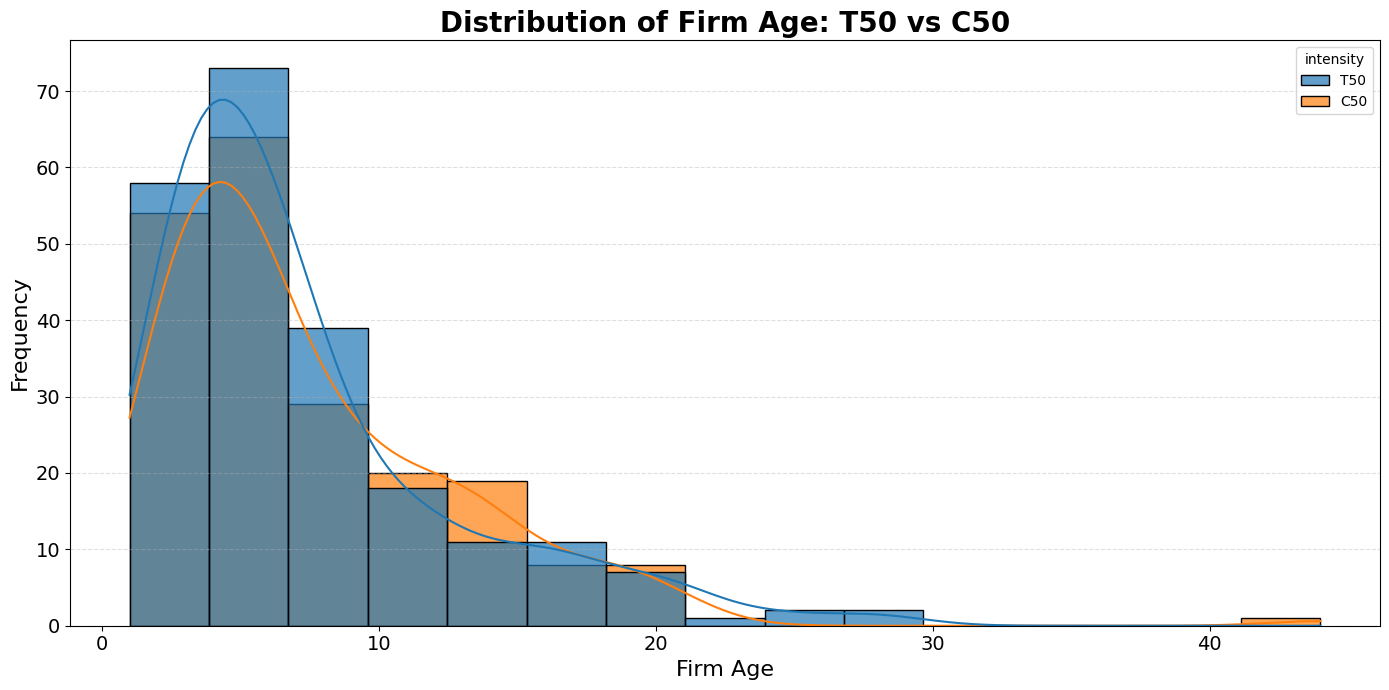

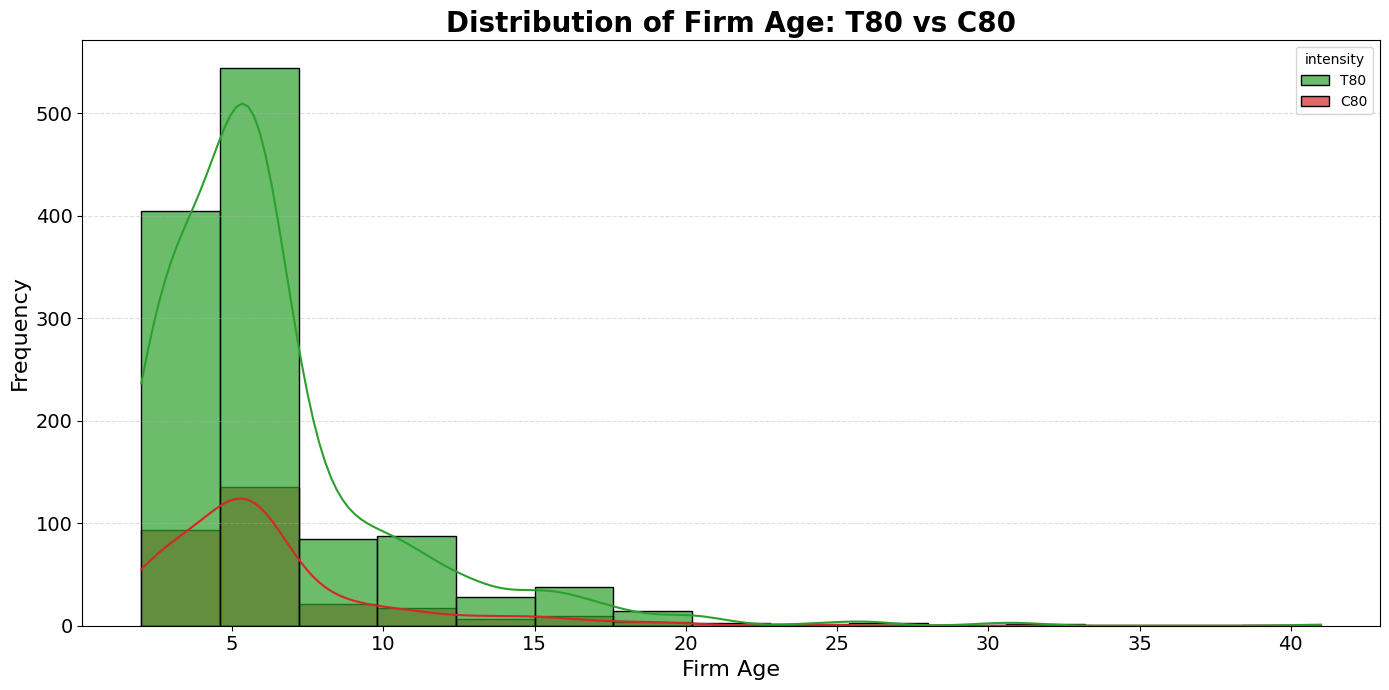

<ipython-input-19-4df133a4a215>:48: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=loanmain_df3[loanmain_df3['intensity'] == 'Pure Control'], x='firmage', kde=True, bins=15, palette=palette3, alpha=0.7, linewidth=1)


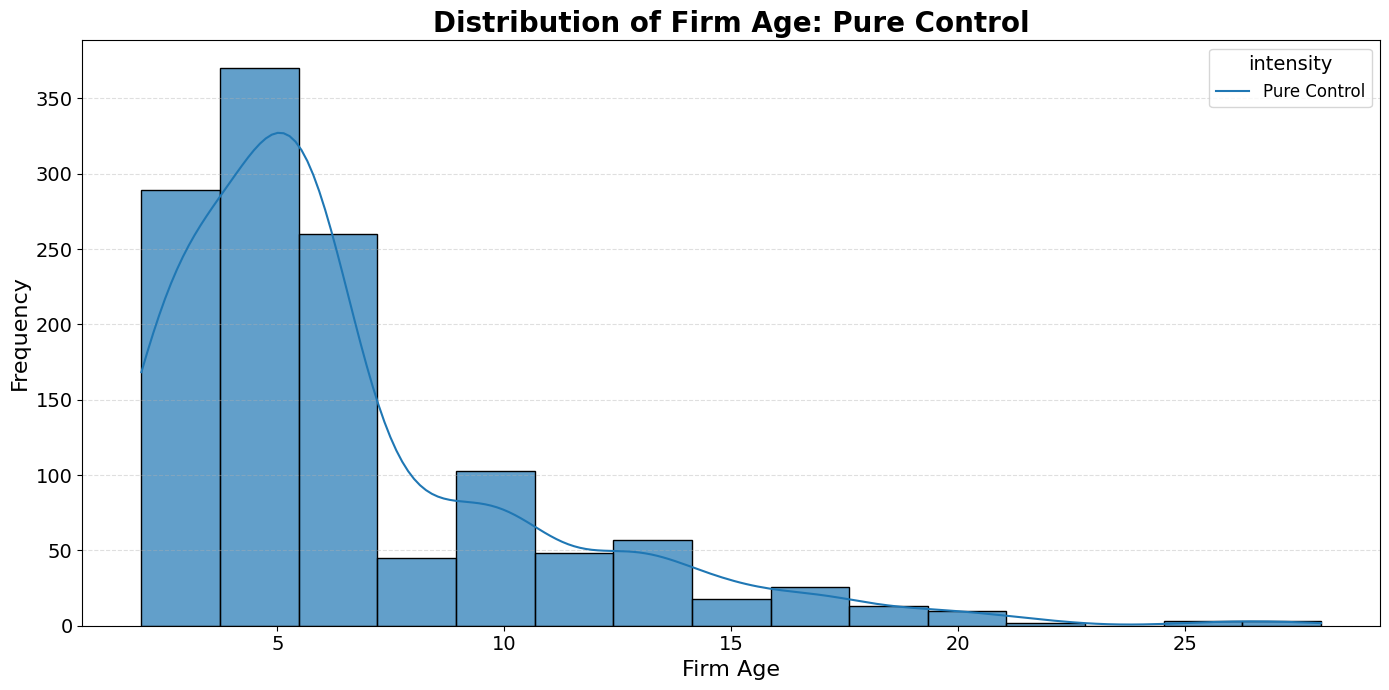

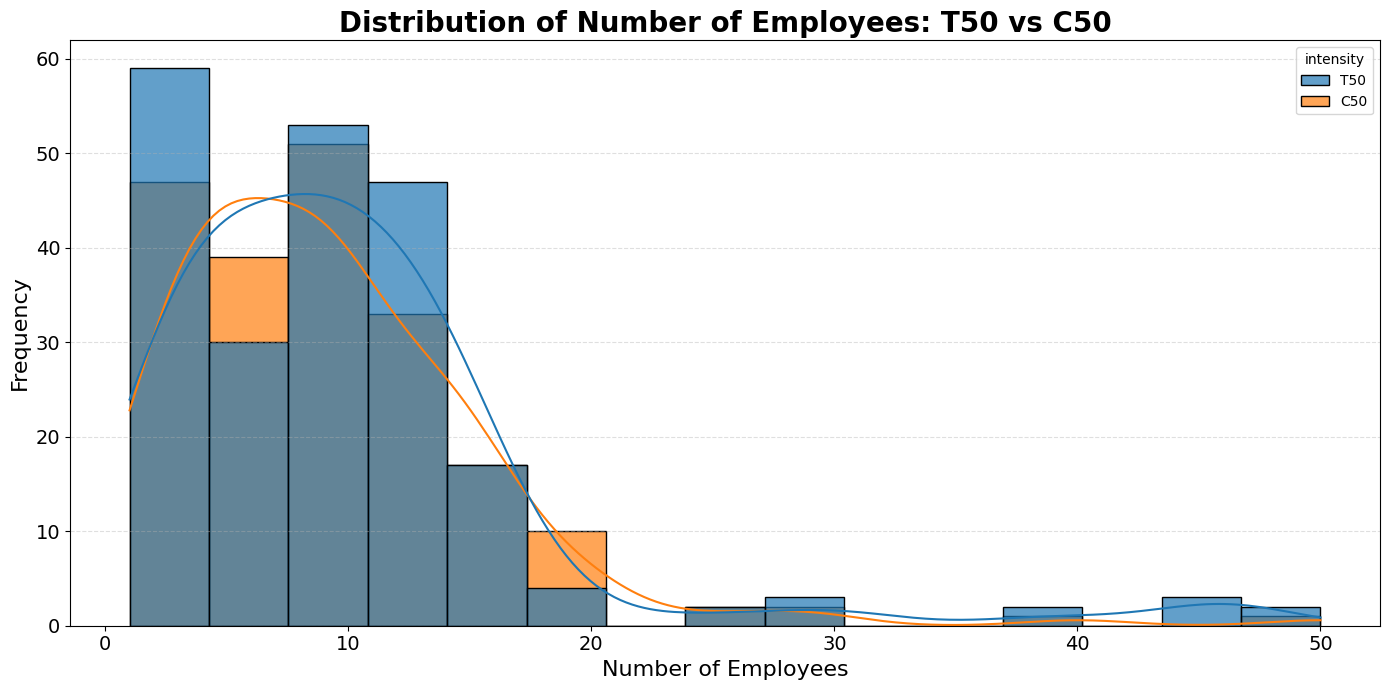

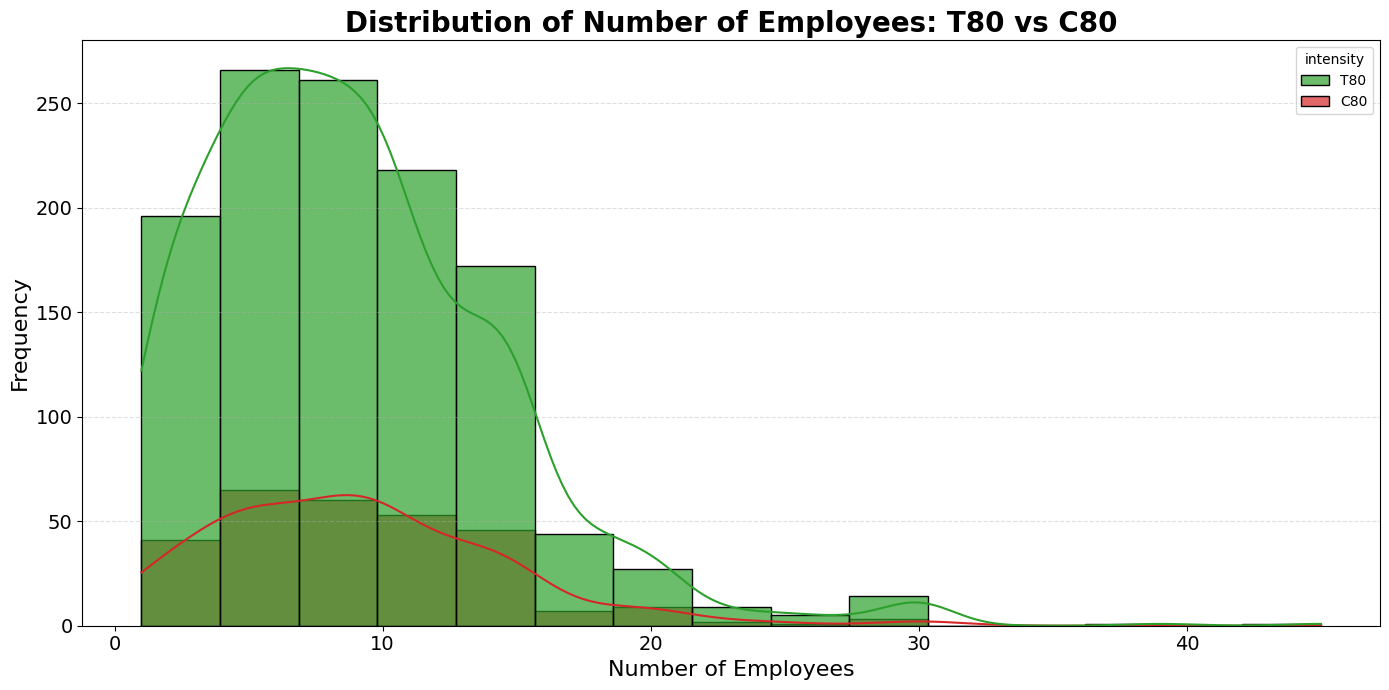

<ipython-input-19-4df133a4a215>:87: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=loanmain_df3[loanmain_df3['intensity'] == 'Pure Control'], x='labor', kde=True, bins=15, palette=palette3, alpha=0.7, linewidth=1)


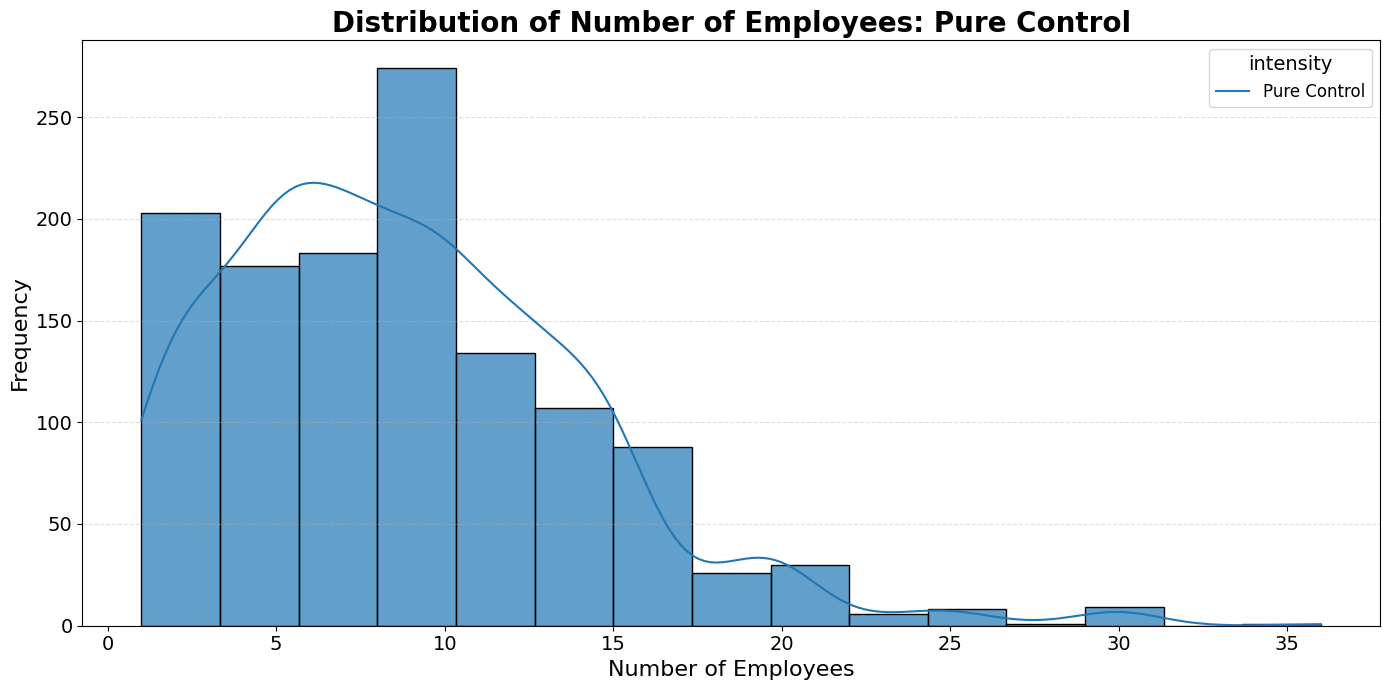

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Custom color palette for distinct colors
palette = {
    'T50': '#1f77b4',  # Blue
    'C50': '#ff7f0e',  # Orange
}

palette2 = {
    'T80': '#2ca02c',  # Green
    'C80': '#d62728',  # Red
    'Pure Control': '#9467bd'  # Purple
}

palette3 = {
    'Pure Control': '#9467bd'  # Purple
}


# Plotting separate histograms for T50 vs C50
plt.figure(figsize=(14, 7))
sns.histplot(data=loanmain_df3[loanmain_df3['intensity'].isin(['T50', 'C50'])], x='firmage', hue='intensity', kde=True, bins=15, alpha=0.7, linewidth=1)
plt.title('Distribution of Firm Age: T50 vs C50', fontsize=20, fontweight='bold')
plt.xlabel('Firm Age', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# Plotting separate histograms for T80 vs C80
plt.figure(figsize=(14, 7))
sns.histplot(data=loanmain_df3[loanmain_df3['intensity'].isin(['T80', 'C80'])], x='firmage', hue='intensity', kde=True, bins=15, palette=palette2, alpha=0.7, linewidth=1)
plt.title('Distribution of Firm Age: T80 vs C80', fontsize=20, fontweight='bold')
plt.xlabel('Firm Age', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# Plotting separate histogram for Pure Control
plt.figure(figsize=(14, 7))
sns.histplot(data=loanmain_df3[loanmain_df3['intensity'] == 'Pure Control'], x='firmage', kde=True, bins=15, palette=palette3, alpha=0.7, linewidth=1)
plt.title('Distribution of Firm Age: Pure Control', fontsize=20, fontweight='bold')
plt.xlabel('Firm Age', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.legend(['Pure Control'], title='intensity', fontsize=12, title_fontsize=14, loc='upper right')
plt.tight_layout()
plt.show()

# Repeat the process for Number of Employees

# Plotting separate histograms for T50 vs C50
plt.figure(figsize=(14, 7))
sns.histplot(data=loanmain_df3[loanmain_df3['intensity'].isin(['T50', 'C50'])], x='labor', hue='intensity', kde=True, bins=15, palette=palette, alpha=0.7, linewidth=1)
plt.title('Distribution of Number of Employees: T50 vs C50', fontsize=20, fontweight='bold')
plt.xlabel('Number of Employees', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# Plotting separate histograms for T80 vs C80
plt.figure(figsize=(14, 7))
sns.histplot(data=loanmain_df3[loanmain_df3['intensity'].isin(['T80', 'C80'])], x='labor', hue='intensity', kde=True, bins=15, palette=palette2, alpha=0.7, linewidth=1)
plt.title('Distribution of Number of Employees: T80 vs C80', fontsize=20, fontweight='bold')
plt.xlabel('Number of Employees', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# Plotting separate histogram for Pure Control
plt.figure(figsize=(14, 7))
sns.histplot(data=loanmain_df3[loanmain_df3['intensity'] == 'Pure Control'], x='labor', kde=True, bins=15, palette=palette3, alpha=0.7, linewidth=1)
plt.title('Distribution of Number of Employees: Pure Control', fontsize=20, fontweight='bold')
plt.xlabel('Number of Employees', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.legend(['Pure Control'], title='intensity', fontsize=12, title_fontsize=14, loc='upper right')
plt.tight_layout()
plt.show()


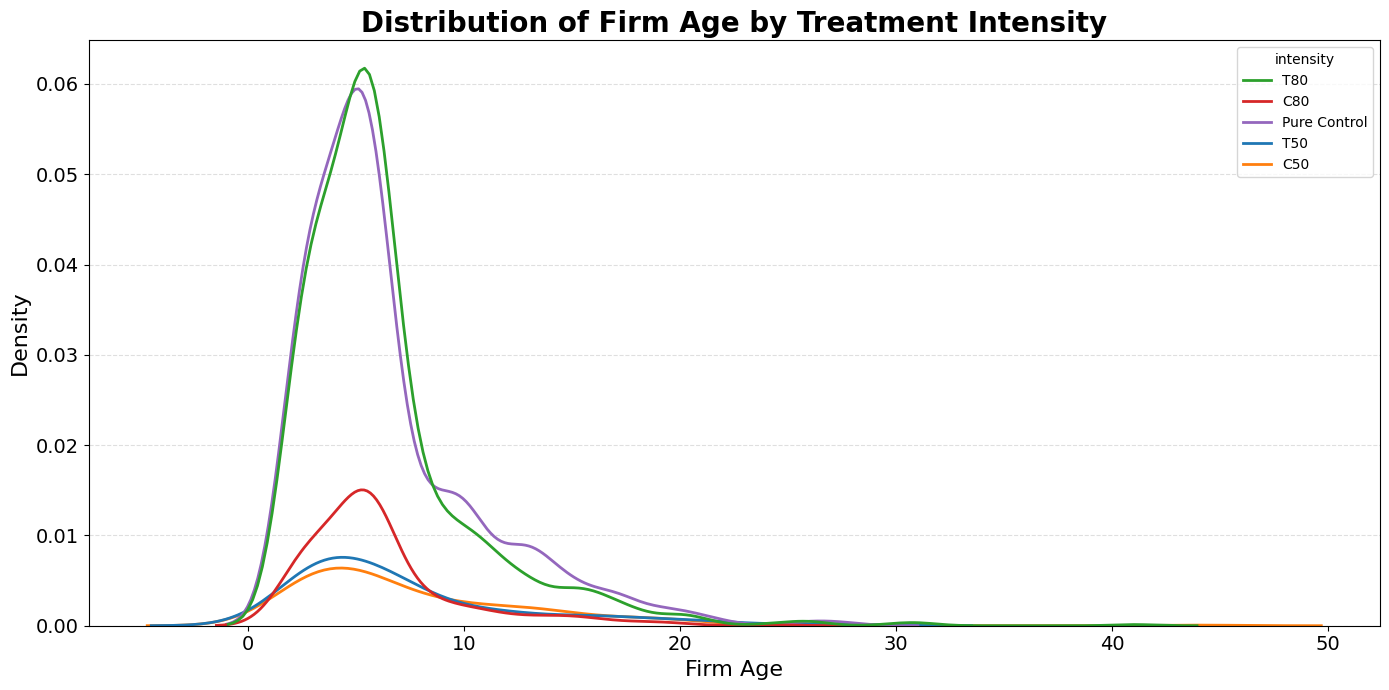

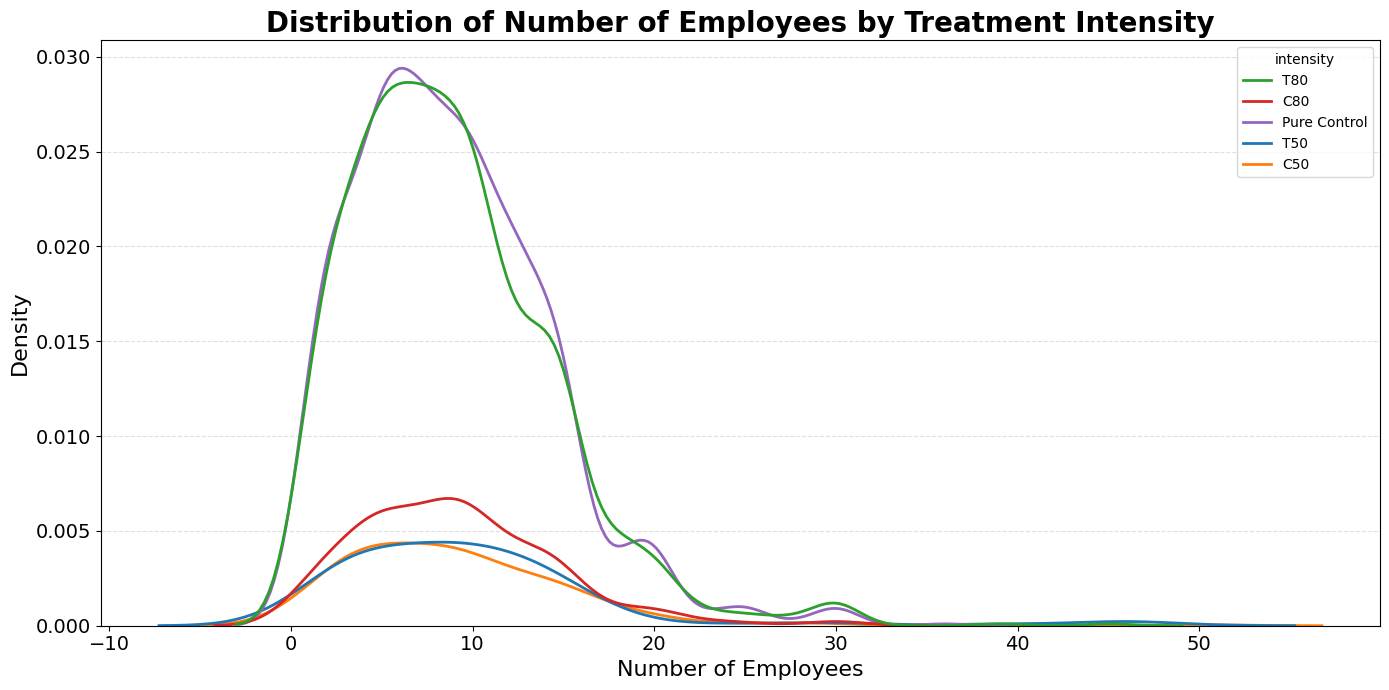

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Custom color palette for distinct colors
palette = {
    'T50': '#1f77b4',  # Blue
    'C50': '#ff7f0e',  # Orange
    'T80': '#2ca02c',  # Green
    'C80': '#d62728',  # Red
    'Pure Control': '#9467bd'  # Purple
}

# Overall plot for Firm Age with all treatment intensities
plt.figure(figsize=(14, 7))
sns.kdeplot(data=loanmain_df3, x='firmage', hue='intensity', palette=palette, linewidth=2)
plt.title('Distribution of Firm Age by Treatment Intensity', fontsize=20, fontweight='bold')
plt.xlabel('Firm Age', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# Overall plot for Number of Employees with all treatment intensities
plt.figure(figsize=(14, 7))
sns.kdeplot(data=loanmain_df3, x='labor', hue='intensity', palette=palette, linewidth=2)
plt.title('Distribution of Number of Employees by Treatment Intensity', fontsize=20, fontweight='bold')
plt.xlabel('Number of Employees', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


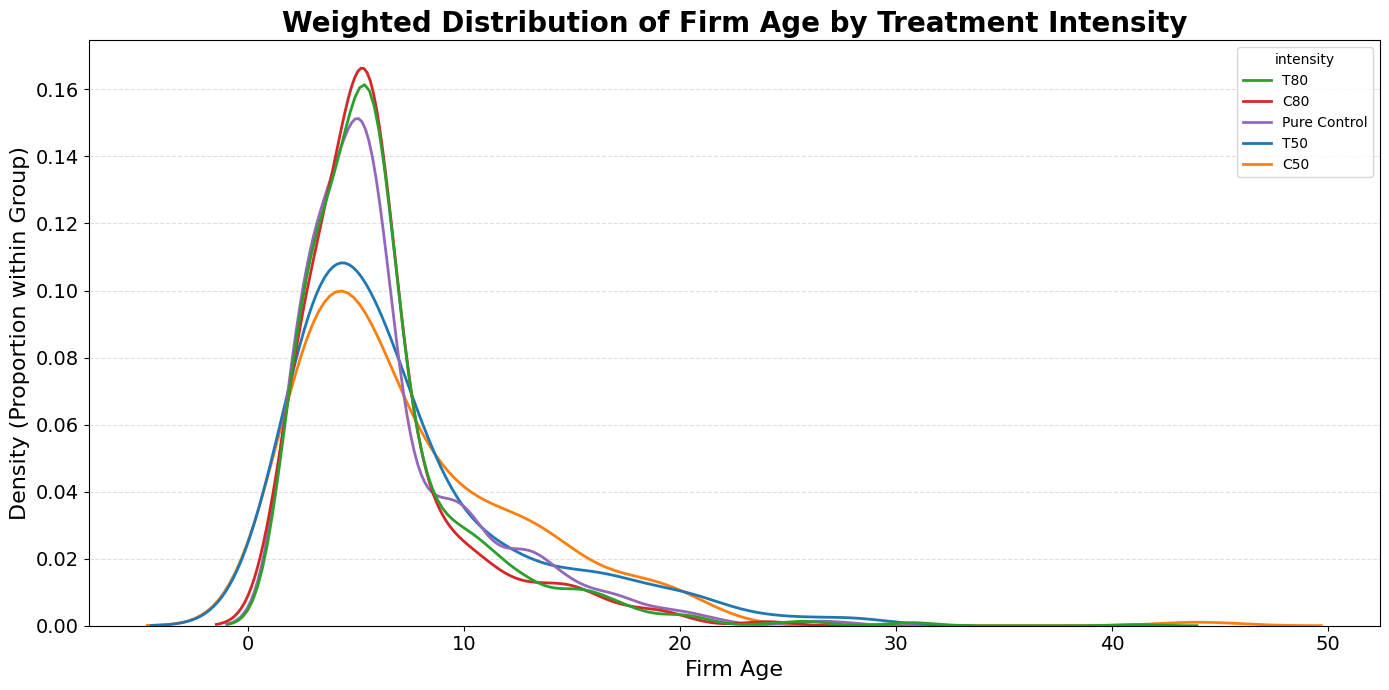

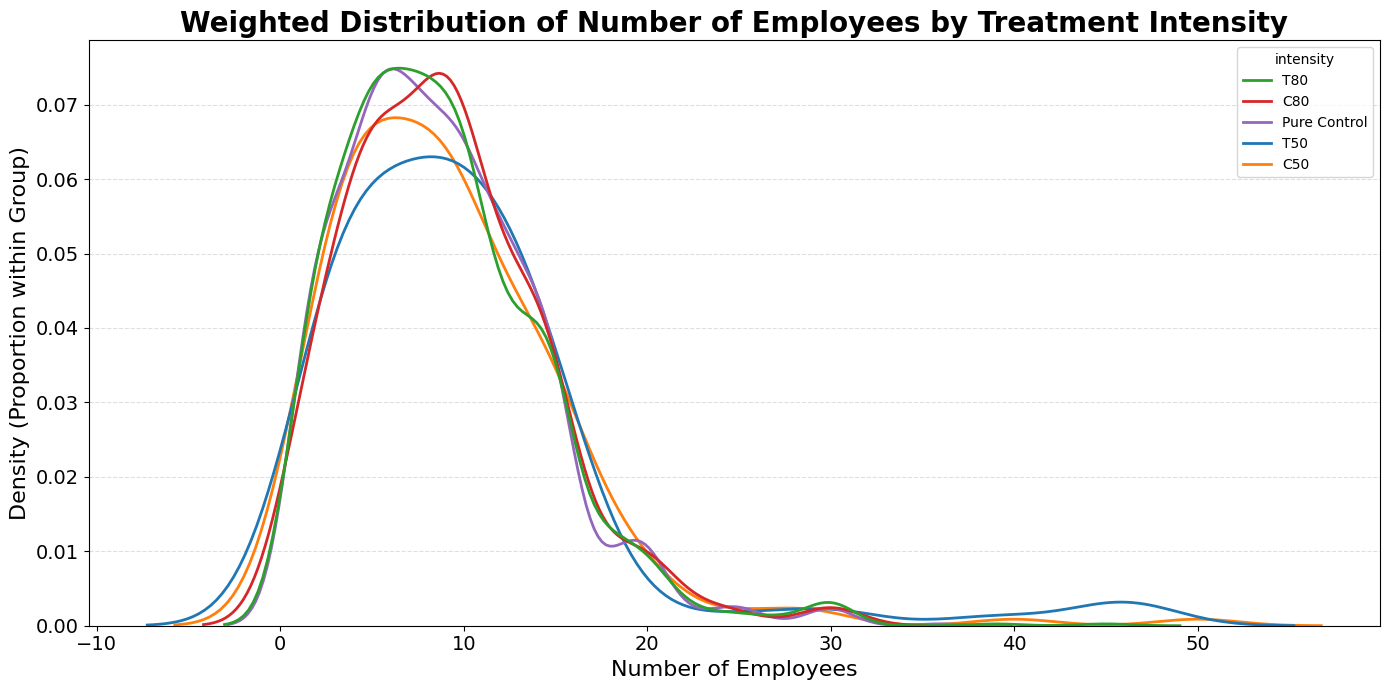

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Custom color palette for distinct colors
palette = {
    'T50': '#1f77b4',  # Blue
    'C50': '#ff7f0e',  # Orange
    'T80': '#2ca02c',  # Green
    'C80': '#d62728',  # Red
    'Pure Control': '#9467bd'  # Purple
}

# Overall plot for Firm Age with all treatment intensities showing weighted densities
plt.figure(figsize=(14, 7))
sns.kdeplot(data=loanmain_df3, x='firmage', hue='intensity', palette=palette, linewidth=2, common_norm=False)
plt.title('Weighted Distribution of Firm Age by Treatment Intensity', fontsize=20, fontweight='bold')
plt.xlabel('Firm Age', fontsize=16)
plt.ylabel('Density (Proportion within Group)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# Overall plot for Number of Employees with all treatment intensities showing weighted densities
plt.figure(figsize=(14, 7))
sns.kdeplot(data=loanmain_df3, x='labor', hue='intensity', palette=palette, linewidth=2, common_norm=False)
plt.title('Weighted Distribution of Number of Employees by Treatment Intensity', fontsize=20, fontweight='bold')
plt.xlabel('Number of Employees', fontsize=16)
plt.ylabel('Density (Proportion within Group)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


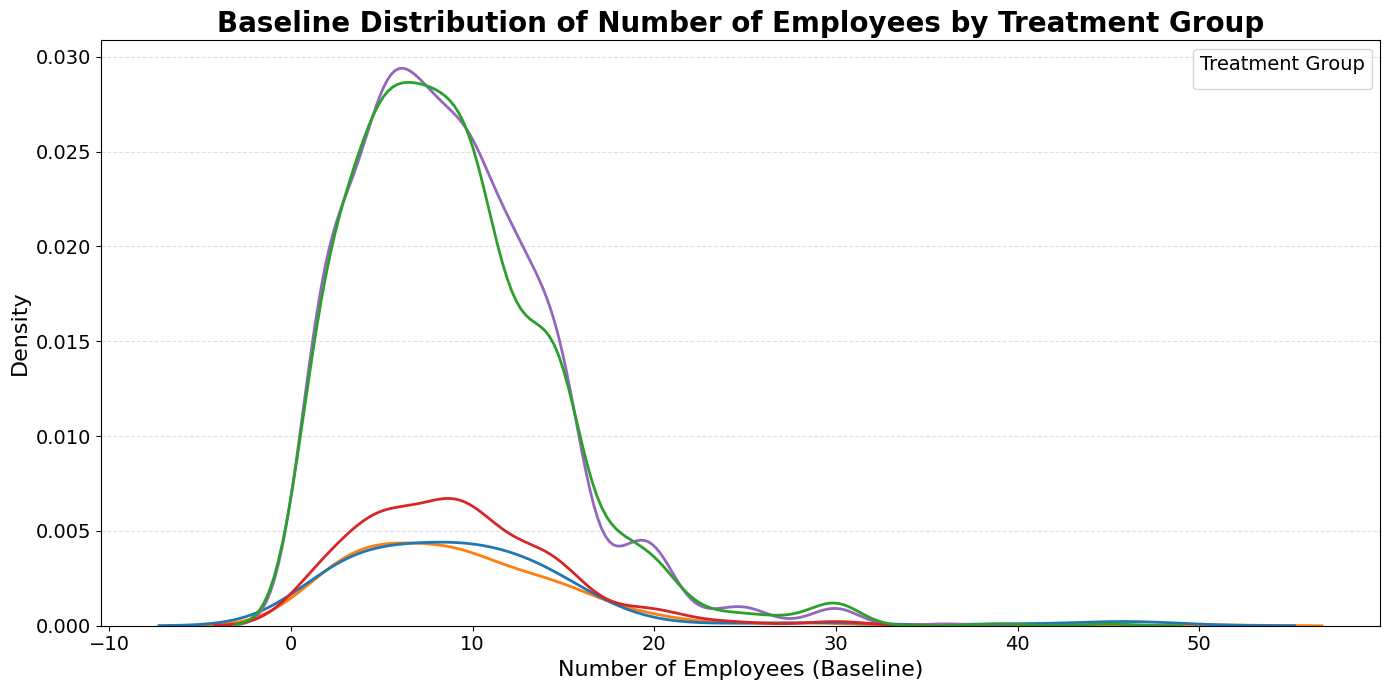

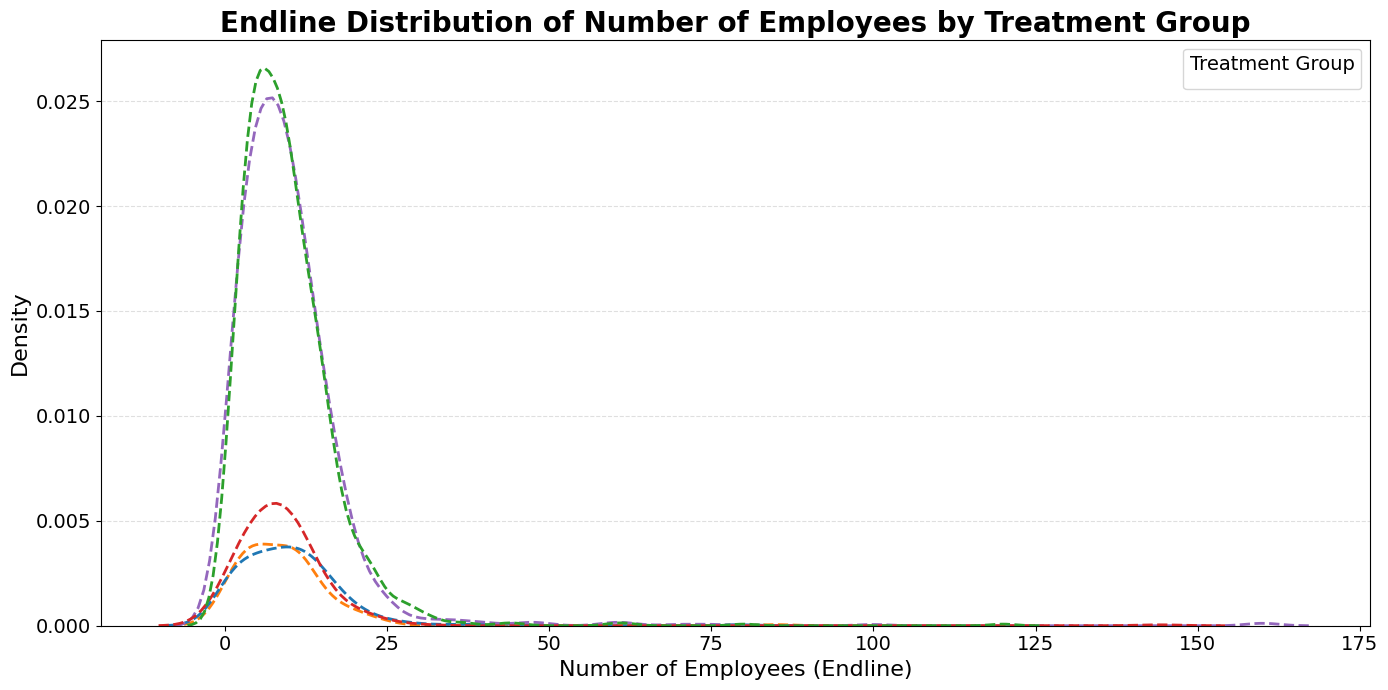

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Custom color palette for distinct lines
palette = {
    'T50': '#1f77b4',  # Blue
    'C50': '#ff7f0e',  # Orange
    'T80': '#2ca02c',  # Green
    'C80': '#d62728',  # Red
    'Pure Control': '#9467bd'  # Purple
}

# Plotting baseline density for the number of employees by treatment group
plt.figure(figsize=(14, 7))
sns.kdeplot(data=loanmain_df3, x='labor', hue='intensity', palette=palette, linewidth=2)
plt.title('Baseline Distribution of Number of Employees by Treatment Group', fontsize=20, fontweight='bold')
plt.xlabel('Number of Employees (Baseline)', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='Treatment Group', fontsize=12, title_fontsize=14, loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# Assuming you have an endline DataFrame named loanmain_df_endline
# Plotting endline density for the number of employees by treatment group
plt.figure(figsize=(14, 7))
sns.kdeplot(data=loanmain_df4, x='labor', hue='intensity', palette=palette, linewidth=2, linestyle='--')
plt.title('Endline Distribution of Number of Employees by Treatment Group', fontsize=20, fontweight='bold')
plt.xlabel('Number of Employees (Endline)', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='Treatment Group', fontsize=12, title_fontsize=14, loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


In [25]:
growth_df = loanmain_df4[['firmid', 'intensity', 'labor']].copy()
growth_df.rename(columns={'labor': 'labor_endline'}, inplace=True)
growth_df['labor_baseline'] = loanmain_df3.set_index('firmid').loc[growth_df['firmid'], 'labor'].values
growth_df['labor_growth'] = (growth_df['labor_endline'] - growth_df['labor_baseline']) / growth_df['labor_baseline']

growth_df.head()

firmid intensity  labor_endline  labor_baseline  labor_growth
0   111.0       T80           13.0            12.0      0.083333
1   112.0       T80            9.0             9.0      0.000000
2   113.0       T80            5.0             6.0     -0.166667
3   114.0       T80           11.0            12.0     -0.083333
4   115.0       C80            3.0             7.0     -0.571429

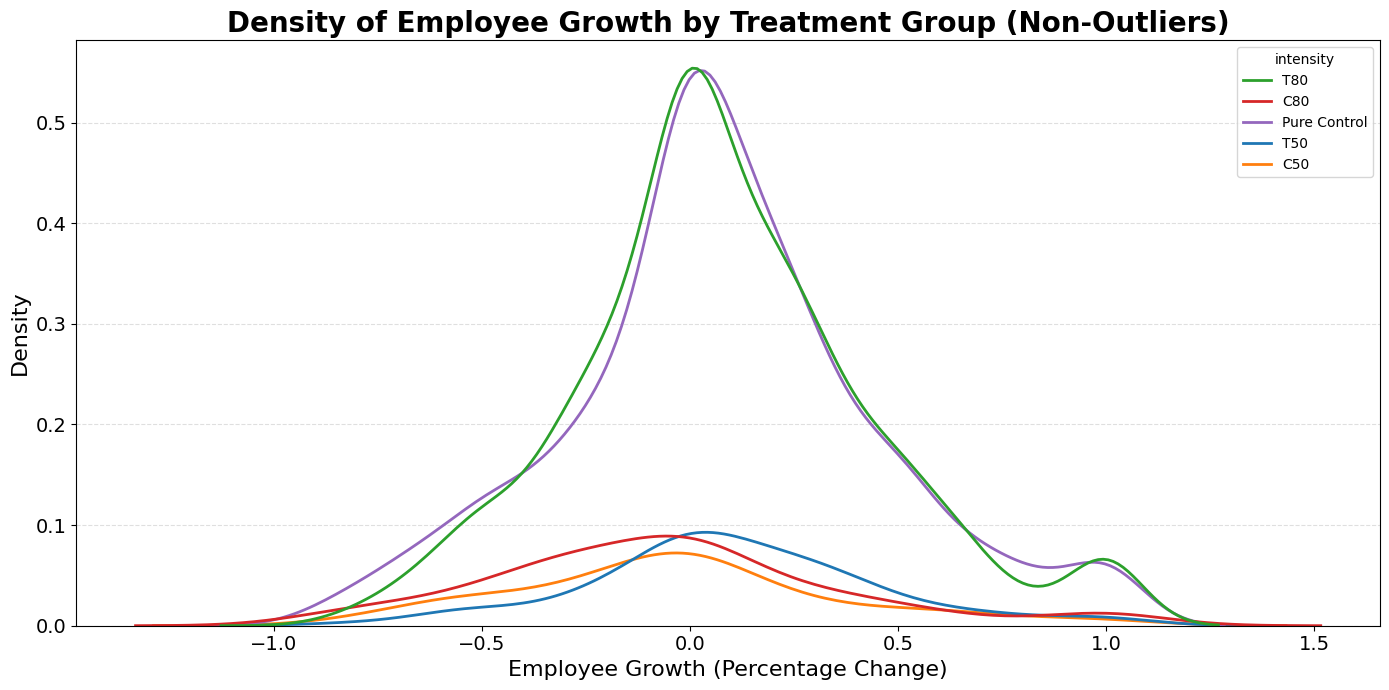

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate the IQR for labor growth
q1 = growth_df['labor_growth'].quantile(0.25)
q3 = growth_df['labor_growth'].quantile(0.75)
iqr = q3 - q1

# Define the bounds for non-outliers (1.5 * IQR rule)
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filter out outliers
filtered_growth_df = growth_df[(growth_df['labor_growth'] >= lower_bound) & (growth_df['labor_growth'] <= upper_bound)]

# Plotting the density of employee growth without outliers
plt.figure(figsize=(14, 7))
sns.kdeplot(data=filtered_growth_df, x='labor_growth', hue='intensity', palette=palette, linewidth=2)
plt.title('Density of Employee Growth by Treatment Group (Non-Outliers)', fontsize=20, fontweight='bold')
plt.xlabel('Employee Growth (Percentage Change)', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


In [26]:
loanmain_df2['intensity'] = loanmain_df2.apply(
    lambda row: 'Treated' if row['type'] == 1 else
                'Untreated, Control Market' if row['type'] == 0 and row['survey_town_type'] == 0 else
                'Untreated, Treated Market',
    axis=1
)

In [27]:
df_filtered = loanmain_df2[loanmain_df2['round'].isin([1, 3])]

# Pivot the data to get baseline and endline labor for each firm
df_pivot = df_filtered.pivot_table(index=['firmid', 'intensity'], columns='round', values='labor')

# Rename the columns for clarity
df_pivot.columns = ['labor_baseline', 'labor_endline']
df_pivot = df_pivot.reset_index()


df_pivot['labor_growth'] = (df_pivot['labor_endline'] - df_pivot['labor_baseline'])

df_pivot['intensity'].value_counts()

intensity
Treated                      1436
Untreated, Control Market    1247
Untreated, Treated Market     490
Name: count, dtype: int64

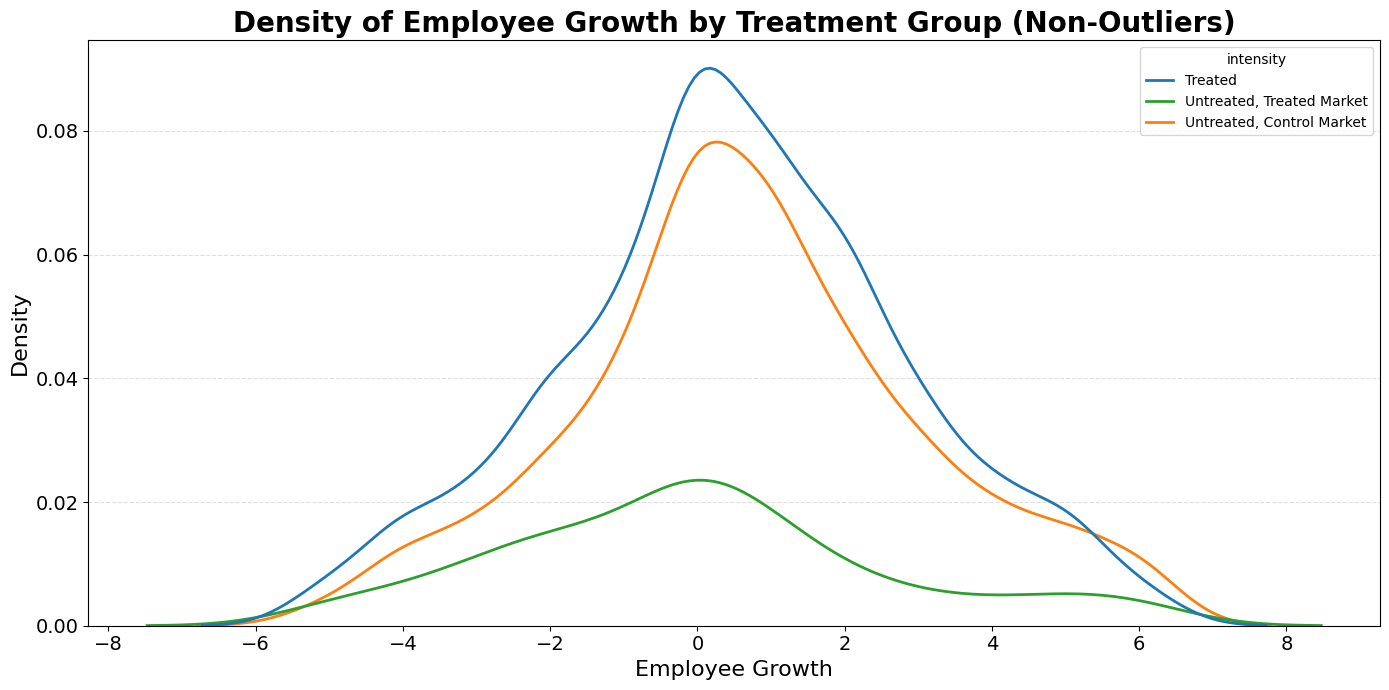

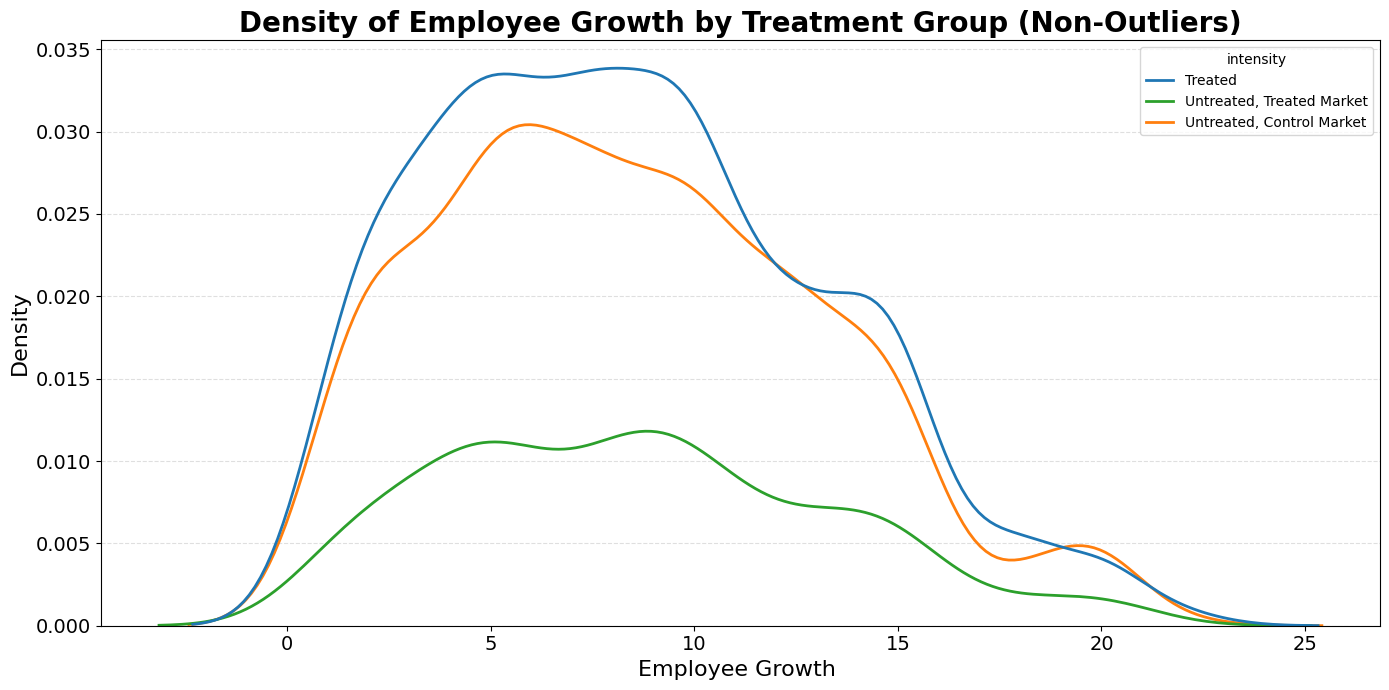

In [62]:
palette = {
    'Treated': '#1f77b4',  # Blue
    'Untreated, Control Market': '#ff7f0e',  # Orange
    'Untreated, Treated Market': '#2ca02c',  # Green
    'Unknown': '#d62728'  # Red (in case of unknowns)
}

# Calculate the IQR for labor growth
q1 = df_pivot['labor_growth'].quantile(0.25)
q3 = df_pivot['labor_growth'].quantile(0.75)
iqr = q3 - q1

# Define the bounds for non-outliers (1.5 * IQR rule)
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filter out outliers
filtered_growth_df = df_pivot[(df_pivot['labor_growth'] >= lower_bound) & (df_pivot['labor_growth'] <= upper_bound)]

# Plotting the density of employee growth without outliers
plt.figure(figsize=(14, 7))
sns.kdeplot(data=filtered_growth_df, x='labor_growth', hue='intensity', palette=palette, linewidth=2)
plt.title('Density of Employee Growth by Treatment Group (Non-Outliers)', fontsize=20, fontweight='bold')
plt.xlabel('Employee Growth', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


q1 = df_pivot['labor_baseline'].quantile(0.25)
q3 = df_pivot['labor_baseline'].quantile(0.75)
iqr = q3 - q1

# Define the bounds for non-outliers (1.5 * IQR rule)
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

filtered_growth_df = df_pivot[(df_pivot['labor_baseline'] >= lower_bound) & (df_pivot['labor_baseline'] <= upper_bound)]
plt.figure(figsize=(14, 7))
sns.kdeplot(data=filtered_growth_df, x='labor_baseline', hue='intensity', palette=palette, linewidth=2)
plt.title('Density of Employee Growth by Treatment Group (Non-Outliers)', fontsize=20, fontweight='bold')
plt.xlabel('Employee Growth ', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()



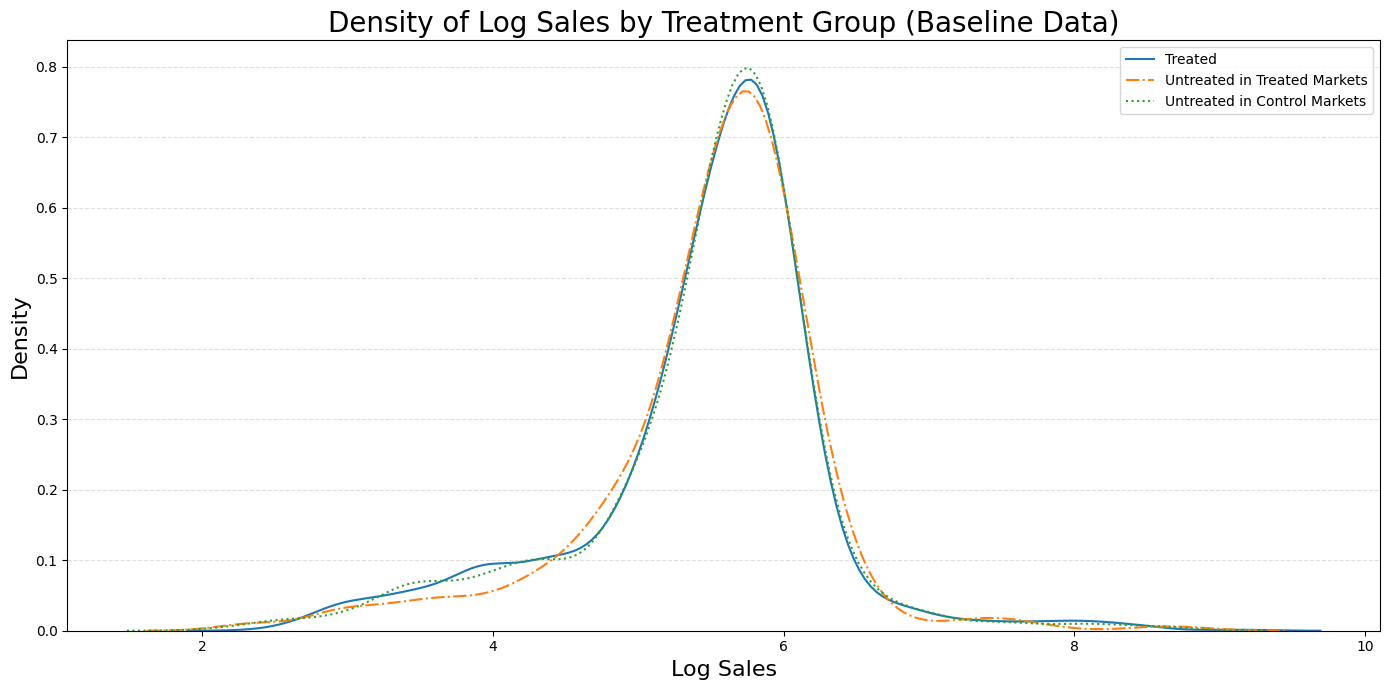

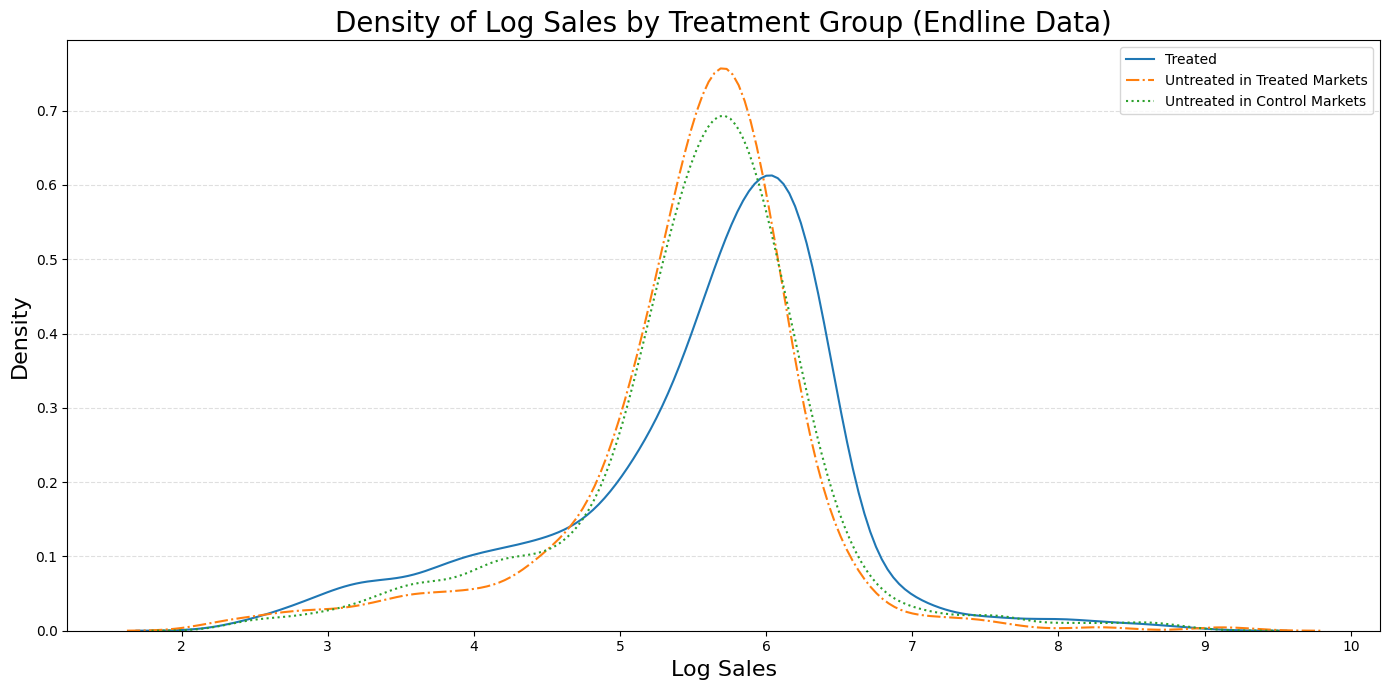

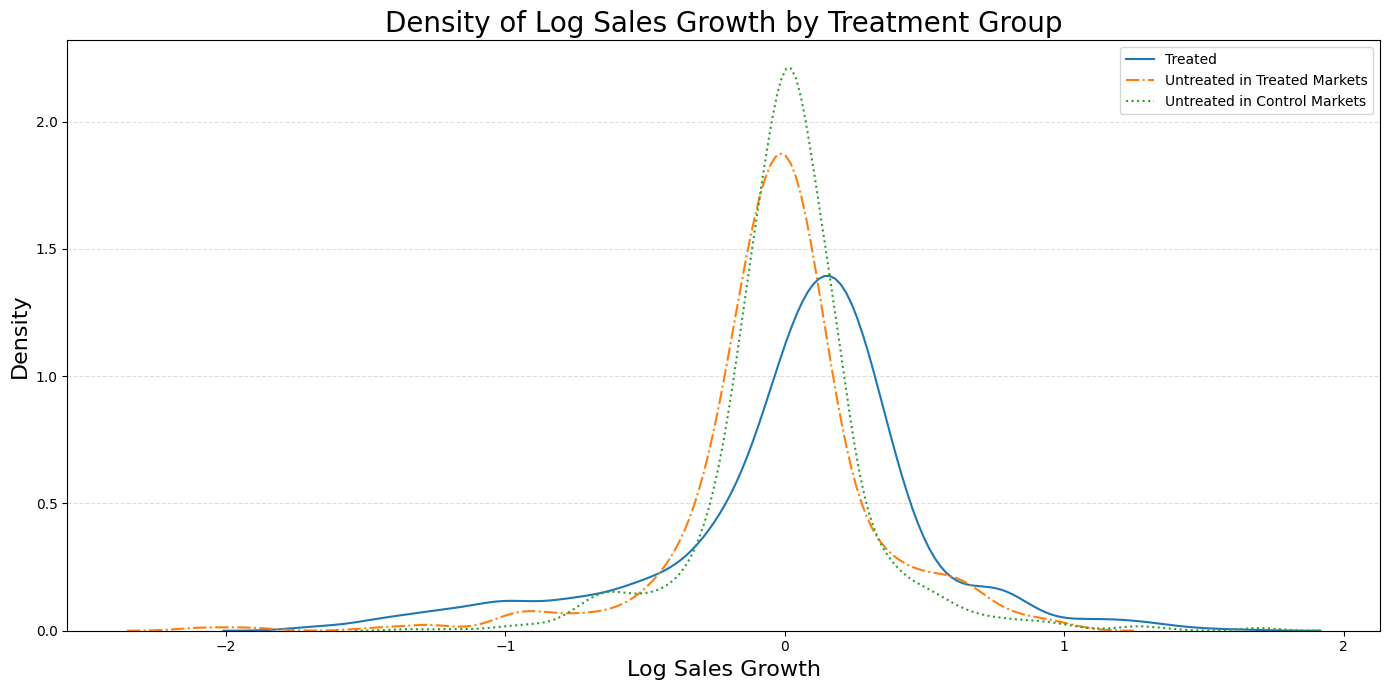

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df = loanmain_df2.reset_index().copy()

# Calculate growth in log sales for rounds > 1
df['growthsales'] = df.groupby('firmid')['lnpart5revenue'].diff().where(df['round'] > 1)

# Calculate average growthsales per firm for rounds > 1
df['avggrowthsales'] = df.groupby('firmid')['growthsales'].transform('mean').where(df['round'] > 1)

# Define the line styles for different groups
line_styles = {
    'Treated': 'solid',
    'Untreated in Treated Markets': 'dashdot',
    'Untreated in Control Markets': 'dotted'
}

# Plot for log sales (lnpart5revenue) in round 1
plt.figure(figsize=(14, 7))
sns.kdeplot(data=df[(df['type'] == 1) & (df['round'] == 1)], x='lnpart5revenue', label='Treated', linestyle=line_styles['Treated'])
sns.kdeplot(data=df[(df['type'] == 0) & (df['survey_town_type'] != 0) & (df['round'] == 1)], x='lnpart5revenue', label='Untreated in Treated Markets', linestyle=line_styles['Untreated in Treated Markets'])
sns.kdeplot(data=df[(df['type'] == 0) & (df['survey_town_type'] == 0) & (df['round'] == 1)], x='lnpart5revenue', label='Untreated in Control Markets', linestyle=line_styles['Untreated in Control Markets'])
plt.title('Density of Log Sales by Treatment Group (Baseline Data)', fontsize=20)
plt.xlabel('Log Sales', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()

plt.savefig('log_sales_density.png', format = 'png')
plt.show()

# Plot for average log sales growth (avggrowthsales)
plt.figure(figsize=(14, 7))
sns.kdeplot(data=df[(df['type'] == 1) & (df['round'] > 1)], x='lnpart5revenue', label='Treated', linestyle=line_styles['Treated'])
sns.kdeplot(data=df[(df['type'] == 0) & (df['survey_town_type'] != 0) & (df['round'] > 1)], x='lnpart5revenue', label='Untreated in Treated Markets', linestyle=line_styles['Untreated in Treated Markets'])
sns.kdeplot(data=df[(df['type'] == 0) & (df['survey_town_type'] == 0) & (df['round'] > 1)], x='lnpart5revenue', label='Untreated in Control Markets', linestyle=line_styles['Untreated in Control Markets'])
plt.title('Density of Log Sales by Treatment Group (Endline Data)', fontsize=20)
plt.xlabel('Log Sales', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.savefig('log_sales_density2.png', format = 'png')
plt.show()

# Plot for average log sales growth (avggrowthsales)
plt.figure(figsize=(14, 7))
sns.kdeplot(data=df[(df['type'] == 1) & (df['round'] > 1)], x='avggrowthsales', label='Treated', linestyle=line_styles['Treated'])
sns.kdeplot(data=df[(df['type'] == 0) & (df['survey_town_type'] != 0) & (df['round'] > 1)], x='avggrowthsales', label='Untreated in Treated Markets', linestyle=line_styles['Untreated in Treated Markets'])
sns.kdeplot(data=df[(df['type'] == 0) & (df['survey_town_type'] == 0) & (df['round'] > 1)], x='avggrowthsales', label='Untreated in Control Markets', linestyle=line_styles['Untreated in Control Markets'])
plt.title('Density of Log Sales Growth by Treatment Group', fontsize=20)
plt.xlabel('Log Sales Growth', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


<ipython-input-34-b25f7068a79d>:7: RuntimeWarning: invalid value encountered in log
  df['lnprofit'] = df['total_profit'].apply(lambda x: np.log(x + 1))
<ipython-input-34-b25f7068a79d>:7: RuntimeWarning: divide by zero encountered in log
  df['lnprofit'] = df['total_profit'].apply(lambda x: np.log(x + 1))


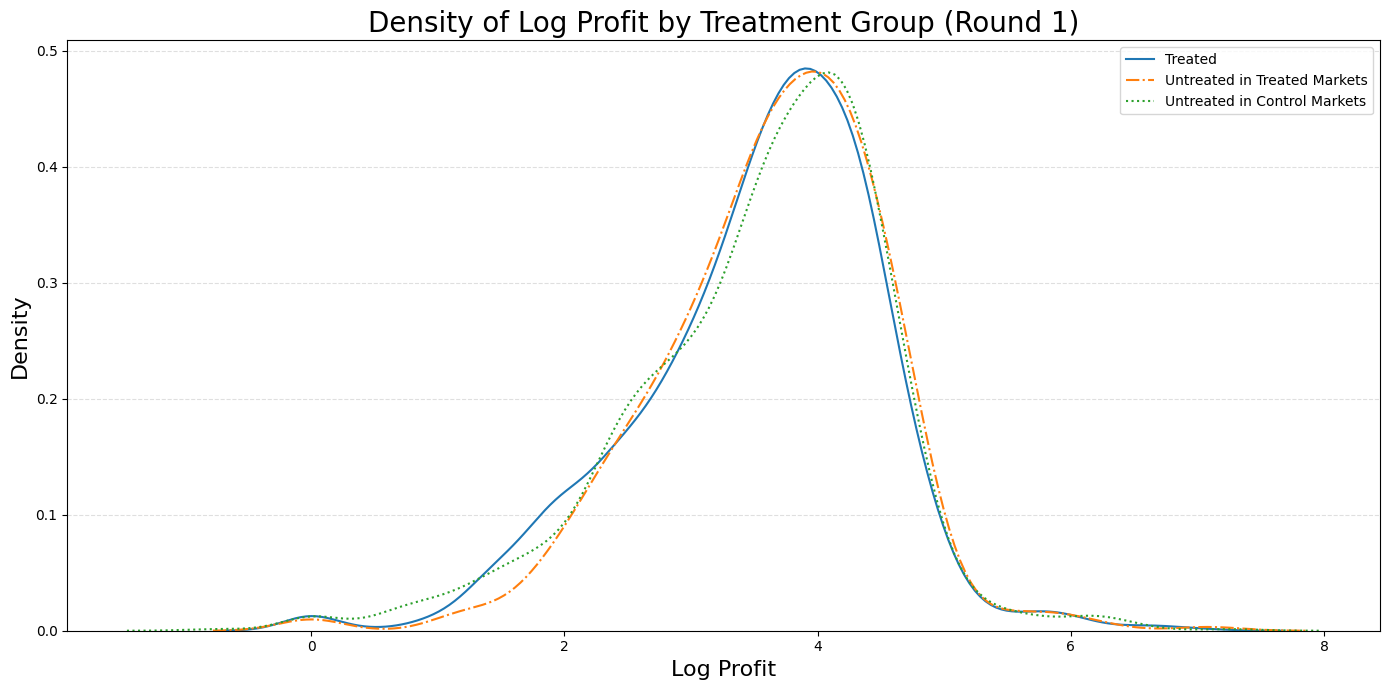

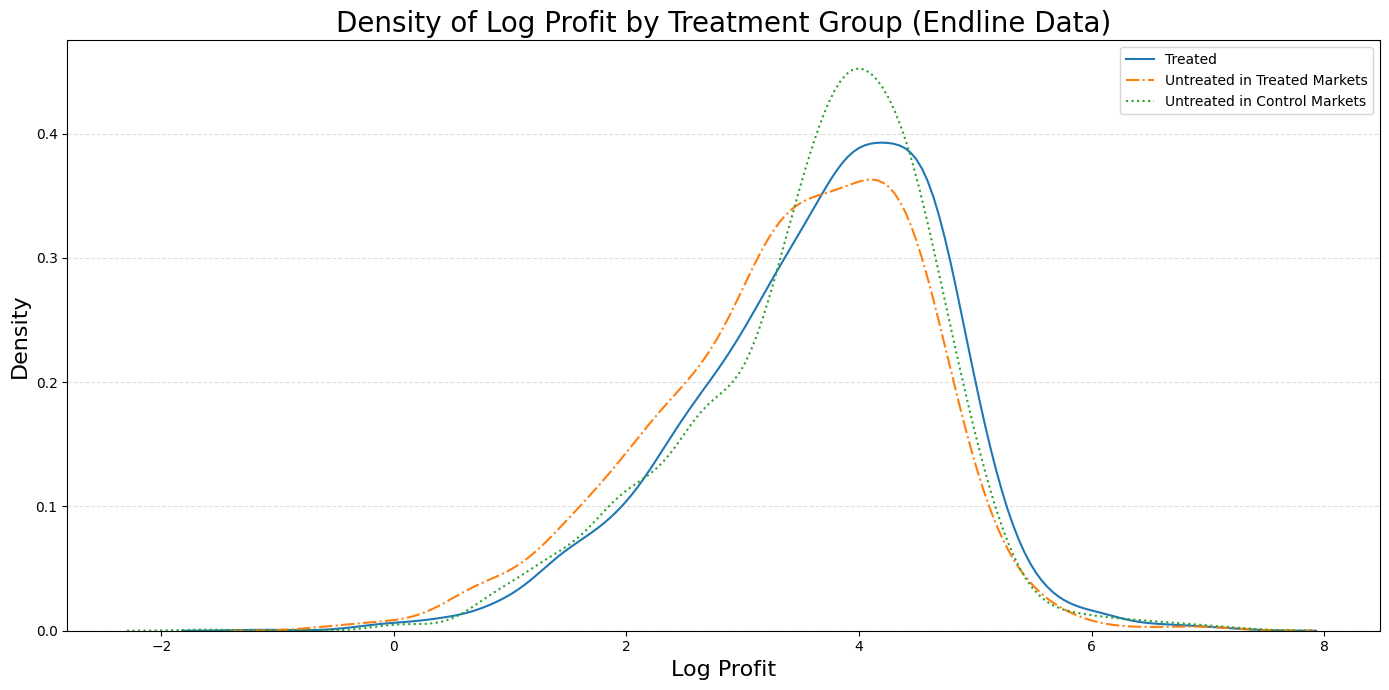

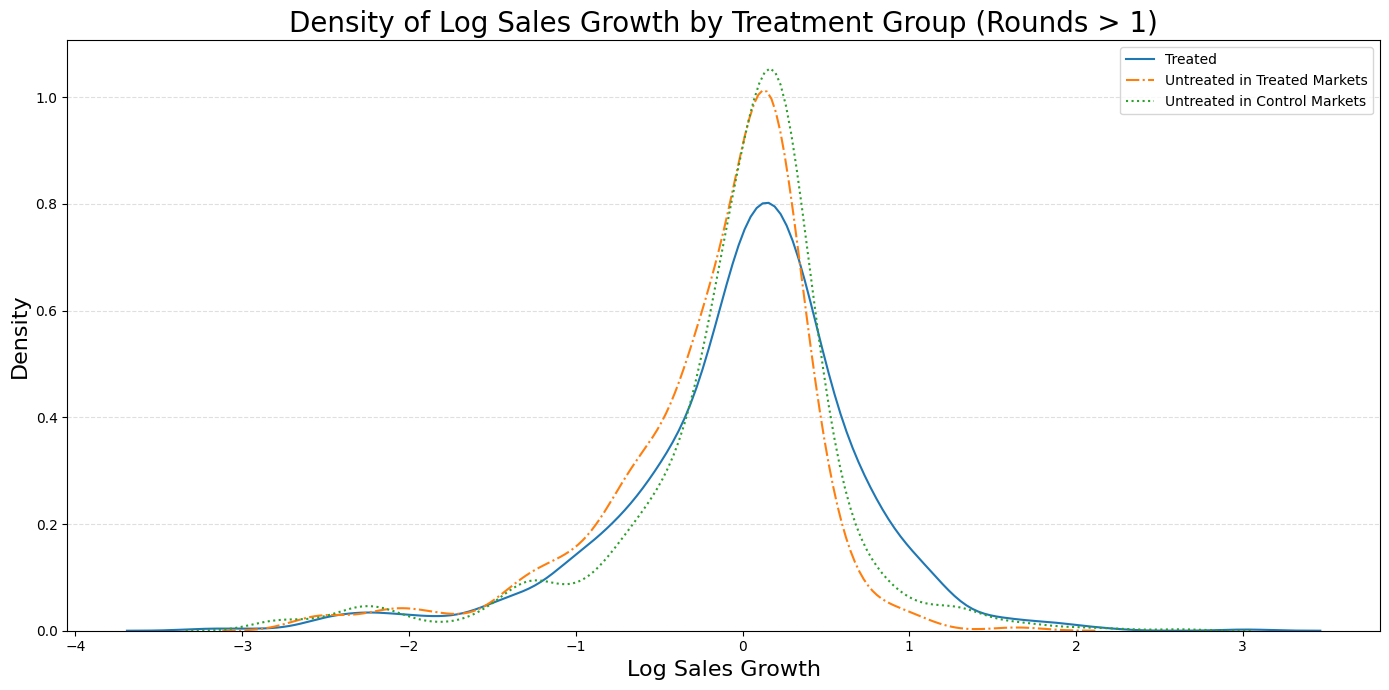

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df = loanmain_df2.reset_index().copy()
df['lnprofit'] = df['total_profit'].apply(lambda x: np.log(x + 1))

# Calculate growth in log sales for rounds > 1
df['growthsales'] = df.groupby('firmid')['lnprofit'].diff().where(df['round'] > 1)

# Calculate average growthsales per firm for rounds > 1
df['avggrowthsales'] = df.groupby('firmid')['growthsales'].transform('mean').where(df['round'] > 1)

# Define the line styles for different groups
line_styles = {
    'Treated': 'solid',
    'Untreated in Treated Markets': 'dashdot',
    'Untreated in Control Markets': 'dotted'
}

# Plot for log sales (lnpart5revenue) in round 1
plt.figure(figsize=(14, 7))
sns.kdeplot(data=df[(df['type'] == 1) & (df['round'] == 1)], x='lnprofit', label='Treated', linestyle=line_styles['Treated'])
sns.kdeplot(data=df[(df['type'] == 0) & (df['survey_town_type'] != 0) & (df['round'] == 1)], x='lnprofit', label='Untreated in Treated Markets', linestyle=line_styles['Untreated in Treated Markets'])
sns.kdeplot(data=df[(df['type'] == 0) & (df['survey_town_type'] == 0) & (df['round'] == 1)], x='lnprofit', label='Untreated in Control Markets', linestyle=line_styles['Untreated in Control Markets'])
plt.title('Density of Log Profit by Treatment Group (Round 1)', fontsize=20)
plt.xlabel('Log Profit', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.savefig('log_profit_density.png', format = 'png')
plt.show()


# Plot for average log sales growth (avggrowthsales)
plt.figure(figsize=(14, 7))
sns.kdeplot(data=df[(df['type'] == 1) & (df['round'] > 1)], x='lnprofit', label='Treated', linestyle=line_styles['Treated'])
sns.kdeplot(data=df[(df['type'] == 0) & (df['survey_town_type'] != 0) & (df['round'] > 1)], x='lnprofit', label='Untreated in Treated Markets', linestyle=line_styles['Untreated in Treated Markets'])
sns.kdeplot(data=df[(df['type'] == 0) & (df['survey_town_type'] == 0) & (df['round'] > 1)], x='lnprofit', label='Untreated in Control Markets', linestyle=line_styles['Untreated in Control Markets'])
plt.title('Density of Log Profit by Treatment Group (Endline Data)', fontsize=20)
plt.xlabel('Log Profit', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.savefig('log_profit_density2.png', format = 'png')
plt.show()

# Plot for average log sales growth (avggrowthsales)
plt.figure(figsize=(14, 7))
sns.kdeplot(data=df[(df['type'] == 1) & (df['round'] > 1)], x='avggrowthsales', label='Treated', linestyle=line_styles['Treated'])
sns.kdeplot(data=df[(df['type'] == 0) & (df['survey_town_type'] != 0) & (df['round'] > 1)], x='avggrowthsales', label='Untreated in Treated Markets', linestyle=line_styles['Untreated in Treated Markets'])
sns.kdeplot(data=df[(df['type'] == 0) & (df['survey_town_type'] == 0) & (df['round'] > 1)], x='avggrowthsales', label='Untreated in Control Markets', linestyle=line_styles['Untreated in Control Markets'])
plt.title('Density of Log Sales Growth by Treatment Group (Rounds > 1)', fontsize=20)
plt.xlabel('Log Sales Growth', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


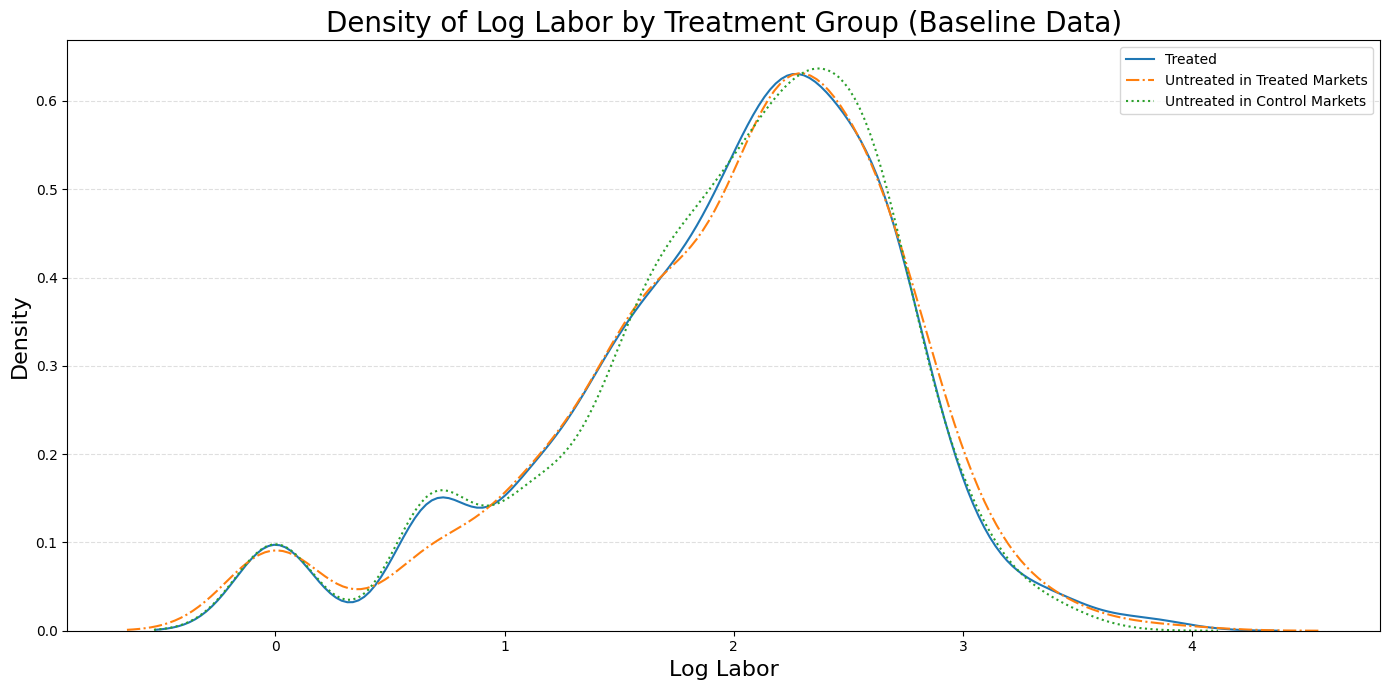

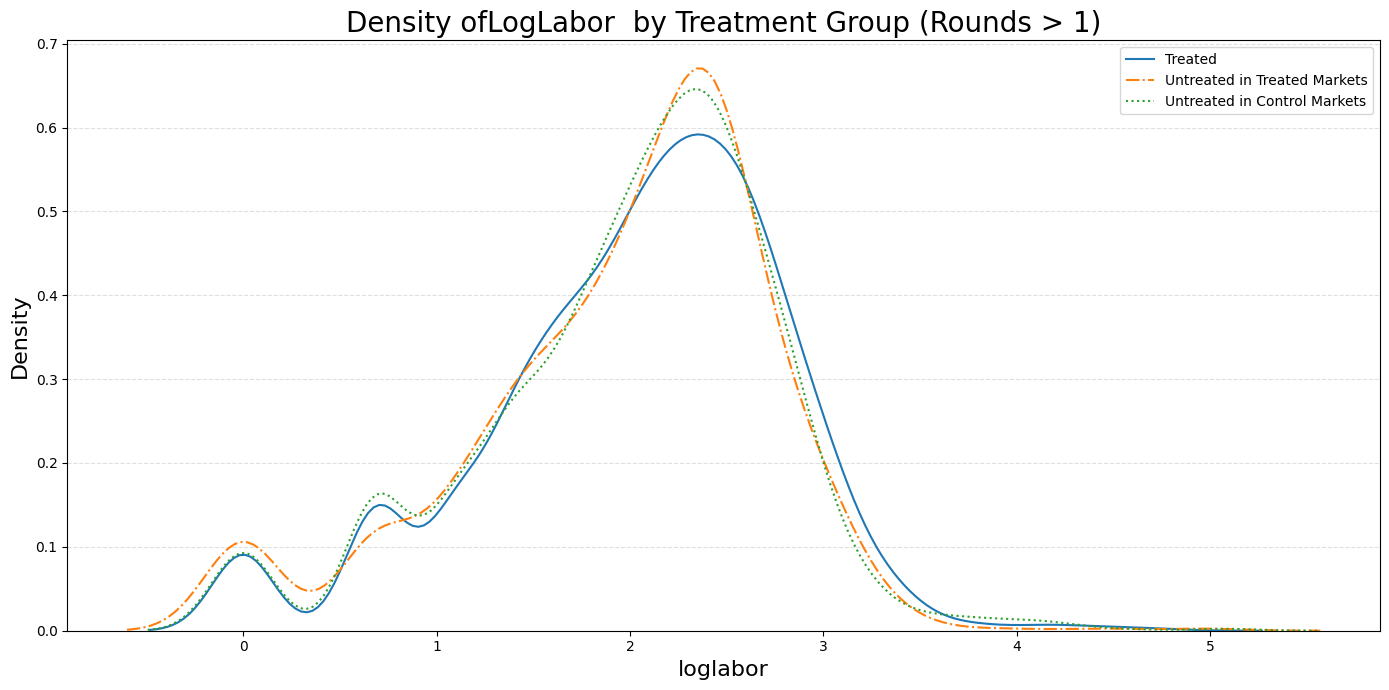

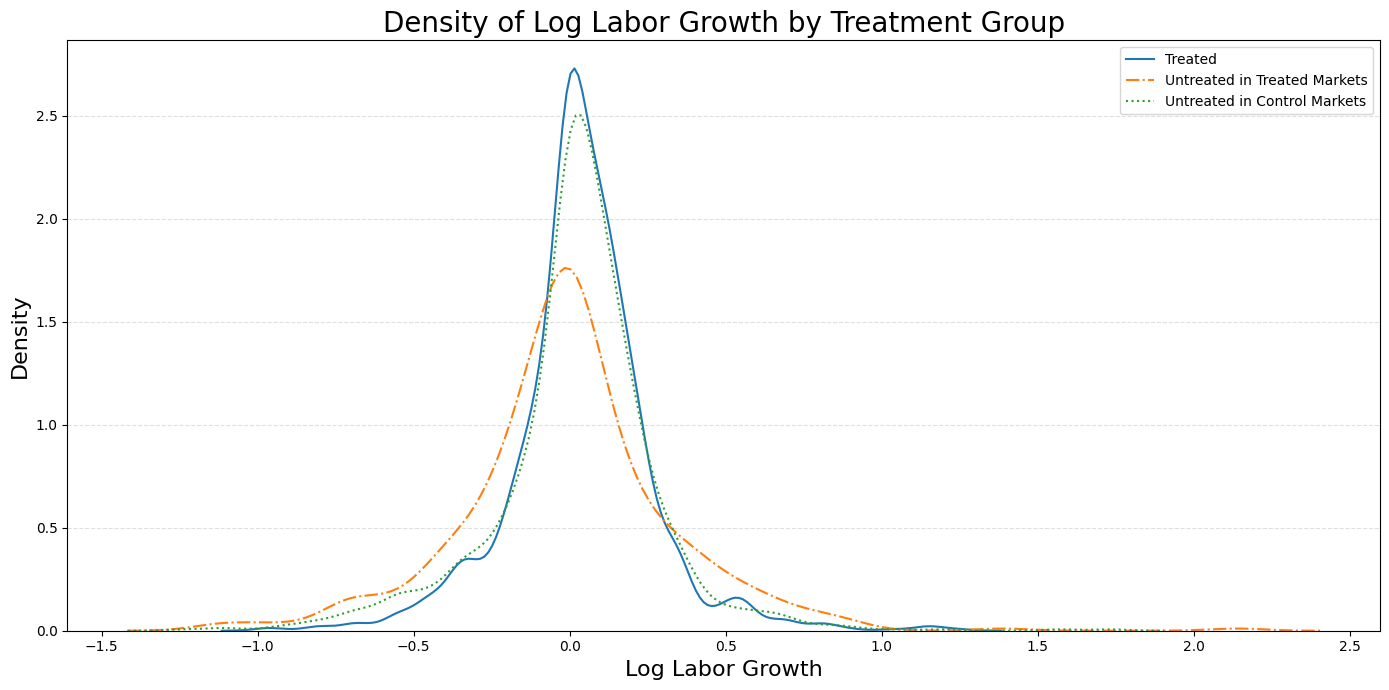

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df = loanmain_df2.reset_index().copy()

# Calculate growth in log sales for rounds > 1
df['growth'] = df.groupby('firmid')['lnlabor'].diff().where(df['round'] > 1)

# Calculate average growthsales per firm for rounds > 1
df['avggrowth'] = df.groupby('firmid')['growth'].transform('mean').where(df['round'] > 1)

# Define the line styles for different groups
line_styles = {
    'Treated': 'solid',
    'Untreated in Treated Markets': 'dashdot',
    'Untreated in Control Markets': 'dotted'
}

# Plot for log sales (lnpart5revenue) in round 1
plt.figure(figsize=(14, 7))
sns.kdeplot(data=df[(df['type'] == 1) & (df['round'] == 1)], x='lnlabor', label='Treated', linestyle=line_styles['Treated'])
sns.kdeplot(data=df[(df['type'] == 0) & (df['survey_town_type'] != 0) & (df['round'] == 1)], x='lnlabor', label='Untreated in Treated Markets', linestyle=line_styles['Untreated in Treated Markets'])
sns.kdeplot(data=df[(df['type'] == 0) & (df['survey_town_type'] == 0) & (df['round'] == 1)], x='lnlabor', label='Untreated in Control Markets', linestyle=line_styles['Untreated in Control Markets'])
plt.title('Density of Log Labor by Treatment Group (Baseline Data)', fontsize=20)
plt.xlabel('Log Labor', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.savefig('log_labor_density.png', format = 'png')
plt.show()


# Plot for average log sales growth (avggrowthsales)
plt.figure(figsize=(14, 7))
sns.kdeplot(data=df[(df['type'] == 1) & (df['round'] > 1)], x='lnlabor', label='Treated', linestyle=line_styles['Treated'])
sns.kdeplot(data=df[(df['type'] == 0) & (df['survey_town_type'] != 0) & (df['round'] > 1)], x='lnlabor', label='Untreated in Treated Markets', linestyle=line_styles['Untreated in Treated Markets'])
sns.kdeplot(data=df[(df['type'] == 0) & (df['survey_town_type'] == 0) & (df['round'] > 1)], x='lnlabor', label='Untreated in Control Markets', linestyle=line_styles['Untreated in Control Markets'])
plt.title('Density ofLogLabor  by Treatment Group (Rounds > 1)', fontsize=20)
plt.xlabel('loglabor', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# Plot for average log sales growth (avggrowthsales)
plt.figure(figsize=(14, 7))
sns.kdeplot(data=df[(df['type'] == 1) & (df['round'] > 1)], x='avggrowth', label='Treated', linestyle=line_styles['Treated'])
sns.kdeplot(data=df[(df['type'] == 0) & (df['survey_town_type'] != 0) & (df['round'] > 1)], x='avggrowth', label='Untreated in Treated Markets', linestyle=line_styles['Untreated in Treated Markets'])
sns.kdeplot(data=df[(df['type'] == 0) & (df['survey_town_type'] == 0) & (df['round'] > 1)], x='avggrowth', label='Untreated in Control Markets', linestyle=line_styles['Untreated in Control Markets'])
plt.title('Density of Log Labor Growth by Treatment Group', fontsize=20)
plt.xlabel('Log Labor Growth', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.savefig('log_labor_growth_density.png', format = 'png')
plt.show()


<ipython-input-108-5fb164910bf1>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='intensity', y='turnover_rate', palette='Set2')


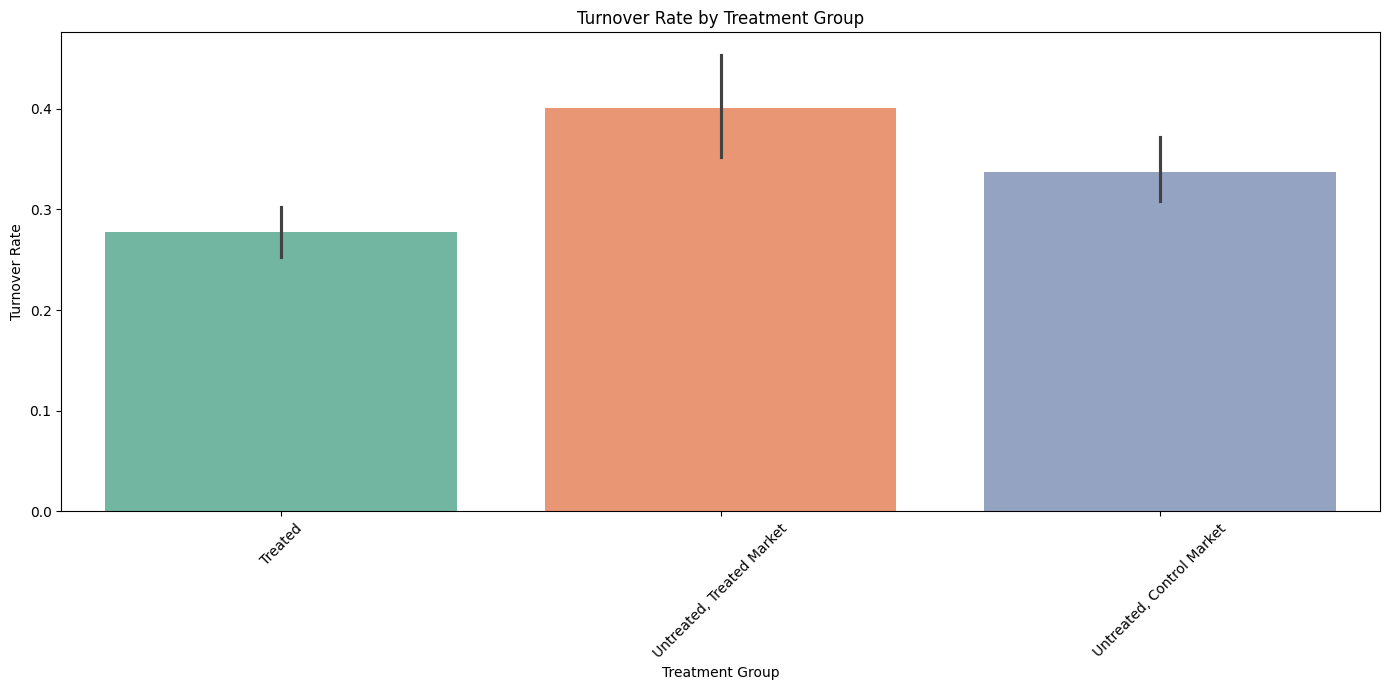

0    NaN
1    3.0
2   -2.0
3   -4.0
4   -2.0
Name: labor, dtype: float32

In [108]:
df = loanmain_df2.reset_index().copy()

df['turnover_rate'] = abs(df['labor'].diff()) / df['labor'].shift(1)

# Filter out NaN values and irrelevant rounds
df = df[df['round'] > 1]

# Plot turnover rate by treatment group
plt.figure(figsize=(14, 7))
sns.barplot(data=df, x='intensity', y='turnover_rate', palette='Set2')
plt.title('Turnover Rate by Treatment Group')
plt.xlabel('Treatment Group')
plt.ylabel('Turnover Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


df = loanmain_df2.reset_index().copy()

df['labor'].diff().head()

In [115]:
loanmain_df2['intensity'] = loanmain_df2.apply(
    lambda row: 'Treated' if row['type'] == 1 else
                'Untreated, Control Market' if row['type'] == 0 and row['survey_town_type'] == 0 else
                'Untreated, Treated Market',
    axis=1
)

df_filtered = loanmain_df2[loanmain_df2['round'].isin([1, 3])]

# Pivot the data to get baseline and endline labor for each firm
df_pivot = df_filtered.pivot_table(index=['firmid', 'intensity'], columns='round', values='labor')

# Rename the columns for clarity
df_pivot.columns = ['labor_baseline', 'labor_endline']
df_pivot = df_pivot.reset_index()

df_pivot.head()

firmid                  intensity  labor_baseline  labor_endline
0   111.0                    Treated            12.0           13.0
1   112.0                    Treated             9.0            9.0
2   113.0                    Treated             6.0            5.0
3   114.0                    Treated            12.0           11.0
4   115.0  Untreated, Treated Market             7.0            3.0

<ipython-input-36-43620d67c9a5>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_pivot, x='intensity', y='turnover_rate', palette='Set2')


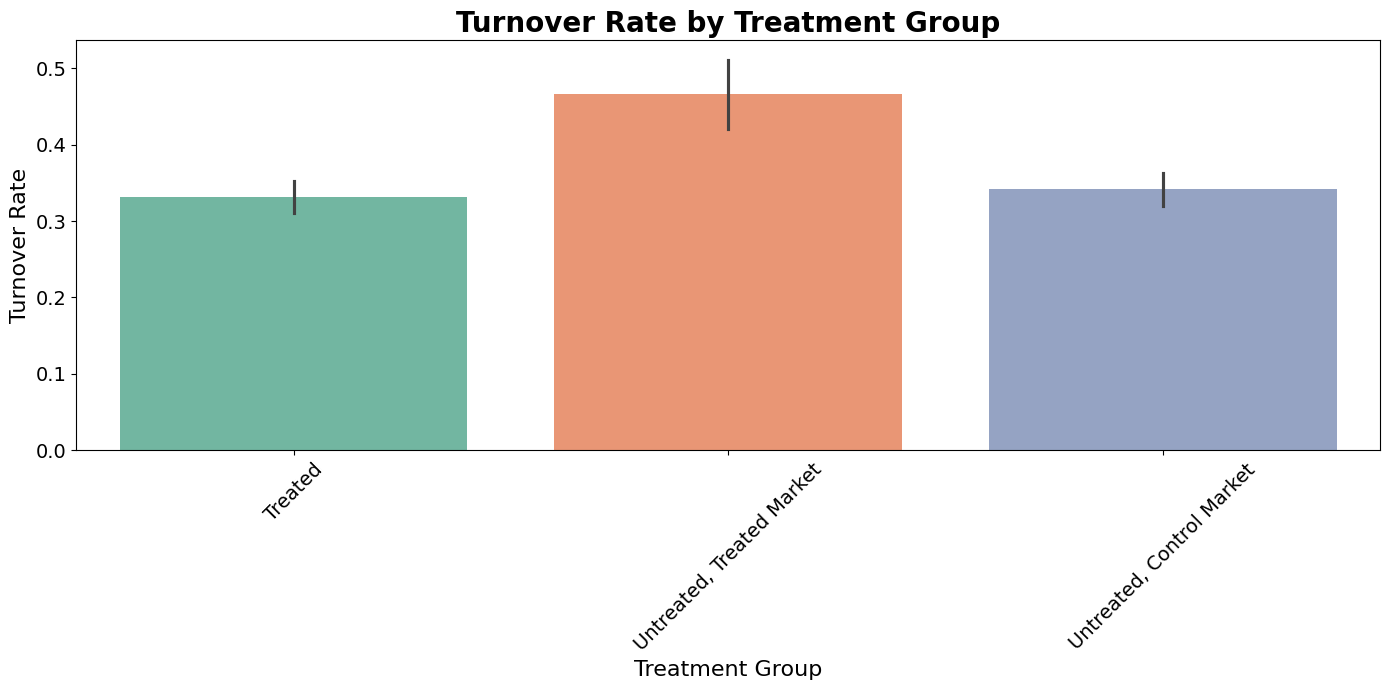

In [36]:
df_pivot['labor_growth'] = (df_pivot['labor_endline'] - df_pivot['labor_baseline'])

# Calculate the number of employees who left (absolute value to ensure positivity)
df_pivot['employees_left'] = abs(df_pivot['labor_endline'] - df_pivot['labor_baseline'])

# Calculate the average number of employees during the period
df_pivot['average_employees'] = (df_pivot['labor_baseline'] + df_pivot['labor_endline']) / 2

# Calculate the turnover rate
df_pivot['turnover_rate'] = df_pivot['employees_left'] / df_pivot['average_employees']

# Remove rows where 'average_employees' is zero or NaN (to avoid division errors)
df_pivot = df_pivot.dropna(subset=['turnover_rate'])
df_pivot = df_pivot[df_pivot['average_employees'] > 0]

# Merge treatment group information back to the DataFrame if necessary

# Plotting turnover rate by treatment group
plt.figure(figsize=(14, 7))
sns.barplot(data=df_pivot, x='intensity', y='turnover_rate', palette='Set2')
plt.title('Turnover Rate by Treatment Group', fontsize=20, fontweight='bold')
plt.xlabel('Treatment Group', fontsize=16)
plt.ylabel('Turnover Rate', fontsize=16)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig('turnover_rate_by_treatment_group.png', format = 'png')
plt.show()



In [98]:
df_pivot.head()

firmid                  intensity  labor_baseline  labor_endline  \
0   111.0                    Treated            12.0           13.0   
1   112.0                    Treated             9.0            9.0   
2   113.0                    Treated             6.0            5.0   
3   114.0                    Treated            12.0           11.0   
4   115.0  Untreated, Treated Market             7.0            3.0   

   labor_growth  employees_left  average_employees  turnover_rate  
0           1.0             1.0               12.5       0.080000  
1           0.0             0.0                9.0       0.000000  
2          -1.0             1.0                5.5       0.181818  
3          -1.0             1.0               11.5       0.086957  
4          -4.0             4.0                5.0       0.800000

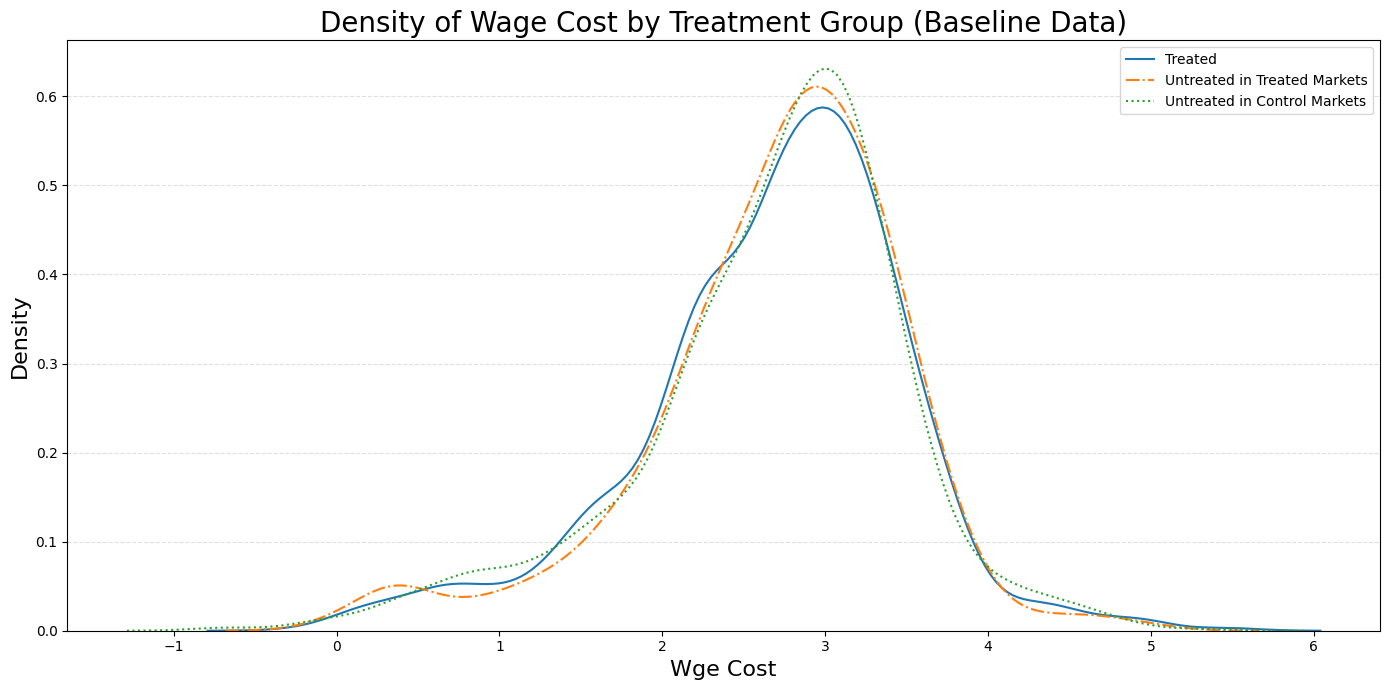

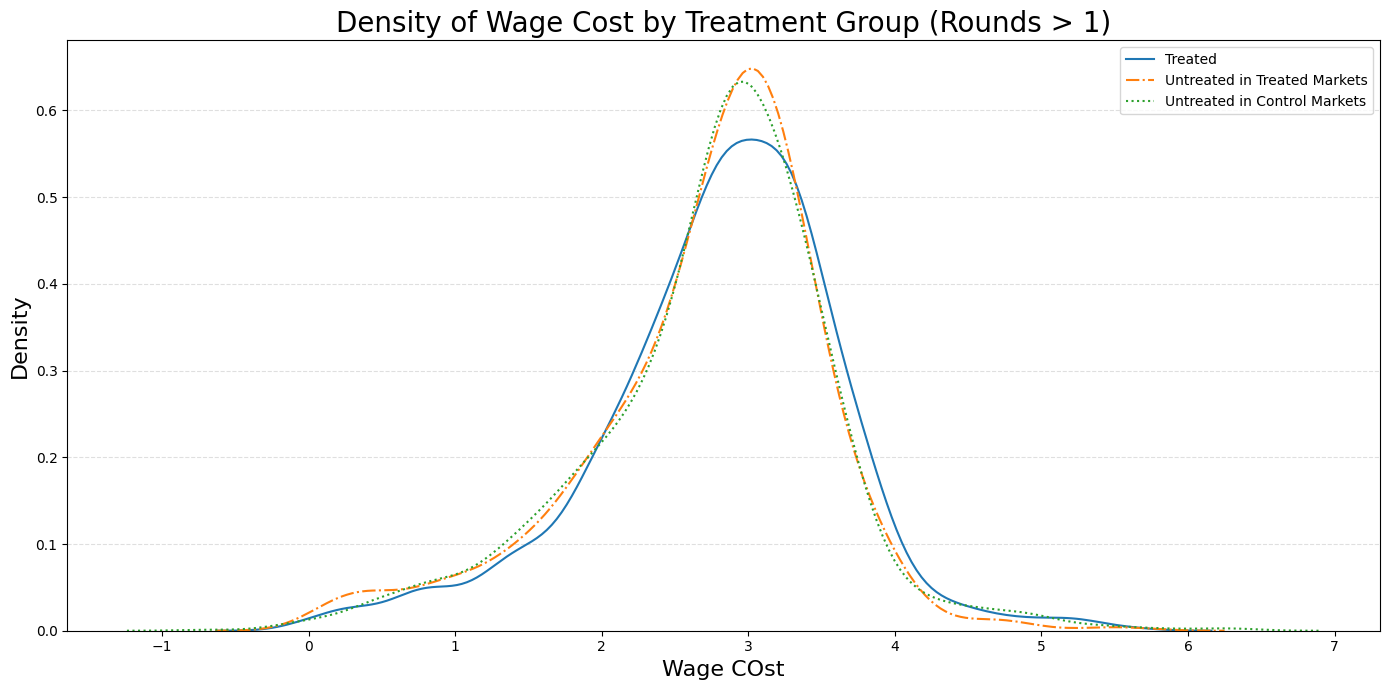

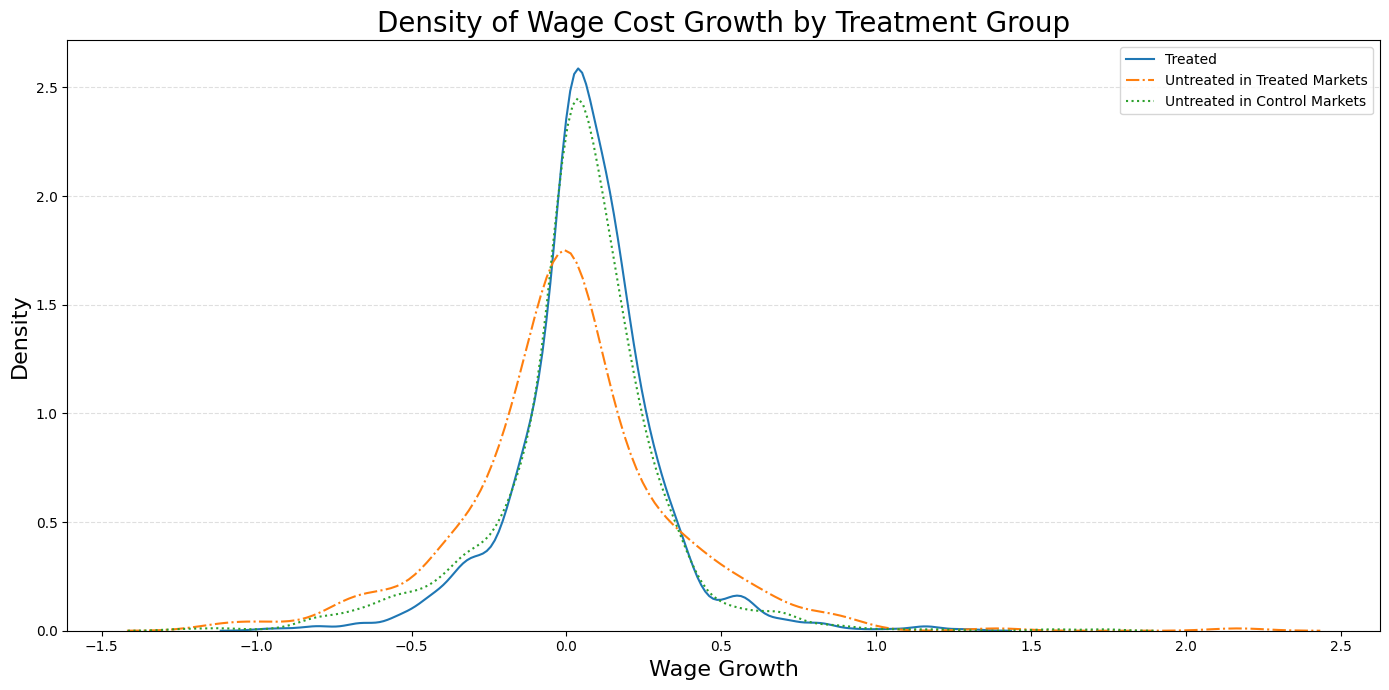

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df = loanmain_df2.reset_index().copy()

# Calculate growth in log sales for rounds > 1
df['growth'] = df.groupby('firmid')['lnwage_cost'].diff().where(df['round'] > 1)

# Calculate average growthsales per firm for rounds > 1
df['avggrowth'] = df.groupby('firmid')['growth'].transform('mean').where(df['round'] > 1)

# Define the line styles for different groups
line_styles = {
    'Treated': 'solid',
    'Untreated in Treated Markets': 'dashdot',
    'Untreated in Control Markets': 'dotted'
}

# Plot for log sales (lnpart5revenue) in round 1
plt.figure(figsize=(14, 7))
sns.kdeplot(data=df[(df['type'] == 1) & (df['round'] == 1)], x='lnwage_cost', label='Treated', linestyle=line_styles['Treated'])
sns.kdeplot(data=df[(df['type'] == 0) & (df['survey_town_type'] != 0) & (df['round'] == 1)], x='lnwage_cost', label='Untreated in Treated Markets', linestyle=line_styles['Untreated in Treated Markets'])
sns.kdeplot(data=df[(df['type'] == 0) & (df['survey_town_type'] == 0) & (df['round'] == 1)], x='lnwage_cost', label='Untreated in Control Markets', linestyle=line_styles['Untreated in Control Markets'])
plt.title('Density of Wage Cost by Treatment Group (Baseline Data)', fontsize=20)
plt.xlabel('Wge Cost', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.savefig('wage_cost_density.png', format = 'png')
plt.show()

# Plot for average log sales growth (avggrowthsales)
plt.figure(figsize=(14, 7))
sns.kdeplot(data=df[(df['type'] == 1) & (df['round'] > 1)], x='lnwage_cost', label='Treated', linestyle=line_styles['Treated'])
sns.kdeplot(data=df[(df['type'] == 0) & (df['survey_town_type'] != 0) & (df['round'] > 1)], x='lnwage_cost', label='Untreated in Treated Markets', linestyle=line_styles['Untreated in Treated Markets'])
sns.kdeplot(data=df[(df['type'] == 0) & (df['survey_town_type'] == 0) & (df['round'] > 1)], x='lnwage_cost', label='Untreated in Control Markets', linestyle=line_styles['Untreated in Control Markets'])
plt.title('Density of Wage Cost by Treatment Group (Rounds > 1)', fontsize=20)
plt.xlabel('Wage COst', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


# Plot for average log sales growth (avggrowthsales)
plt.figure(figsize=(14, 7))
sns.kdeplot(data=df[(df['type'] == 1) & (df['round'] > 1)], x='avggrowth', label='Treated', linestyle=line_styles['Treated'])
sns.kdeplot(data=df[(df['type'] == 0) & (df['survey_town_type'] != 0) & (df['round'] > 1)], x='avggrowth', label='Untreated in Treated Markets', linestyle=line_styles['Untreated in Treated Markets'])
sns.kdeplot(data=df[(df['type'] == 0) & (df['survey_town_type'] == 0) & (df['round'] > 1)], x='avggrowth', label='Untreated in Control Markets', linestyle=line_styles['Untreated in Control Markets'])
plt.title('Density of Wage Cost Growth by Treatment Group', fontsize=20)
plt.xlabel('Wage Growth', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.savefig('wage_cost_growth_density.png', format = 'png')
plt.show()


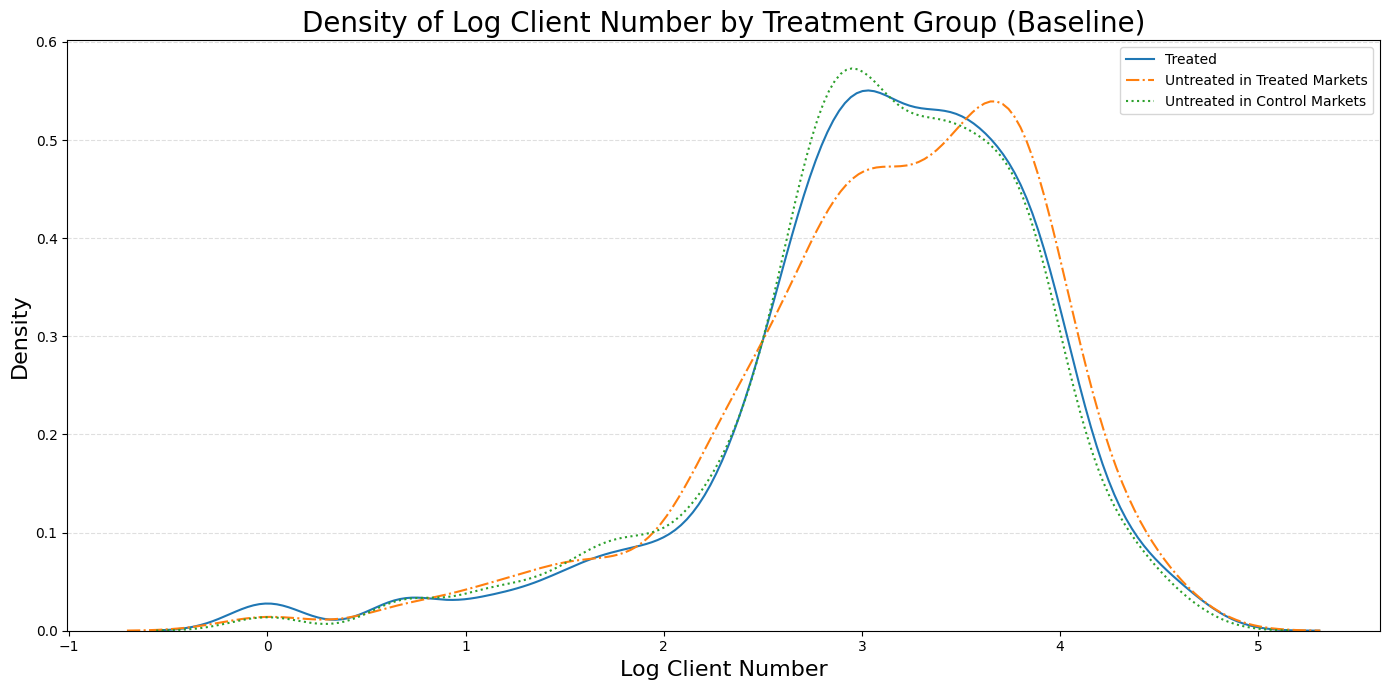

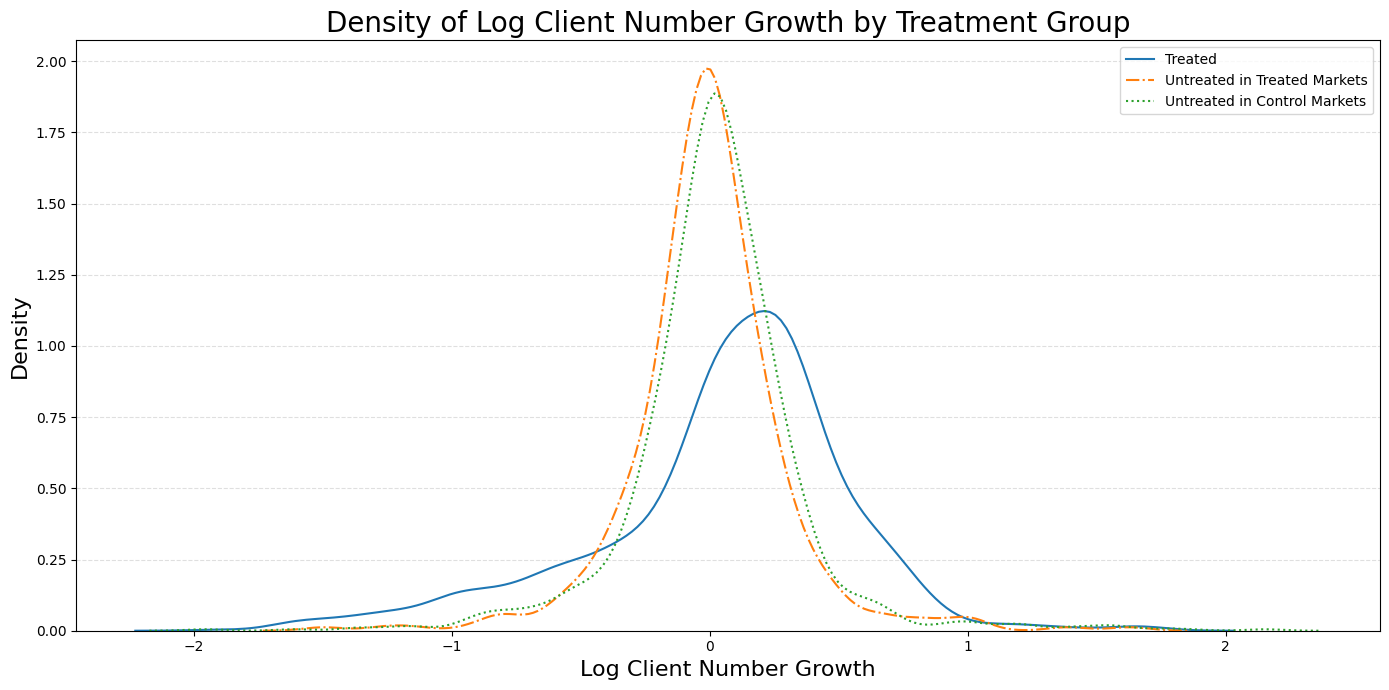

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df = loanmain_df2.reset_index().copy()

# Calculate growth in log sales for rounds > 1
df['growth'] = df.groupby('firmid')['lnnum_clients'].diff().where(df['round'] > 1)

# Calculate average growthsales per firm for rounds > 1
df['avggrowth'] = df.groupby('firmid')['growth'].transform('mean').where(df['round'] > 1)

# Define the line styles for different groups
line_styles = {
    'Treated': 'solid',
    'Untreated in Treated Markets': 'dashdot',
    'Untreated in Control Markets': 'dotted'
}

# Plot for log sales (lnpart5revenue) in round 1
plt.figure(figsize=(14, 7))
sns.kdeplot(data=df[(df['type'] == 1) & (df['round'] == 1)], x='lnnum_clients', label='Treated', linestyle=line_styles['Treated'])
sns.kdeplot(data=df[(df['type'] == 0) & (df['survey_town_type'] != 0) & (df['round'] == 1)], x='lnnum_clients', label='Untreated in Treated Markets', linestyle=line_styles['Untreated in Treated Markets'])
sns.kdeplot(data=df[(df['type'] == 0) & (df['survey_town_type'] == 0) & (df['round'] == 1)], x='lnnum_clients', label='Untreated in Control Markets', linestyle=line_styles['Untreated in Control Markets'])
plt.title('Density of Log Client Number by Treatment Group (Baseline)', fontsize=20)
plt.xlabel('Log Client Number', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.savefig('log_client_number_density.png', format = 'png')
plt.show()

# Plot for average log sales growth (avggrowthsales)
plt.figure(figsize=(14, 7))
sns.kdeplot(data=df[(df['type'] == 1) & (df['round'] > 1)], x='avggrowth', label='Treated', linestyle=line_styles['Treated'])
sns.kdeplot(data=df[(df['type'] == 0) & (df['survey_town_type'] != 0) & (df['round'] > 1)], x='avggrowth', label='Untreated in Treated Markets', linestyle=line_styles['Untreated in Treated Markets'])
sns.kdeplot(data=df[(df['type'] == 0) & (df['survey_town_type'] == 0) & (df['round'] > 1)], x='avggrowth', label='Untreated in Control Markets', linestyle=line_styles['Untreated in Control Markets'])
plt.title('Density of Log Client Number Growth by Treatment Group', fontsize=20)
plt.xlabel('Log Client Number Growth', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.savefig('log_client_number_growth_density.png', format = 'png')
plt.show()


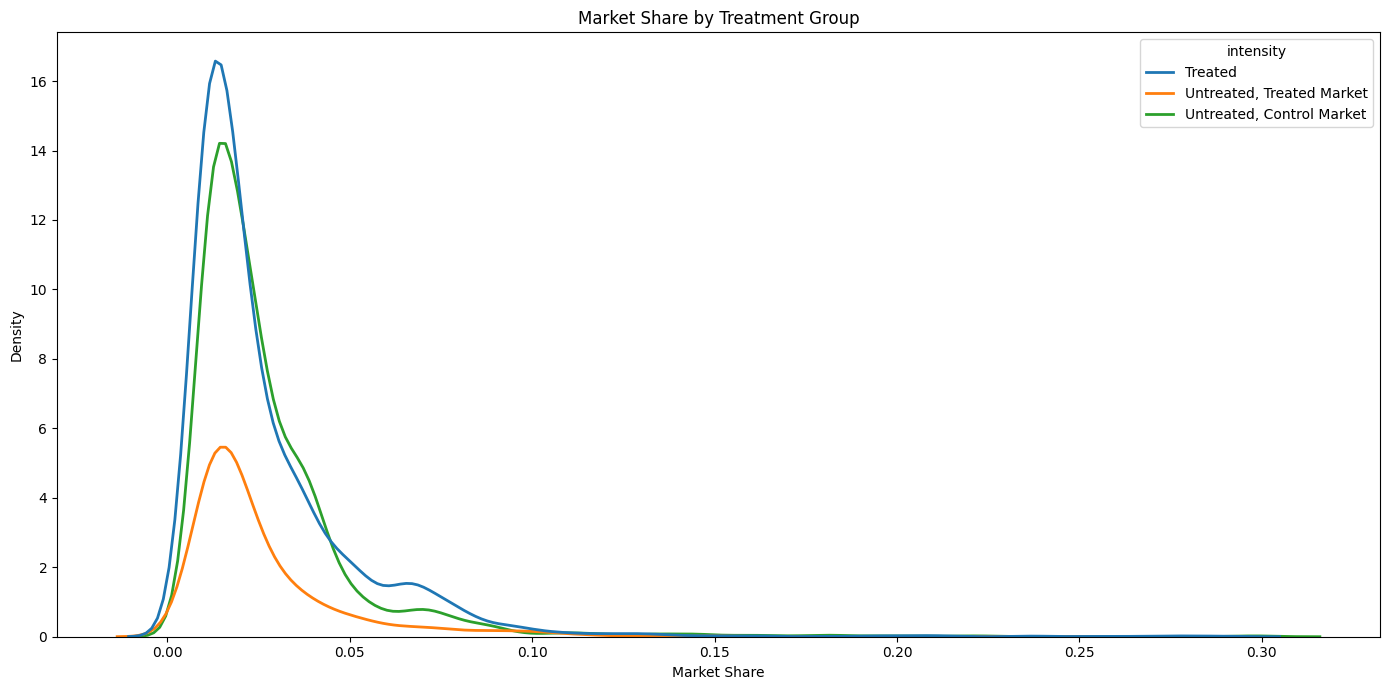

firmid  shutdown  newproduct  gender   age  education_college  num_clients  \
0   111.0       0.0         0.0     1.0  38.0                0.0         34.0   
1   111.0       0.0         0.0     0.0  39.0                0.0         50.0   
2   111.0       0.0         0.0     0.0  41.0                0.0         17.0   
3   112.0       0.0         0.0     0.0  22.0                0.0         12.0   
4   112.0       0.0         1.0     0.0  24.0                0.0         12.0   

   num_supplier  bankloan  round  ...  _Ibasecount_7  _Ibasecount_8  \
0          15.0       0.0    1.0  ...            1.0            0.0   
1          12.0       0.0    2.0  ...            1.0            0.0   
2          13.0       0.0    3.0  ...            1.0            0.0   
3           3.0       1.0    1.0  ...            1.0            0.0   
4           2.0       0.0    2.0  ...            1.0            0.0   

   _Ibasecount_9  _Ibasecount_10  _Ibasecount_11  basecounty  survey_town  \
0            0.0             0.0             0.0         7.0          9.0   
1            0.0             0.0             0.0         7.0          9.0   
2            0.0             0.0             0.0         7.0          9.0   
3            0.0             0.0             0.0         7.0          9.0   
4            0.0             0.0             0.0         7.0          9.0   

   intensity  total_market_revenue  market_share  
0    Treated            353.502777      0.017288  
1    Treated            326.107697      0.019711  
2    Treated            300.349792      0.013352  
3    Treated            353.502777      0.012396  
4    Treated            326.107697      0.013317  

[5 rows x 94 columns]

In [123]:
# Calculate total market revenue by round and market
df = loanmain_df2.reset_index().copy()

df['total_market_revenue'] = df.groupby(['survey_town', 'round'])['lnpart5revenue'].transform('sum')

# Calculate market share for each firm
df['market_share'] = df['lnpart5revenue'] / df['total_market_revenue']

# Plot market share distribution by treatment group
plt.figure(figsize=(14, 7))
sns.kdeplot(data=df, x='market_share', hue='intensity', linewidth=2)
plt.title('Market Share by Treatment Group')
plt.xlabel('Market Share')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

df.head()

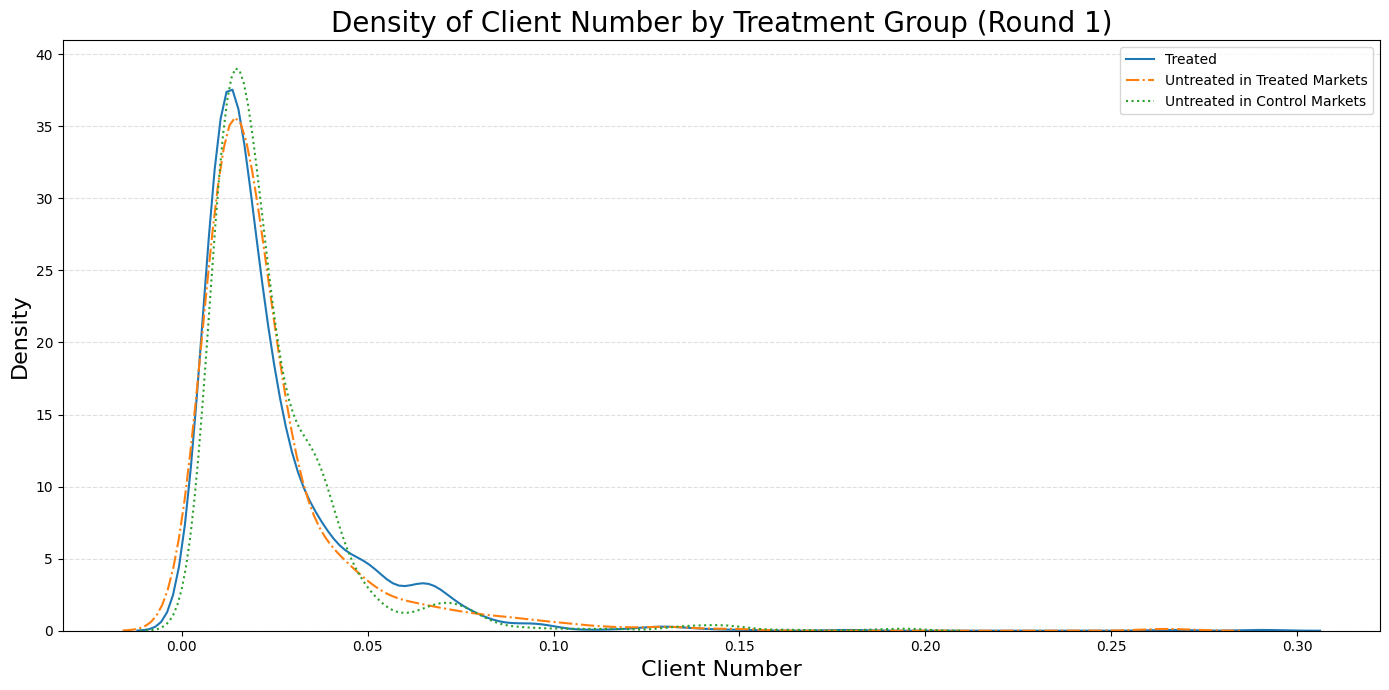

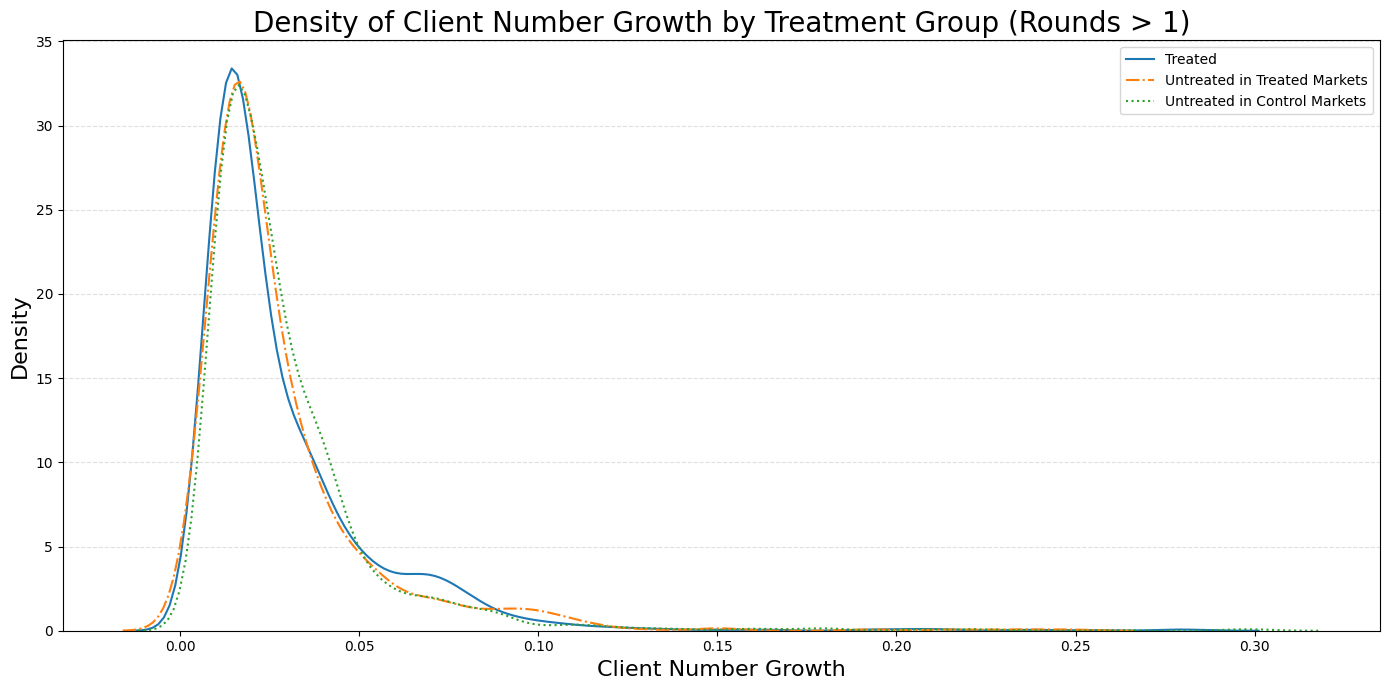

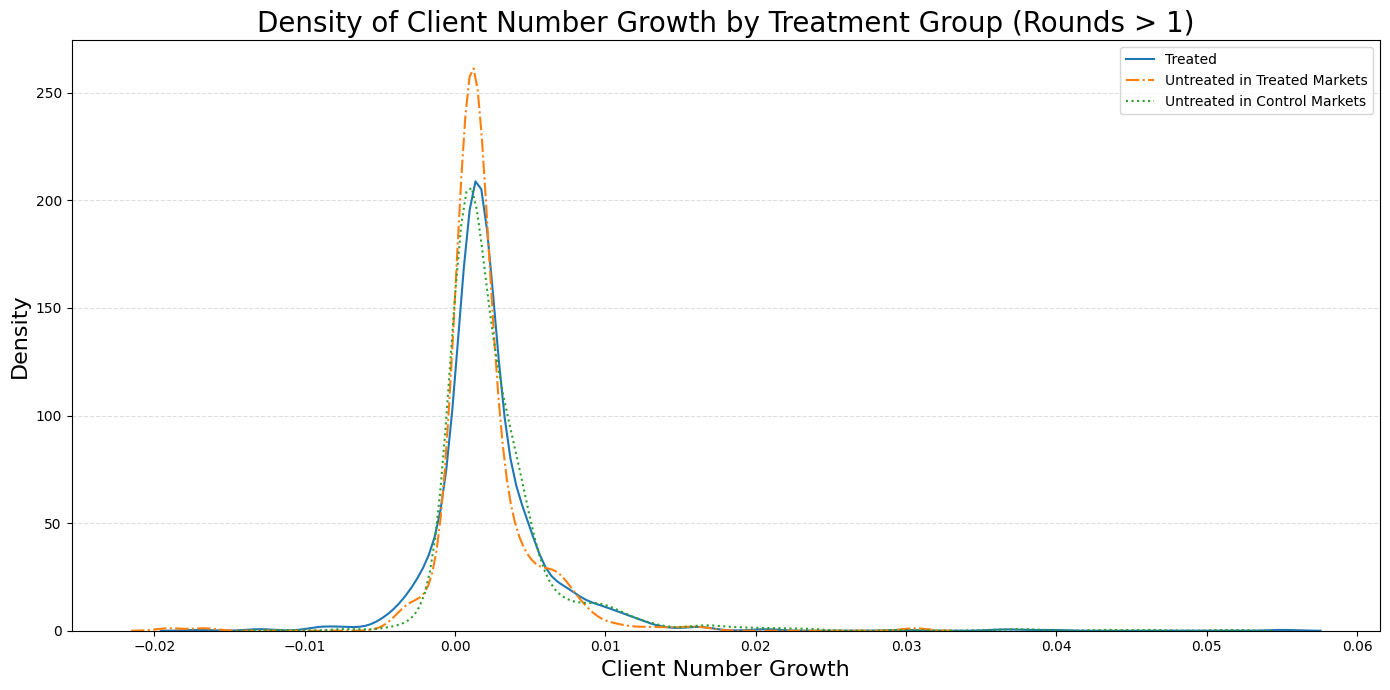

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Calculate growth in log sales for rounds > 1
df['growth'] = df.groupby('firmid')['market_share'].diff().where(df['round'] > 1)

# Calculate average growthsales per firm for rounds > 1
df['avggrowth'] = df.groupby('firmid')['growth'].transform('mean').where(df['round'] > 1)

# Define the line styles for different groups
line_styles = {
    'Treated': 'solid',
    'Untreated in Treated Markets': 'dashdot',
    'Untreated in Control Markets': 'dotted'
}

# Plot for log sales (lnpart5revenue) in round 1
plt.figure(figsize=(14, 7))
sns.kdeplot(data=df[(df['type'] == 1) & (df['round'] == 1)], x='market_share', label='Treated', linestyle=line_styles['Treated'])
sns.kdeplot(data=df[(df['type'] == 0) & (df['survey_town_type'] != 0) & (df['round'] == 1)], x='market_share', label='Untreated in Treated Markets', linestyle=line_styles['Untreated in Treated Markets'])
sns.kdeplot(data=df[(df['type'] == 0) & (df['survey_town_type'] == 0) & (df['round'] == 1)], x='market_share', label='Untreated in Control Markets', linestyle=line_styles['Untreated in Control Markets'])
plt.title('Density of Client Number by Treatment Group (Round 1)', fontsize=20)
plt.xlabel('Client Number', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


# Plot for average log sales growth (avggrowthsales)
plt.figure(figsize=(14, 7))
sns.kdeplot(data=df[(df['type'] == 1) & (df['round'] > 1)], x='market_share', label='Treated', linestyle=line_styles['Treated'])
sns.kdeplot(data=df[(df['type'] == 0) & (df['survey_town_type'] != 0) & (df['round'] > 1)], x='market_share', label='Untreated in Treated Markets', linestyle=line_styles['Untreated in Treated Markets'])
sns.kdeplot(data=df[(df['type'] == 0) & (df['survey_town_type'] == 0) & (df['round'] > 1)], x='market_share', label='Untreated in Control Markets', linestyle=line_styles['Untreated in Control Markets'])
plt.title('Density of Client Number Growth by Treatment Group (Rounds > 1)', fontsize=20)
plt.xlabel('Client Number Growth', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()
# Plot for average log sales growth (avggrowthsales)
plt.figure(figsize=(14, 7))
sns.kdeplot(data=df[(df['type'] == 1) & (df['round'] > 1)], x='avggrowth', label='Treated', linestyle=line_styles['Treated'])
sns.kdeplot(data=df[(df['type'] == 0) & (df['survey_town_type'] != 0) & (df['round'] > 1)], x='avggrowth', label='Untreated in Treated Markets', linestyle=line_styles['Untreated in Treated Markets'])
sns.kdeplot(data=df[(df['type'] == 0) & (df['survey_town_type'] == 0) & (df['round'] > 1)], x='avggrowth', label='Untreated in Control Markets', linestyle=line_styles['Untreated in Control Markets'])
plt.title('Density of Client Number Growth by Treatment Group (Rounds > 1)', fontsize=20)
plt.xlabel('Client Number Growth', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


In [124]:
market_share_trends = df.groupby(['round', 'intensity'])['market_share'].mean().reset_index()

# Pivot the data to create columns for each treatment group
market_share_pivot = market_share_trends.pivot(index='round', columns='intensity', values='market_share')


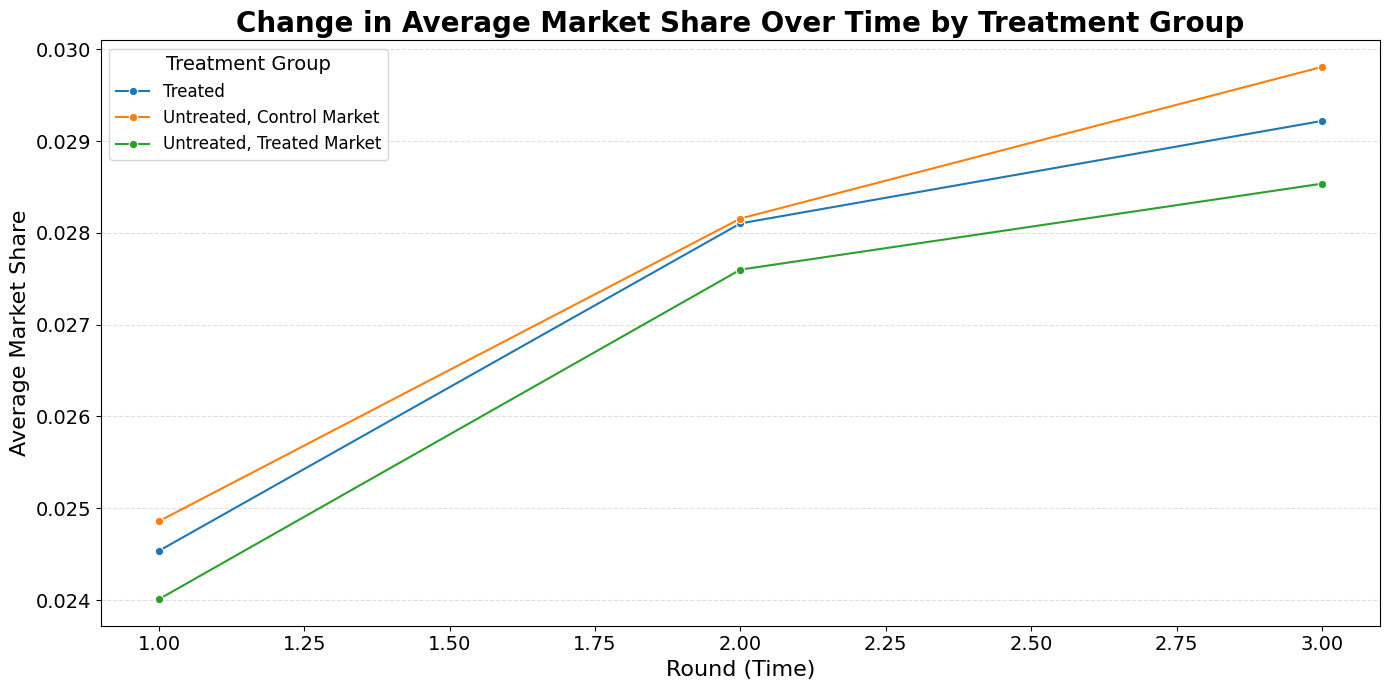

In [125]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=market_share_trends, x='round', y='market_share', hue='intensity', palette=palette, marker='o')
plt.title('Change in Average Market Share Over Time by Treatment Group', fontsize=20, fontweight='bold')
plt.xlabel('Round (Time)', fontsize=16)
plt.ylabel('Average Market Share', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='Treatment Group', fontsize=12, title_fontsize=14, loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [40]:
df.head()

shutdown  newproduct  gender   age  education_college  num_clients  \
firmid                                                                       
111.0        0.0         0.0     1.0  38.0                0.0         34.0   
111.0        0.0         0.0     0.0  39.0                0.0         50.0   
111.0        0.0         0.0     0.0  41.0                0.0         17.0   
112.0        0.0         0.0     0.0  22.0                0.0         12.0   
112.0        0.0         1.0     0.0  24.0                0.0         12.0   

        num_supplier  bankloan  round  polconnection  ...  indsize  \
firmid                                                ...            
111.0           15.0       0.0    1.0            0.0  ...     36.0   
111.0           12.0       0.0    2.0            NaN  ...     36.0   
111.0           13.0       0.0    3.0            NaN  ...     36.0   
112.0            3.0       1.0    1.0            0.0  ...      6.0   
112.0            2.0       0.0    2.0            NaN  ...      6.0   

         indsalessum  marketshare  marketshare2      herf    invherf  \
firmid                                                                 
111.0   11503.500000     0.019603      0.000384  0.015637  63.951118   
111.0   13403.729492     0.023087      0.000533  0.016157  61.892632   
111.0   12727.082031     0.002167      0.000005  0.018490  54.083206   
112.0    1845.000000     0.021680      0.000470  0.160916   6.214418   
112.0    1768.178589     0.021749      0.000473  0.181971   5.495395   

        interpost  inter4post  interpost_comp1  interpost_comp2  
firmid                                                           
111.0         0.0    0.000000         0.000000              0.0  
111.0         1.0    0.771429         0.771429              0.0  
111.0         1.0    0.771429         0.771429              0.0  
112.0         0.0    0.000000         0.000000              0.0  
112.0         1.0    0.800000         0.800000              0.0  

[5 rows x 101 columns]

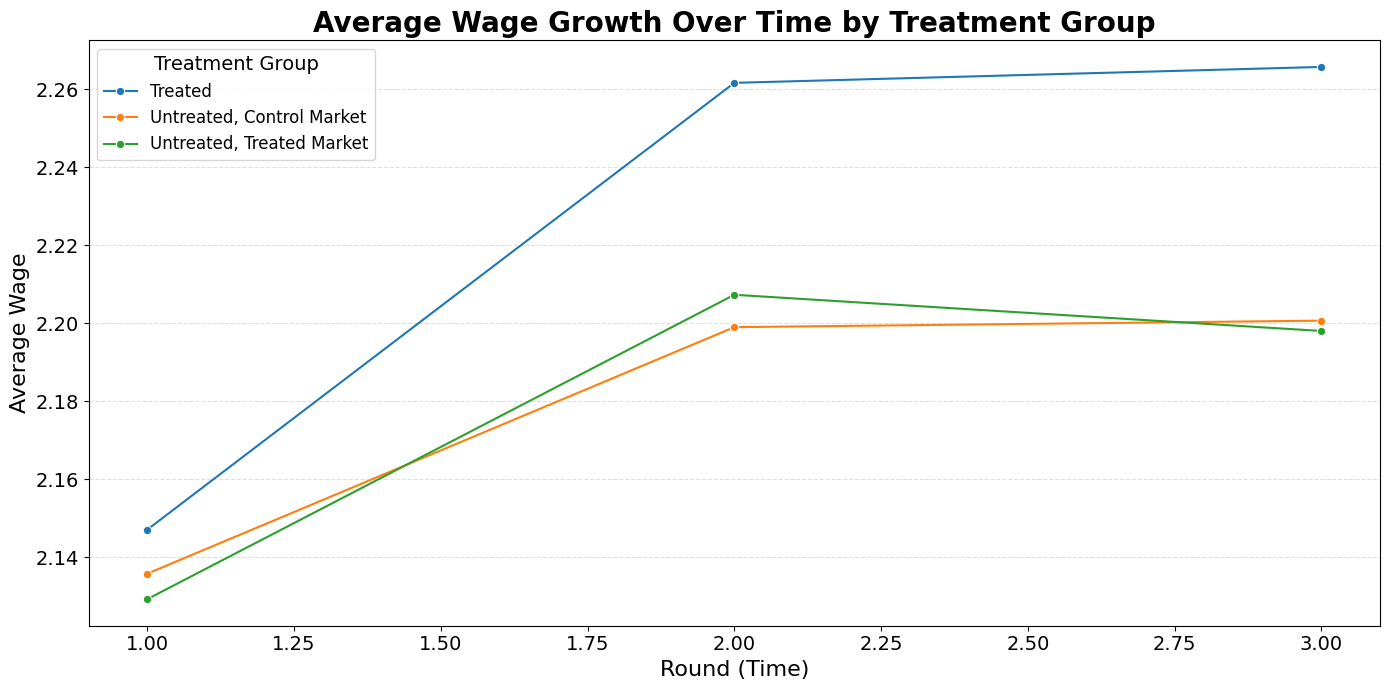

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = loanmain_df2.copy()
# Custom color palette for distinct colors
palette = {
    'Treated': '#1f77b4',  # Blue
    'Untreated, Control Market': '#ff7f0e',  # Orange
    'Untreated, Treated Market': '#2ca02c',  # Green
    'Unknown': '#d62728'  # Red (in case of unknowns)
}

# Calculate average wage for each round
df['average_wage'] = df['wage_cost'] / df['labor']

# Calculate the average wage growth for each treatment group by round
wage_growth_trends = df.groupby(['round', 'intensity'])['average_wage'].mean().reset_index()

# Plotting wage growth trends over time by treatment group
plt.figure(figsize=(14, 7))
sns.lineplot(data=wage_growth_trends, x='round', y='average_wage', hue='intensity', palette=palette, marker='o')
plt.title('Average Wage Growth Over Time by Treatment Group', fontsize=20, fontweight='bold')
plt.xlabel('Round (Time)', fontsize=16)
plt.ylabel('Average Wage', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='Treatment Group', fontsize=12, title_fontsize=14, loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


## Take-Up - effects on borrowing

In [19]:
df = loanmain_df2.copy()

# Step 1: Calculate market and industry variables
# Calculate town size (number of firms in each market by round)
df['townsize'] = df.groupby(['survey_town', 'round'])['type'].transform('count')

# Calculate industry size (number of firms in each industry-market-round combination)
df['indsize'] = df.groupby(['survey_town', 'industry', 'round'])['type'].transform('count')

# Calculate sum of part5revenue in each industry-market-round
df['indsalessum'] = df.groupby(['industry', 'survey_town', 'round'])['part5revenue'].transform('sum')



In [20]:
# Calculate market share and Herfindahl index
df['marketshare'] = df['part5revenue'] / (2 * df['indsalessum'])
df['marketshare2'] = df['marketshare'] ** 2
df['herf'] = df.groupby(['survey_town', 'industry', 'round'])['marketshare2'].transform('sum') * 2
df['invherf'] = 1 / df['herf']

baseline_data = df[df['post'] == 0]
endline_data = df[df['round'] == 3]


In [21]:
# Assuming df is already loaded and cleaned as 'endline_data'
# Step 1: Generate treatment-related variables
endline_data['sumtreated'] = endline_data.groupby(['survey_town', 'round'])['type'].transform('sum')
endline_data['treatratio_peer'] = (endline_data['sumtreated'] - endline_data['type']) / (endline_data['townsize'] - 1)
endline_data['inter_untpeer'] = endline_data['treatratio_peer'] * (1 - endline_data['type'])

<ipython-input-21-7b789a063c10>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  endline_data['sumtreated'] = endline_data.groupby(['survey_town', 'round'])['type'].transform('sum')
<ipython-input-21-7b789a063c10>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  endline_data['treatratio_peer'] = (endline_data['sumtreated'] - endline_data['type']) / (endline_data['townsize'] - 1)
<ipython-input-21-7b789a063c10>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [ ]:
endline_data.head()

shutdown  newproduct  gender   age  education_college  num_clients  \
firmid                                                                       
111.0        0.0         0.0     0.0  41.0                0.0         17.0   
112.0        0.0         1.0     0.0  25.0                0.0         43.0   
113.0        0.0         0.0     0.0  32.0                0.0         31.0   
114.0        0.0         0.0     0.0  34.0                0.0        157.0   
115.0        1.0         0.0     NaN   NaN                NaN         10.0   

        num_supplier  bankloan  round  polconnection  ...  townsize  indsize  \
firmid                                                ...                      
111.0           13.0       0.0    3.0            NaN  ...        63     36.0   
112.0            1.0       0.0    3.0            NaN  ...        63      6.0   
113.0            3.0       0.0    3.0            NaN  ...        63     36.0   
114.0            1.0       0.0    3.0            NaN  ...        63     36.0   
115.0            1.0       0.0    3.0            NaN  ...        63     13.0   

         indsalessum  marketshare  marketshare2      herf    invherf  \
firmid                                                                 
111.0   12727.082031     0.002167      0.000005  0.018490  54.083206   
112.0    1246.252686     0.157129      0.024689  0.110216   9.073053   
113.0   12727.082031     0.011853      0.000140  0.018490  54.083206   
114.0   12727.082031     0.020031      0.000401  0.018490  54.083206   
115.0    2705.632812     0.013161      0.000173  0.059791  16.724821   

        sumtreated  treatratio_peer  inter_untpeer  
firmid                                              
111.0         49.0         0.774194       0.000000  
112.0         49.0         0.774194       0.000000  
113.0         49.0         0.774194       0.000000  
114.0         49.0         0.774194       0.000000  
115.0         49.0         0.790323       0.790323  

[5 rows x 100 columns]

In [ ]:
summary_stats = endline_data[(endline_data['round'] == 3) & (endline_data['survey_town_type'] == 0)][['newloan', 'otherloan_end', 'allloan_end']].describe()
print(summary_stats)

           newloan  otherloan_end  allloan_end
count  1247.000000    1040.000000  1042.000000
mean      0.031275       0.295192     0.321497
std       0.174128       0.456349     0.467278
min       0.000000       0.000000     0.000000
25%       0.000000       0.000000     0.000000
50%       0.000000       0.000000     0.000000
75%       0.000000       1.000000     1.000000
max       1.000000       1.000000     1.000000


In [ ]:
X = sm.add_constant(endline_data[endline_data['round'] == 3]['type'])
y = endline_data[endline_data['round'] == 3]['newloan']
model_type = sm.OLS(y, X).fit(cov_type='cluster', cov_kwds={'groups': endline_data['survey_town']})
mean_newloan = endline_data[(endline_data['round'] == 3) & (endline_data['survey_town_type'] == 0)]['newloan'].mean()


print(model_type.summary())

                            OLS Regression Results                            
Dep. Variable:                newloan   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     67.38
Date:                Sun, 20 Oct 2024   Prob (F-statistic):           4.04e-12
Time:                        22:54:30   Log-Likelihood:                -1347.6
No. Observations:                3173   AIC:                             2699.
Df Residuals:                    3171   BIC:                             2711.
Df Model:                           1                                         
Covariance Type:              cluster                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0674      0.014      4.817      0.0

In [ ]:
endline_data_clean = endline_data.copy()

In [ ]:
X = sm.add_constant(endline_data_clean[endline_data_clean['round'] == 3][['type', 'inter_untpeer']])
y = endline_data_clean[endline_data_clean['round'] == 3]['newloan']
model_type_inter = sm.OLS(y, X).fit(cov_type='cluster', cov_kwds={'groups': endline_data_clean['survey_town']})
mean_newloan = endline_data_clean[(endline_data_clean['round'] == 3) & (endline_data_clean['survey_town_type'] == 0)]['newloan'].mean()

print(model_type_inter.summary())


                            OLS Regression Results                            
Dep. Variable:                newloan   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     44.63
Date:                Sun, 20 Oct 2024   Prob (F-statistic):           1.35e-13
Time:                        22:54:38   Log-Likelihood:                -1326.3
No. Observations:                3173   AIC:                             2659.
Df Residuals:                    3170   BIC:                             2677.
Df Model:                           2                                         
Covariance Type:              cluster                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0323      0.012      2.721

In [ ]:
X = sm.add_constant(endline_data_clean[endline_data_clean['round'] == 3][['T50', 'T80', 'C50', 'C80']])
y = endline_data_clean[endline_data_clean['round'] == 3]['newloan']
model_market_indicators = sm.OLS(y, X).fit(cov_type='cluster', cov_kwds={'groups': endline_data_clean['survey_town']})
mean_newloan = endline_data_clean[(endline_data_clean['round'] == 3) & (endline_data_clean['survey_town_type'] == 0)]['newloan'].mean()


print(model_market_indicators.summary())

Step 5 completed: Regression for 'newloan' with market indicators.
                            OLS Regression Results                            
Dep. Variable:                newloan   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     24.22
Date:                Tue, 01 Oct 2024   Prob (F-statistic):           5.38e-13
Time:                        17:47:31   Log-Likelihood:                -1326.0
No. Observations:                3173   AIC:                             2662.
Df Residuals:                    3168   BIC:                             2692.
Df Model:                           4                                         
Covariance Type:              cluster                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------

In [ ]:
endline_data_cleans = endline_data_clean[(endline_data_clean['round'] == 3) & (~endline_data_clean['otherloan_end'].isna())]
endline_data_cleans[endline_data_cleans["round"] == 3]["otherloan_end"].isna().sum()

0

In [ ]:
# Drop all NaN values in 'otherloan_end' for round 3

# Step 6a: Regression for 'otherloan_end' with 'type' and 'inter_untpeer' using data with all NaNs dropped
X_otherloan_inter = sm.add_constant(endline_data_cleans[['type', 'inter_untpeer']])
y_otherloan_inter = endline_data_cleans['otherloan_end']
model_otherloan_inter = sm.OLS(y_otherloan_inter, X_otherloan_inter).fit(cov_type='cluster', cov_kwds={'groups': endline_data_cleans['survey_town']})

mean_otherloan_inter = endline_data_cleans[endline_data_cleans['survey_town_type'] == 0]['otherloan_end'].mean()

print(model_otherloan_inter.summary())



Step 6a completed: Regression for 'otherloan_end' with 'type' and 'inter_untpeer' (all NaNs dropped).
                            OLS Regression Results                            
Dep. Variable:          otherloan_end   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.229
Date:                Sun, 20 Oct 2024   Prob (F-statistic):              0.298
Time:                        05:19:53   Log-Likelihood:                -1718.1
No. Observations:                2658   AIC:                             3442.
Df Residuals:                    2655   BIC:                             3460.
Df Model:                           2                                         
Covariance Type:              cluster                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
--------------------------

In [ ]:
X_otherloan_inter = sm.add_constant(endline_data_cleans[['T50', 'T80', 'C50', 'C80']])
y_otherloan_inter = endline_data_cleans['otherloan_end']
model_otherloan_inter = sm.OLS(y_otherloan_inter, X_otherloan_inter).fit(cov_type='cluster', cov_kwds={'groups': endline_data_cleans['survey_town']})

mean_otherloan_inter = endline_data_cleans[endline_data_cleans['survey_town_type'] == 0]['otherloan_end'].mean()

print(model_otherloan_inter.summary())



Step 6b completed: Regression for 'otherloan_end' with market indicators
                            OLS Regression Results                            
Dep. Variable:          otherloan_end   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.7485
Date:                Sun, 20 Oct 2024   Prob (F-statistic):              0.562
Time:                        05:19:58   Log-Likelihood:                -1718.1
No. Observations:                2658   AIC:                             3446.
Df Residuals:                    2653   BIC:                             3476.
Df Model:                           4                                         
Covariance Type:              cluster                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------

In [ ]:
# Regression for 'allloan_end' with 'type' and 'inter_untpeer' using data with all NaNs dropped
X_allloan_inter = sm.add_constant(endline_data_cleans[['type', 'inter_untpeer']])
y_allloan_inter = endline_data_cleans['allloan_end']
model_allloan_inter = sm.OLS(y_allloan_inter, X_allloan_inter).fit(cov_type='cluster', cov_kwds={'groups': endline_data_cleans['survey_town']})

mean_allloan_inter = endline_data_cleans[endline_data_cleans['survey_town_type'] == 0]['allloan_end'].mean()


print(model_allloan_inter.summary())


Step 6a completed: Regression for 'allloan_end' with 'type' and 'inter_untpeer' (all NaNs dropped).
                            OLS Regression Results                            
Dep. Variable:            allloan_end   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     33.72
Date:                Sun, 20 Oct 2024   Prob (F-statistic):           3.04e-11
Time:                        05:20:04   Log-Likelihood:                -1832.9
No. Observations:                2658   AIC:                             3672.
Df Residuals:                    2655   BIC:                             3689.
Df Model:                           2                                         
Covariance Type:              cluster                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
----------------------------

In [ ]:
# Regression for 'allloan_end' with 'type' and 'inter_untpeer' using data with all NaNs dropped
X_allloan_inter = sm.add_constant(endline_data_cleans[['T50', 'T80', 'C50', 'C80']])
y_allloan_inter = endline_data_cleans['allloan_end']
model_allloan_inter = sm.OLS(y_allloan_inter, X_allloan_inter).fit(cov_type='cluster', cov_kwds={'groups': endline_data_cleans['survey_town']})

mean_allloan_inter = endline_data_cleans[endline_data_cleans['survey_town_type'] == 0]['allloan_end'].mean()

print(model_allloan_inter.summary())



Step 6a completed: Regression for 'allloan_end' with market indicators.
                            OLS Regression Results                            
Dep. Variable:            allloan_end   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     19.38
Date:                Sun, 20 Oct 2024   Prob (F-statistic):           4.60e-11
Time:                        06:23:21   Log-Likelihood:                -1833.3
No. Observations:                2658   AIC:                             3677.
Df Residuals:                    2653   BIC:                             3706.
Df Model:                           4                                         
Covariance Type:              cluster                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------

## Fixed Effects Model (eq. 1) direct and indirect effects on main outcomes

In [22]:
df['interpost'] = df['post'] * df['type']
df['inter4post'] = df['post'] * df['treatratio_comp']
df['interpost_comp1'] = df['post'] * df['treatratio_comp'] * df['type']
df['interpost_comp2'] = df['post'] * df['treatratio_comp'] * (1 - df['type'])


#for i in range(1, 9):
 #   df[f'category{i}'] = (df['category'] == i).astype(int)

# Drop the original category variable
#df.drop(columns=['category'], inplace=True)


In [23]:
variables_of_interest = ['lnpart5revenue', 'total_profit', 'lnlabor', 'lnwage_cost',
                         'total_fixedassets', 'lnmaterial_cost', 'shutdown']

# Calculate pre-treatment means for the pure control group
pre_treatment_means = df[(df['round'] == 1) &
                                         (df['survey_town_type'] == 0)][variables_of_interest].mean()

print(pre_treatment_means)

lnpart5revenue        5.453523
total_profit         51.945339
lnlabor               1.956379
lnwage_cost           2.674623
total_fixedassets    12.004972
lnmaterial_cost       4.924638
shutdown              0.000000
dtype: float64


In [24]:
!pip install linearmodels
from linearmodels.panel import PanelOLS
import statsmodels.api as sm
from statsmodels.stats.multitest import multipletests
import numpy as np

In [25]:
df_fe = df.reset_index().set_index(['survey_town', 'round'])
df_fe.head()

firmid  shutdown  newproduct  gender   age  \
survey_town round                                               
9.0         1.0     111.0       0.0         0.0     1.0  38.0   
            2.0     111.0       0.0         0.0     0.0  39.0   
            3.0     111.0       0.0         0.0     0.0  41.0   
            1.0     112.0       0.0         0.0     0.0  22.0   
            2.0     112.0       0.0         1.0     0.0  24.0   

                   education_college  num_clients  num_supplier  bankloan  \
survey_town round                                                           
9.0         1.0                  0.0         34.0          15.0       0.0   
            2.0                  0.0         50.0          12.0       0.0   
            3.0                  0.0         17.0          13.0       0.0   
            1.0                  0.0         12.0           3.0       1.0   
            2.0                  0.0         12.0           2.0       0.0   

                   polconnection  ...  indsize   indsalessum  marketshare  \
survey_town round                 ...                                       
9.0         1.0              0.0  ...     36.0  11503.500000     0.019603   
            2.0              NaN  ...     36.0  13403.729492     0.023087   
            3.0              NaN  ...     36.0  12727.082031     0.002167   
            1.0              0.0  ...      6.0   1845.000000     0.021680   
            2.0              NaN  ...      6.0   1768.178589     0.021749   

                   marketshare2      herf    invherf  interpost  inter4post  \
survey_town round                                                             
9.0         1.0        0.000384  0.015637  63.951118        0.0    0.000000   
            2.0        0.000533  0.016157  61.892632        1.0    0.771429   
            3.0        0.000005  0.018490  54.083206        1.0    0.771429   
            1.0        0.000470  0.160916   6.214418        0.0    0.000000   
            2.0        0.000473  0.181971   5.495395        1.0    0.800000   

                   interpost_comp1  interpost_comp2  
survey_town round                                    
9.0         1.0           0.000000              0.0  
            2.0           0.771429              0.0  
            3.0           0.771429              0.0  
            1.0           0.000000              0.0  
            2.0           0.800000              0.0  

[5 rows x 100 columns]

In [ ]:

table3_results = {}

# Loop through each variable to run the fixed-effects regression
for var in variables_of_interest:
    # Define dependent and independent variables
    y = df_fe[var]
    X = df_fe[['post', 'interpost', 'inter4post']]

    # Run fixed-effects regression
    model_fe = PanelOLS(y, X, entity_effects=True)
    results_fe = model_fe.fit(cov_type='clustered', cluster_entity=True)

    # Store the results in the dictionary
    table3_results[var] = results_fe

# Prepare a DataFrame to store the summary results for Table 3
table3_summary = {
    'Variable': [],
    'Post * Treated Coef.': [],
    'Post * Treated SE': [],
    'Post * Share Competitors Treated Coef.': [],
    'Post * Share Competitors Treated SE': [],
    'Mean of Pure Control': []
}

/usr/local/lib/python3.10/dist-packages/linearmodels/panel/model.py:1260: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)
/usr/local/lib/python3.10/dist-packages/linearmodels/panel/model.py:1260: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)
/usr/local/lib/python3.10/dist-packages/linearmodels/panel/model.py:1260: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)
/usr/local/lib/python3.10/dist-packages/linearmodels/panel/model.py:1260: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)
/usr/local/lib/python3.1

In [ ]:
table3_results

{'lnpart5revenue':                           PanelOLS Estimation Summary                           
 Dep. Variable:         lnpart5revenue   R-squared:                        0.0026
 Estimator:                   PanelOLS   R-squared (Between):              0.0140
 No. Observations:                8612   R-squared (Within):               0.0026
 Date:                Sun, Oct 20 2024   R-squared (Overall):              0.0136
 Time:                        06:29:26   Log-likelihood                -1.049e+04
 Cov. Estimator:             Clustered                                           
                                         F-statistic:                      7.4571
 Entities:                          78   P-value                           0.0001
 Avg Obs:                       110.41   Distribution:                  F(3,8531)
 Min Obs:                       12.000                                           
 Max Obs:                       385.00   F-statistic (robust):             8.283

In [ ]:
# Extract the coefficients, standard errors, and pre-treatment means for each variable
for var in variables_of_interest:
    results_fe = table3_results[var]

    # Extract coefficients and standard errors
    coef = results_fe.params[['interpost', 'inter4post']]
    se = results_fe.std_errors[['interpost', 'inter4post']]

    # Store values in the summary dictionary
    table3_summary['Variable'].append(var)
    table3_summary['Post * Treated Coef.'].append(coef['interpost'])
    table3_summary['Post * Treated SE'].append(se['interpost'])
    table3_summary['Post * Share Competitors Treated Coef.'].append(coef['inter4post'])
    table3_summary['Post * Share Competitors Treated SE'].append(se['inter4post'])
    table3_summary['Mean of Pure Control'].append(pre_treatment_means[var])

# Convert to DataFrame for display
table3_df = pd.DataFrame(table3_summary)

# Display the table summary
print("Table 3 Summary:")
print(table3_df)

Table 3 Summary:
            Variable  Post * Treated Coef.  Post * Treated SE  \
0     lnpart5revenue              0.105610           0.050751   
1       total_profit             12.128553           3.060866   
2            lnlabor              0.094043           0.029821   
3        lnwage_cost              0.118025           0.034808   
4  total_fixedassets              6.358217           2.169043   
5    lnmaterial_cost              0.054545           0.061615   
6           shutdown             -0.027997           0.009274   

   Post * Share Competitors Treated Coef.  \
0                               -0.116796   
1                              -12.273957   
2                               -0.087245   
3                               -0.085867   
4                               -1.471354   
5                               -0.028614   
6                                0.000273   

   Post * Share Competitors Treated SE  Mean of Pure Control  
0                             0.055814

In [ ]:
# Assuming the p-values have been extracted from table3_results
p_values_interpost = []
p_values_inter4post = []

# Loop through results to extract p-values for 'interpost' and 'inter4post'
for var in variables_of_interest:
    results = table3_results[var]
    p_values_interpost.append(results.pvalues['interpost'])
    p_values_inter4post.append(results.pvalues['inter4post'])

# Combine all p-values for multiple testing adjustment
all_p_values = np.array(p_values_interpost + p_values_inter4post)

# Applying the Romano-Wolf adjustment using the Holm method
_, rw_p_values, _, _ = multipletests(all_p_values, method='holm')

# Split the adjusted p-values for display
rw_p_values_interpost = rw_p_values[:len(p_values_interpost)]
rw_p_values_inter4post = rw_p_values[len(p_values_interpost):]

# Display Romano-Wolf adjusted p-values
print("\nRomano-Wolf adjusted p-values for 'interpost':")
for i, var in enumerate(variables_of_interest):
    print(f"{var}: {rw_p_values_interpost[i]:.4f}")

print("\nRomano-Wolf adjusted p-values for 'inter4post':")
for i, var in enumerate(variables_of_interest):
    print(f"{var}: {rw_p_values_inter4post[i]:.4f}")



Romano-Wolf adjusted p-values for 'interpost':
lnpart5revenue: 0.2549
total_profit: 0.0010
lnlabor: 0.0194
lnwage_cost: 0.0091
total_fixedassets: 0.0338
lnmaterial_cost: 1.0000
shutdown: 0.0280

Romano-Wolf adjusted p-values for 'inter4post':
lnpart5revenue: 0.2549
total_profit: 0.2193
lnlabor: 0.2193
lnwage_cost: 0.2549
total_fixedassets: 1.0000
lnmaterial_cost: 1.0000
shutdown: 1.0000


In [ ]:
df_fe['survey_town_copy'] = df_fe.index.get_level_values('survey_town')

In [ ]:
adjusted_p_values_interpost, adjusted_p_values_inter4post = bootstrap_rw_pvalues(df_fe, num_bootstrap=100, cluster_var='survey_town_copy')

# Display the results
variables_of_interest = ['lnpart5revenue', 'total_profit', 'lnlabor', 'lnwage_cost',
                         'total_fixedassets', 'lnmaterial_cost', 'shutdown']

print("\nRomano-Wolf adjusted p-values for 'interpost':")
for i, var in enumerate(variables_of_interest):
    print(f"{var}: {adjusted_p_values_interpost[i]:.4f}")

print("\nRomano-Wolf adjusted p-values for 'inter4post':")
for i, var in enumerate(variables_of_interest):
    print(f"{var}: {adjusted_p_values_inter4post[i]:.4f}")

/usr/local/lib/python3.10/dist-packages/linearmodels/panel/model.py:1260: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)
/usr/local/lib/python3.10/dist-packages/linearmodels/panel/model.py:1260: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)
/usr/local/lib/python3.10/dist-packages/linearmodels/panel/model.py:1260: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)
/usr/local/lib/python3.10/dist-packages/linearmodels/panel/model.py:1260: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)
/usr/local/lib/python3.1

KeyboardInterrupt: 

In [ ]:

# Run the fixed-effects regression for 'lnpart5revenue' without adding a constant
y_lnpart5revenue = df_fe['lnpart5revenue']
X_lnpart5revenue = df_fe[['post', 'interpost', 'inter4post']]
model_fe_lnpart5revenue = PanelOLS(y_lnpart5revenue, X_lnpart5revenue, entity_effects=True)
results_fe_lnpart5revenue = model_fe_lnpart5revenue.fit(cov_type='clustered', cluster_entity=True)

# Display the regression results
print("Results for lnpart5revenue using the entire dataset without an explicit constant:")
print(results_fe_lnpart5revenue.summary)

/usr/local/lib/python3.10/dist-packages/linearmodels/panel/model.py:1260: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


Results for lnpart5revenue using the entire dataset without an explicit constant:
                          PanelOLS Estimation Summary                           
Dep. Variable:         lnpart5revenue   R-squared:                        0.0026
Estimator:                   PanelOLS   R-squared (Between):              0.0140
No. Observations:                8612   R-squared (Within):               0.0026
Date:                Sun, Oct 20 2024   R-squared (Overall):              0.0136
Time:                        23:01:10   Log-likelihood                -1.049e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      7.4571
Entities:                          78   P-value                           0.0001
Avg Obs:                       110.41   Distribution:                  F(3,8531)
Min Obs:                       12.000                                           
Max Obs:                   

In [ ]:
y = df_fe['total_profit']
X = df_fe[['post', 'interpost', 'inter4post']]
model_fe = PanelOLS(y, X, entity_effects=True)
results_fe = model_fe.fit(cov_type='clustered', cluster_entity=True)

# Display the regression results
print("Results for total_profit using the entire dataset without an explicit constant:")
print(results_fe.summary)

/usr/local/lib/python3.10/dist-packages/linearmodels/panel/model.py:1260: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


Results for total_profit using the entire dataset without an explicit constant:
                          PanelOLS Estimation Summary                           
Dep. Variable:           total_profit   R-squared:                        0.0044
Estimator:                   PanelOLS   R-squared (Between):              0.0988
No. Observations:                8612   R-squared (Within):               0.0044
Date:                Sun, Oct 20 2024   R-squared (Overall):              0.0510
Time:                        23:01:14   Log-likelihood                -4.865e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      12.520
Entities:                          78   P-value                           0.0000
Avg Obs:                       110.41   Distribution:                  F(3,8531)
Min Obs:                       12.000                                           
Max Obs:                     

In [ ]:
y = df_fe['lnlabor']
X = df_fe[['post', 'interpost', 'inter4post']]
model_fe = PanelOLS(y, X, entity_effects=True)
results_fe = model_fe.fit(cov_type='clustered', cluster_entity=True)

# Display the regression results
print("Results for ln_labor using the entire dataset without an explicit constant:")
print(results_fe.summary)

In [ ]:
y = df_fe['lnwage_cost']
X = df_fe[['post', 'interpost', 'inter4post']]
model_fe = PanelOLS(y, X, entity_effects=True)
results_fe = model_fe.fit(cov_type='clustered', cluster_entity=True)

# Display the regression results
print("Results for total_profit using the entire dataset without an explicit constant:")
print(results_fe.summary)

In [ ]:
y = df_fe['total_fixedassets']
X = df_fe[['post', 'interpost', 'inter4post']]
model_fe = PanelOLS(y, X, entity_effects=True)
results_fe = model_fe.fit(cov_type='clustered', cluster_entity=True)

# Display the regression results
print("Results for total_profit using the entire dataset without an explicit constant:")
print(results_fe.summary)

In [ ]:
y = df_fe['lnmaterial_cost']
X = df_fe[['post', 'interpost', 'inter4post']]
model_fe = PanelOLS(y, X, entity_effects=True)
results_fe = model_fe.fit(cov_type='clustered', cluster_entity=True)

# Display the regression results
print("Results for log material cost using the entire dataset without an explicit constant:")
print(results_fe.summary)

In [ ]:
y = df_fe['shutdown']
X = df_fe[['post', 'interpost', 'inter4post']]
model_fe = PanelOLS(y, X, entity_effects=True)
results_fe = model_fe.fit(cov_type='clustered', cluster_entity=True)

# Display the regression results
print("Results for log material cost using the entire dataset without an explicit constant:")
print(results_fe.summary)

## Cleaning for ridge and lasso

In [ ]:
df_attempt = df
# List of columns where the issue occurs (the ones with firm-level data reported once).
columns_to_fill = ['polconnection', 'firmage', 'lnsales2', 'stock_frequency', 'newsupplier', 'stockmanage', 'RCC_amount', 'aallloan_end', 'lnsalesdif', 'finknowledge', 'difficultyloan']  # Add more columns as needed

# Group by firm ID and apply forward fill followed by backward fill to fill in missing values within each firm group
for column in columns_to_fill:
    df_attempt[column] = df_attempt.groupby('firmid')[column].transform(lambda x: x.ffill().bfill())

# You can check the result to ensure it worked as expected
print(df_attempt[columns_to_fill].head())  # Example output check for cleaned columns

df_attempt.describe()

   polconnection  firmage  lnsales2  stock_frequency  newsupplier  \
0            0.0      5.0  3.990508              2.0          0.0   
1            0.0      5.0  3.990508              2.0          0.0   
2            0.0      5.0  3.990508              2.0          0.0   
3            0.0      6.0  5.989713              1.0          0.0   
4            0.0      6.0  5.989713              1.0          0.0   

   stockmanage  RCC_amount  aallloan_end  lnsalesdif  finknowledge  \
0          1.0         0.0           0.0         1.0           0.2   
1          1.0         0.0           0.0         1.0           0.2   
2          1.0         0.0           0.0         1.0           0.2   
3          0.0         0.0           0.0         0.0           0.6   
4          0.0         0.0           0.0         0.0           0.6   

   difficultyloan  
0            0.50  
1            0.50  
2            0.50  
3            0.25  
4            0.25  


firmid     shutdown   newproduct       gender          age  \
count  9.519000e+03  8847.000000  8612.000000  8206.000000  8159.000000   
mean   9.719513e+08     0.040127     0.090687     0.558494    39.093639   
std    9.669115e+09     0.196267     0.287181     0.496597     8.937009   
min    1.110000e+02     0.000000     0.000000     0.000000    15.000000   
25%    2.225700e+04     0.000000     0.000000     0.000000    32.000000   
50%    3.422000e+04     0.000000     0.000000     1.000000    39.000000   
75%    3.301302e+07     0.000000     0.000000     1.000000    45.000000   
max    9.993302e+10     1.000000     1.000000     1.000000    83.000000   

       education_college  num_clients  num_supplier     bankloan        round  \
count        8167.000000  8612.000000   8724.000000  8612.000000  9519.000000   
mean            0.187707    31.924988      6.628840     0.201231     2.000000   
std             0.390502    26.599800      9.719263     0.400943     0.816539   
min             0.000000     1.000000     -7.000000     0.000000     1.000000   
25%             0.000000    15.000000      1.000000     0.000000     1.000000   
50%             0.000000    25.000000      4.000000     0.000000     2.000000   
75%             0.000000    41.000000      8.000000     0.000000     3.000000   
max             1.000000   232.000000    110.000000     1.000000     3.000000   

       ...  _Ibasecount_4  _Ibasecount_5  _Ibasecount_6  _Ibasecount_7  \
count  ...    8735.000000    8735.000000    8735.000000    8735.000000   
mean   ...       0.067315       0.034001       0.028163       0.117344   
std    ...       0.250582       0.181242       0.165447       0.321848   
min    ...       0.000000       0.000000       0.000000       0.000000   
25%    ...       0.000000       0.000000       0.000000       0.000000   
50%    ...       0.000000       0.000000       0.000000       0.000000   
75%    ...       0.000000       0.000000       0.000000       0.000000   
max    ...       1.000000       1.000000       1.000000       1.000000   

       _Ibasecount_8  _Ibasecount_9  _Ibasecount_10  _Ibasecount_11  \
count    8735.000000    8735.000000     8735.000000     8735.000000   
mean        0.035718       0.066285        0.016829        0.026789   
std         0.185598       0.248794        0.128637        0.161475   
min         0.000000       0.000000        0.000000        0.000000   
25%         0.000000       0.000000        0.000000        0.000000   
50%         0.000000       0.000000        0.000000        0.000000   
75%         0.000000       0.000000        0.000000        0.000000   
max         1.000000       1.000000        1.000000        1.000000   

        basecounty  survey_town  
count  8343.000000  9519.000000  
mean      4.103920    36.253704  
std       2.646587    21.911871  
min       1.000000     1.000000  
25%       2.000000    18.000000  
50%       3.000000    36.000000  
75%       6.000000    53.000000  
max      11.000000    78.000000  

[8 rows x 90 columns]

In [ ]:
np.isnan(df_attempt['bankloan']).sum()

In [ ]:
columns_to_fill

['polconnection',
 'firmage',
 'lnsales2',
 'stock_frequency',
 'newsupplier',
 'stockmanage',
 'RCC_amount',
 'aallloan_end',
 'lnsalesdif',
 'finknowledge',
 'difficultyloan']

In [ ]:
col2keep = ['firmid', 'shutdown', 'newproduct', 'num_clients', 'num_supplier', 'bankloan', 'round', 'polconnection', 'labor', 'part5revenue', 'total_profit', 'wage_cost', 'type', 'lnlabor', 'firmage', 'retail', 'rennovation', 'newloan', 'RCC_amount', 'flagatt', 'shutdownall', 'survey_town']

In [ ]:
df_attempt.to_stata('df_subset.dta', write_index=False)

In [ ]:
df_cleaned = df_attempt.dropna(subset=['part5revenue'])

In [ ]:
df_cleaned2= df_cleaned[col2keep]

## Ridge

In [ ]:
design = MS(df_cleaned2.columns.drop('part5revenue')).fit(df_cleaned2)
Y = np.array(df_cleaned2['part5revenue'])

In [ ]:
D = design.fit_transform(df_cleaned2)
D = D.drop('intercept', axis=1)
X = np.asarray(D)

In [ ]:
Xs = X - X.mean(0)[None,:]
X_scale = X.std(0)
Xs = Xs / X_scale[None,:]

lambdas = 10**np.linspace(8, -2, 100) / Y.std()
soln_array = skl.ElasticNet.path(Xs,
                                 Y,
                                 l1_ratio=0.,
                                 alphas=lambdas)[1]
soln_array.shape
#alpha means lamba in package


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1603799855.1254272, tolerance: 320761.370957108
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did 

(21, 100)

In [ ]:
soln_path = pd.DataFrame(soln_array.T,
                         columns=D.columns,
                         index=-np.log(lambdas))
soln_path.index.name = 'negative log(lambda)'
soln_path



firmid   shutdown  newproduct  num_clients  \
negative log(lambda)                                                 
-12.212119           -0.000022  -0.000077    0.000123     0.000413   
-11.979534           -0.000028  -0.000097    0.000155     0.000522   
-11.746950           -0.000035  -0.000122    0.000196     0.000658   
-11.514365           -0.000045  -0.000154    0.000248     0.000831   
-11.281781           -0.000056  -0.000194    0.000312     0.001048   
...                        ...        ...         ...          ...   
 9.883395            -3.639523  26.602710   -1.764807    14.196221   
 10.115979           -3.639558  26.603605   -1.764746    14.196278   
 10.348564           -3.639586  26.604315   -1.764697    14.196324   
 10.581148           -3.639608  26.604877   -1.764659    14.196359   
 10.813732           -3.639626  26.605322   -1.764628    14.196388   

                      num_supplier   bankloan     round  polconnection  \
negative log(lambda)                                                     
-12.212119                0.000087   0.000302  0.000104       0.000314   
-11.979534                0.000110   0.000382  0.000131       0.000397   
-11.746950                0.000139   0.000482  0.000165       0.000500   
-11.514365                0.000175   0.000608  0.000209       0.000631   
-11.281781                0.000221   0.000767  0.000263       0.000797   
...                            ...        ...       ...            ...   
 9.883395                 2.183533  15.906023 -6.111153      16.050821   
 10.115979                2.183469  15.905741 -6.111511      16.050734   
 10.348564                2.183419  15.905518 -6.111794      16.050666   
 10.581148                2.183379  15.905341 -6.112019      16.050611   
 10.813732                2.183347  15.905201 -6.112197      16.050568   

                          labor  total_profit  ...      type    lnlabor  \
negative log(lambda)                           ...                        
-12.212119             0.001318      0.001664  ...  0.000075   0.000929   
-11.979534             0.001663      0.002100  ...  0.000094   0.001172   
-11.746950             0.002098      0.002649  ...  0.000119   0.001479   
-11.514365             0.002647      0.003343  ...  0.000150   0.001866   
-11.281781             0.003340      0.004218  ...  0.000189   0.002355   
...                         ...           ...  ...       ...        ...   
 9.883395             71.864808    257.339856  ...  1.984616 -45.239283   
 10.115979            71.865749    257.342827  ...  1.984681 -45.242323   
 10.348564            71.866495    257.345181  ...  1.984733 -45.244732   
 10.581148            71.867087    257.347047  ...  1.984774 -45.246641   
 10.813732            71.867556    257.348525  ...  1.984806 -45.248154   

                        firmage    retail  rennovation    newloan  RCC_amount  \
negative log(lambda)                                                            
-12.212119             0.000035 -0.000195     0.000212   0.000140    0.000221   
-11.979534             0.000044 -0.000246     0.000268   0.000176    0.000279   
-11.746950             0.000056 -0.000311     0.000338   0.000222    0.000352   
-11.514365             0.000071 -0.000392     0.000426   0.000281    0.000444   
-11.281781             0.000089 -0.000495     0.000538   0.000354    0.000561   
...                         ...       ...          ...        ...         ...   
 9.883395             13.076230  3.073170     6.759370 -29.865380   44.149985   
 10.115979            13.076429  3.073525     6.759202 -29.868936   44.153460   
 10.348564            13.076587  3.073806     6.759068 -29.871754   44.156214   
 10.581148            13.076712  3.074029     6.758963 -29.873987   44.158398   
 10.813732            13.076812  3.074206     6.758879 -29.875757   44.160128   

                       flagatt  shutdownall  survey_town  
negative log(lambda)                                      
-1

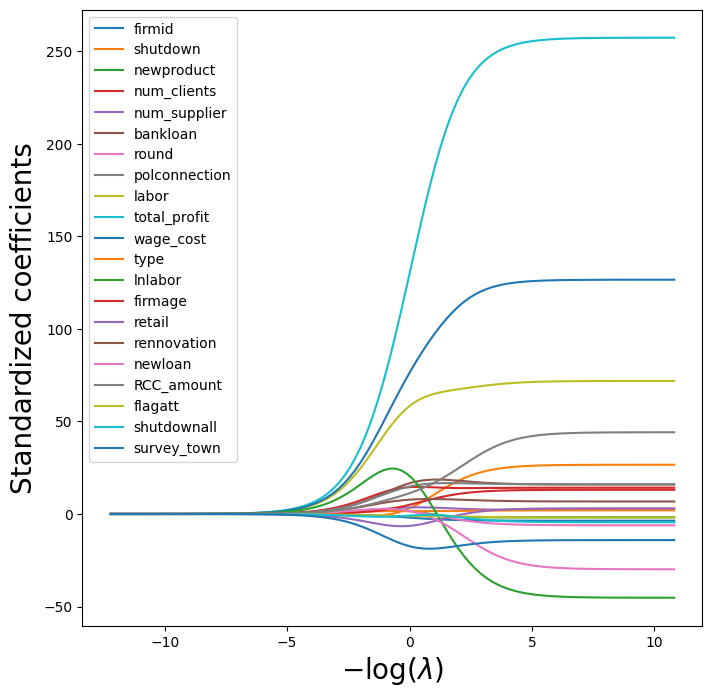

In [ ]:
path_fig, ax = subplots(figsize=(8,8))
soln_path.plot(ax=ax, legend=False)
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Standardized coefficients', fontsize=20)
ax.legend(loc='upper left');

In [ ]:
path_fig.savefig('ridge_plot.png', bbox_inches='tight')

In [ ]:
beta_hat = soln_path.loc[soln_path.index[39]]
lambdas[39], beta_hat

(23.134587076897162,
 firmid           -0.182107
 shutdown         -0.526137
 newproduct        0.873858
 num_clients       3.093139
 num_supplier      0.661356
 bankloan          2.365858
 round             0.741792
 polconnection     2.409640
 labor            10.044903
 total_profit     13.316278
 wage_cost        11.019170
 type              0.521937
 lnlabor           6.881277
 firmage           0.304562
 retail           -1.480539
 rennovation       1.578075
 newloan           0.991465
 RCC_amount        1.662409
 flagatt          -0.274479
 shutdownall      -0.583311
 survey_town      -2.537642
 Name: -3.141328773783735, dtype: float64)

In [ ]:
np.linalg.norm(beta_hat)

22.038129259173374

In [ ]:
beta_hat = soln_path.loc[soln_path.index[59]]
lambdas[59], np.linalg.norm(beta_hat)

(0.22083084389761015, 247.10605048797467)

In [ ]:
ridge = skl.ElasticNet(alpha=lambdas[59], l1_ratio=0)
scaler = StandardScaler(with_mean=True,  with_std=True)
pipe = Pipeline(steps=[('scaler', scaler), ('ridge', ridge)])
pipe.fit(X, Y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.397e+08, tolerance: 2.127e+05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge', ElasticNet(alpha=0.22083084389761015, l1_ratio=0))])

In [ ]:
np.linalg.norm(ridge.coef_)

247.10605048797478

In [ ]:
validation = skm.ShuffleSplit(n_splits=1,
                              test_size=0.5,
                              random_state=0)
ridge.alpha = 0.01
results = skm.cross_validate(ridge,
                             X,
                             Y,
                             scoring='neg_mean_squared_error',
                             cv=validation)
-results['test_score']


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.230e+08, tolerance: 1.022e+05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


array([116548.26829111])

In [ ]:
ridge.alpha = 1e10
results = skm.cross_validate(ridge,
                             X,
                             Y,
                             scoring='neg_mean_squared_error',
                             cv=validation)
-results['test_score']


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.110e+08, tolerance: 1.022e+05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


array([256643.25194353])

In [ ]:
param_grid = {'ridge__alpha': lambdas}
grid = skm.GridSearchCV(pipe,
                        param_grid,
                        cv=validation,
                        scoring='neg_mean_squared_error')
grid.fit(X, Y)
grid.best_params_['ridge__alpha']
grid.best_estimator_


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.110e+08, tolerance: 1.022e+05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.110e+08, tolerance: 1.022e+05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge', ElasticNet(alpha=0.04334999233537056, l1_ratio=0))])

In [ ]:
K = 5
kfold = skm.KFold(K,
                  random_state=0,
                  shuffle=True)

In [ ]:
grid = skm.GridSearchCV(pipe,
                        param_grid,
                        cv=kfold,
                        scoring='neg_mean_squared_error')
grid.fit(X, Y)
grid.best_params_['ridge__alpha']
grid.best_estimator_


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.758e+08, tolerance: 1.752e+05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.435e+08, tolerance: 1.687e+05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge', ElasticNet(alpha=0.0547014862092466, l1_ratio=0))])

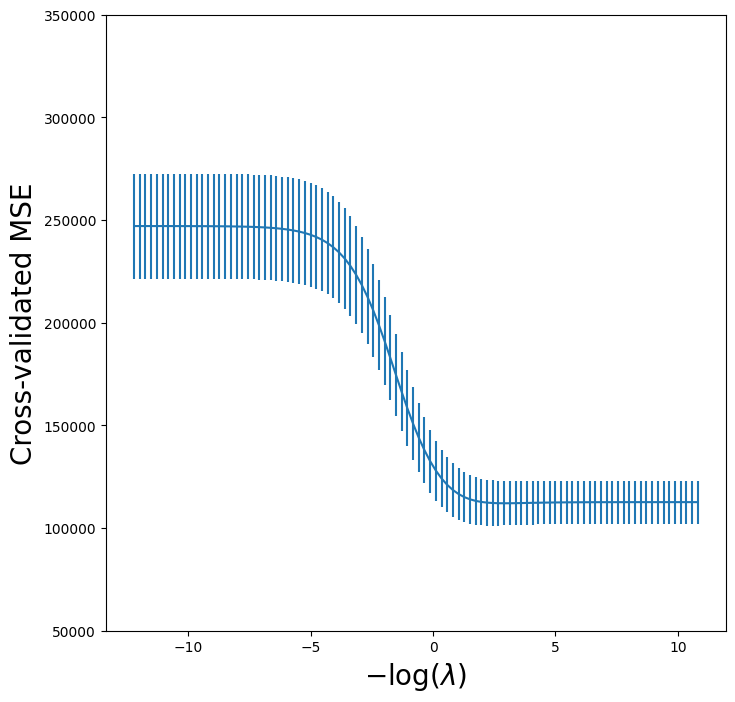

In [ ]:
ridge_fig, ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(lambdas),
            -grid.cv_results_['mean_test_score'],
            yerr=grid.cv_results_['std_test_score'] / np.sqrt(K))
ax.set_ylim([50000,350000])
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated MSE', fontsize=20);


In [ ]:
grid_r2 = skm.GridSearchCV(pipe,
                           param_grid,
                           cv=kfold)
grid_r2.fit(X, Y)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.758e+08, tolerance: 1.752e+05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.435e+08, tolerance: 1.687e+05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('ridge',
                                        ElasticNet(alpha=10000000000.0,
                                                   l1_ratio=0))]),
             param_grid={'ridge__alpha': array([2.01212840e+05, 1.59457735e+05, 1.26367528e+05, 1.00144105e+05,
       7.93624904e+04, 6.28934164e+04, 4.98419569e+04, 3.94988985e+04,
       3.13022016e+04, 2.48064594...
       4.23533742e-03, 3.35643247e-03, 2.65991533e-03, 2.10793741e-03,
       1.67050435e-03, 1.32384613e-03, 1.04912542e-03, 8.31413951e-04,
       6.58881338e-04, 5.22152192e-04, 4.13796683e-04, 3.27926795e-04,
       2.59876377e-04, 2.05947584e-04, 1.63209938e-04, 1.29341085e-04,
       1.02500598e-04, 8.12299709e-05, 6.43733628e-05, 5.10147891e-05,
       4.04283479e-05, 3.20387744e-05, 2.53901808e-05, 2.01212840e-05])})

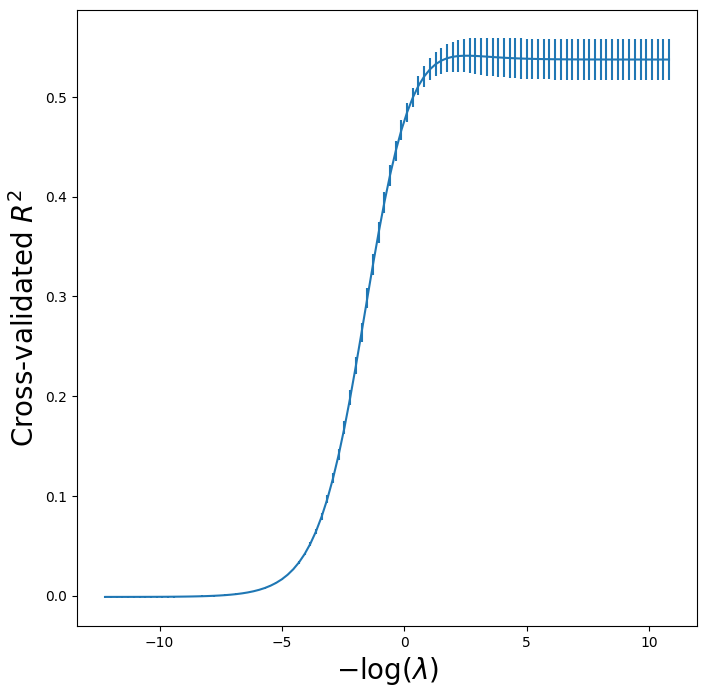

In [ ]:
r2_fig, ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(lambdas),
            grid_r2.cv_results_['mean_test_score'],
            yerr=grid_r2.cv_results_['std_test_score'] / np.sqrt(K))
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated $R^2$', fontsize=20);


In [ ]:
ridgeCV = skl.ElasticNetCV(alphas=lambdas,
                           l1_ratio=0,
                           cv=kfold)
pipeCV = Pipeline(steps=[('scaler', scaler),
                         ('ridge', ridgeCV)])
pipeCV.fit(X, Y)


In [ ]:
tuned_ridge = pipeCV.named_steps['ridge']
ridgeCV_fig, ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(lambdas),
            tuned_ridge.mse_path_.mean(1),
            yerr=tuned_ridge.mse_path_.std(1) / np.sqrt(K))
ax.axvline(-np.log(tuned_ridge.alpha_), c='k', ls='--')
ax.set_ylim([50000,275000])
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated MSE', fontsize=20);


In [ ]:
ridgeCV_fig.savefig('RidgeCV_plot.png', bbox_inches='tight')

In [ ]:
np.min(tuned_ridge.mse_path_.mean(1))


In [ ]:
tuned_ridge.coef_


##Lasso

In [ ]:
lassoCV = skl.ElasticNetCV(n_alphas=100,
                           l1_ratio=1,
                           cv=kfold)
pipeCV = Pipeline(steps=[('scaler', scaler),
                         ('lasso', lassoCV)])
pipeCV.fit(X, Y)
tuned_lasso = pipeCV.named_steps['lasso']
tuned_lasso.alpha_


In [ ]:
lambdas, soln_array = skl.Lasso.path(Xs,
                                    Y,
                                    l1_ratio=1,
                                    n_alphas=100)[:2]
soln_path = pd.DataFrame(soln_array.T,
                         columns=D.columns,
                         index=-np.log(lambdas))


In [ ]:
path_fig, ax = subplots(figsize=(8,8))
soln_path.plot(ax=ax, legend=False)
ax.legend(loc='upper left')
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Standardized coefficiients', fontsize=20);


In [ ]:
np.min(tuned_lasso.mse_path_.mean(1))


In [ ]:
lassoCV_fig, ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(tuned_lasso.alphas_),
            tuned_lasso.mse_path_.mean(1),
            yerr=tuned_lasso.mse_path_.std(1) / np.sqrt(K))
ax.axvline(-np.log(tuned_lasso.alpha_), c='k', ls='--')
ax.set_ylim([50000,275000])
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated MSE', fontsize=20);

In [ ]:
lassoCV_fig.savefig('lassoCV_plot.png', bbox_inches='tight')

In [ ]:
tuned_lasso.coef_


## Regression Trees

In [ ]:
model = MS(df_cleaned2.columns.drop('part5revenue'), intercept=False)
D = model.fit_transform(df_cleaned2)
feature_names = list(D.columns)
X = np.asarray(D) #array of all X's, keep all feature names


In [ ]:
(X_train,
 X_test,
 y_train,
 y_test) = skm.train_test_split(X,
                                df_cleaned2['part5revenue'],
                                test_size=0.3,
                                random_state=0)


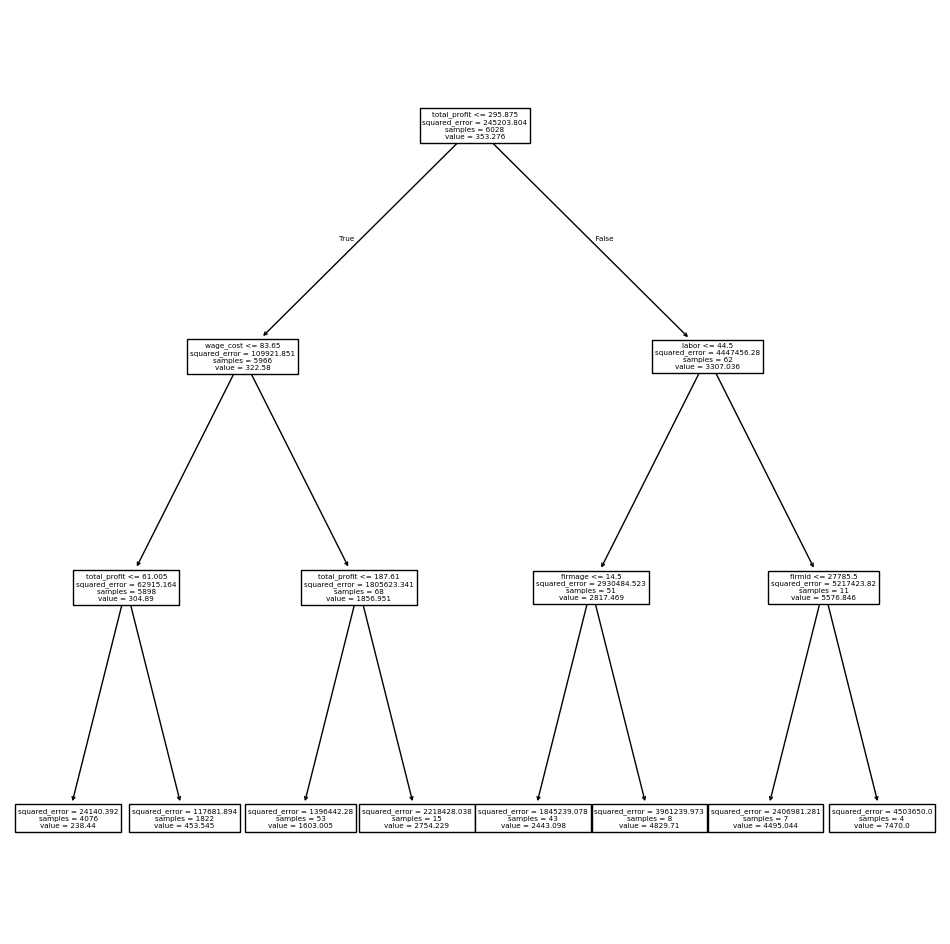

In [ ]:
reg = DTR(max_depth=3)
reg.fit(X_train, y_train)
ax = subplots(figsize=(12,12))[1]
plot_tree(reg,
          feature_names=feature_names,
          ax=ax);


Cross Validation & Pruning

In [ ]:
ccp_path = reg.cost_complexity_pruning_path(X_train, y_train)
kfold = skm.KFold(5,
                  shuffle=True,
                  random_state=10)
grid = skm.GridSearchCV(reg,
                        {'ccp_alpha': ccp_path.ccp_alphas},
                        refit=True,
                        cv=kfold,
                        scoring='neg_mean_squared_error')
G = grid.fit(X_train, y_train)


In [ ]:
best_ = grid.best_estimator_
RTreeMSE= np.mean((y_test - best_.predict(X_test))**2)
RTreeMSE


128609.32346806521

In [ ]:
(np.mean((y_test - best_.predict(X_test))**2))**0.5

358.6214208159702

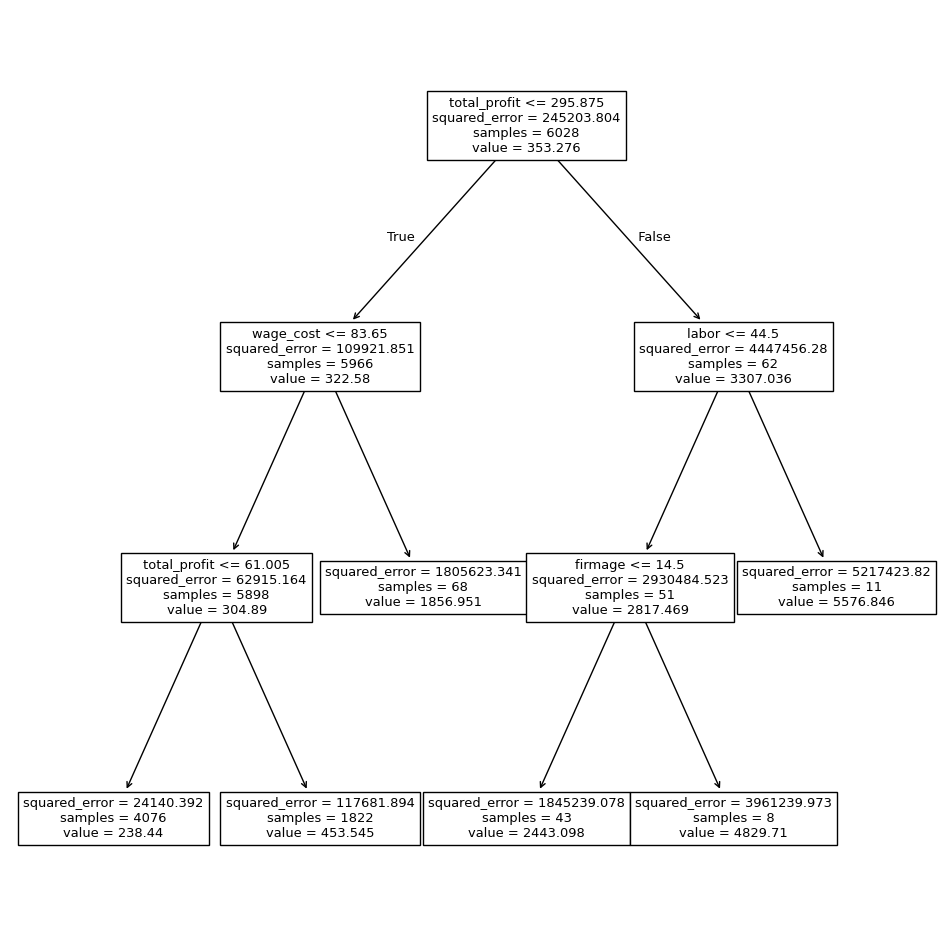

In [ ]:
ax = subplots(figsize=(12,12))[1]
plot_tree(G.best_estimator_,
          feature_names=feature_names,
          ax=ax);


In [ ]:
fig = ax.get_figure()
fig.savefig('tree_plot.png', format='png', dpi=300)

##Bagging + RF's

In [ ]:
bag_ch = RF(max_features=X_train.shape[1], random_state=0)
bag_ch.fit(X_train, y_train)
#using all features and X's; RF uses subset

RandomForestRegressor(max_features=21, random_state=0)

87388.69887350652

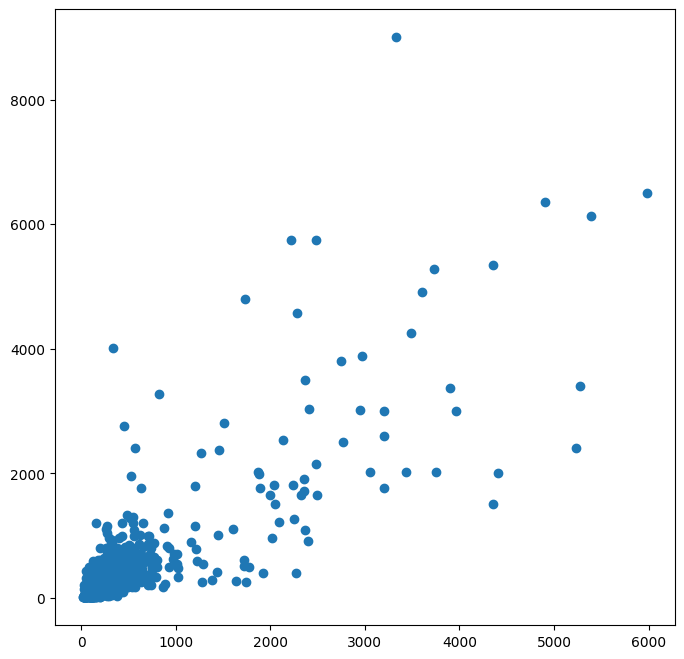

In [ ]:
ax = subplots(figsize=(8,8))[1]
y_hat_bag = bag_ch.predict(X_test)
ax.scatter(y_hat_bag, y_test)
np.mean((y_test - y_hat_bag)**2)


In [ ]:
bag_ch = RF(max_features=X_train.shape[1],
                n_estimators=500, #default is 100
                random_state=0).fit(X_train, y_train)
y_hat_bag = bag_ch.predict(X_test)
np.mean((y_test - y_hat_bag)**2)

87332.51500117862

In [ ]:
RF_ch = RF(max_features=6, #random forest as only choose 6 - subset
               random_state=0).fit(X_train, y_train)
y_hat_RF = RF_ch.predict(X_test)
np.mean((y_test - y_hat_RF)**2)


78286.62513985792

In [ ]:
feature_imp = pd.DataFrame(
    {'importance':RF_ch.feature_importances_}, #include in rep
    index=feature_names)
feature_imp.sort_values(by='importance', ascending=False)

importance
total_profit     0.315622
wage_cost        0.162220
lnlabor          0.126378
labor            0.106248
num_clients      0.047275
firmage          0.039560
firmid           0.038520
survey_town      0.036449
RCC_amount       0.032333
num_supplier     0.027330
round            0.013633
polconnection    0.009560
retail           0.008824
type             0.007768
rennovation      0.006946
bankloan         0.006918
newproduct       0.004805
newloan          0.004761
shutdownall      0.003358
flagatt          0.000783
shutdown         0.000711

In [ ]:
feature_imp.sort_values(by='importance', ascending=False).to_latex(caption='Feature Importances of Random Forest', label='tab:feature_importances', float_format="%.6f")


'\\begin{table}\n\\caption{Feature Importances of Random Forest}\n\\label{tab:feature_importances}\n\\begin{tabular}{lr}\n\\toprule\n & importance \\\\\n\\midrule\ntotal_profit & 0.315622 \\\\\nwage_cost & 0.162220 \\\\\nlnlabor & 0.126378 \\\\\nlabor & 0.106248 \\\\\nnum_clients & 0.047275 \\\\\nfirmage & 0.039560 \\\\\nfirmid & 0.038520 \\\\\nsurvey_town & 0.036449 \\\\\nRCC_amount & 0.032333 \\\\\nnum_supplier & 0.027330 \\\\\nround & 0.013633 \\\\\npolconnection & 0.009560 \\\\\nretail & 0.008824 \\\\\ntype & 0.007768 \\\\\nrennovation & 0.006946 \\\\\nbankloan & 0.006918 \\\\\nnewproduct & 0.004805 \\\\\nnewloan & 0.004761 \\\\\nshutdownall & 0.003358 \\\\\nflagatt & 0.000783 \\\\\nshutdown & 0.000711 \\\\\n\\bottomrule\n\\end{tabular}\n\\end{table}\n'

## Boosting

In [ ]:
boost_china = GBR(n_estimators=5000, #use GBE, specifying learning rate that minimizes error, error is MSE
                   learning_rate=0.001,
                   max_depth=3,
                   random_state=0)
boost_china.fit(X_train, y_train)


GradientBoostingRegressor(learning_rate=0.001, n_estimators=5000,
                          random_state=0)

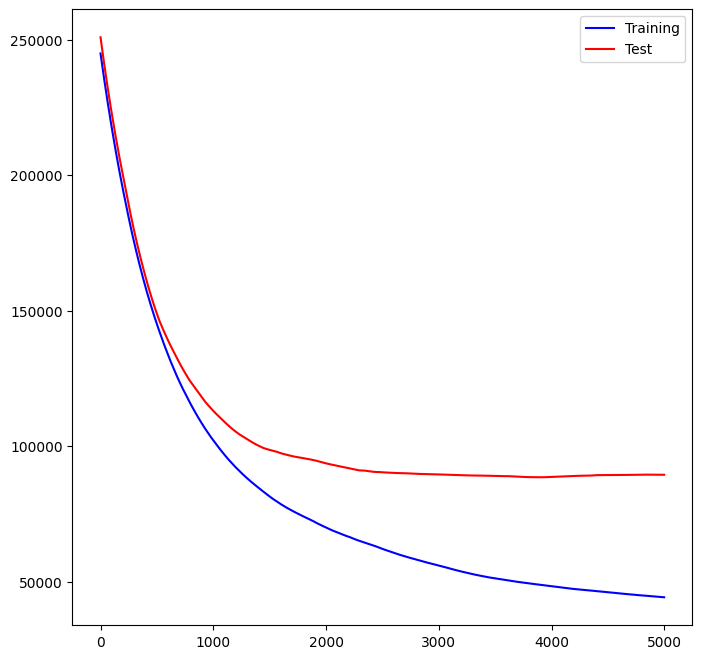

In [ ]:
test_error = np.zeros_like(boost_china.train_score_)
for idx, y_ in enumerate(boost_china.staged_predict(X_test)):
   test_error[idx] = np.mean((y_test - y_)**2)

plot_idx = np.arange(boost_china.train_score_.shape[0])
ax = subplots(figsize=(8,8))[1]
ax.plot(plot_idx,
        boost_china.train_score_,
        'b',
        label='Training')
ax.plot(plot_idx,
        test_error,
        'r',
        label='Test')
ax.legend();


In [ ]:
y_hat_boost = boost_china.predict(X_test);
np.mean((y_test - y_hat_boost)**2)


89443.06468810109

In [ ]:
boost_china = GBR(n_estimators=5000,
                   learning_rate=0.2,
                   max_depth=3,
                   random_state=0)
boost_china.fit(X_train,
                 y_train)
y_hat_boost = boost_china.predict(X_test);
np.mean((y_test - y_hat_boost)**2)


81934.85992440957

In [ ]:
!pip install -q xgboost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_predict

# Convert the data into XGBoost's DMatrix format
dtrain = xgb.DMatrix(X, label=y)

# Define the parameters for the XGBoost model
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'eta': 0.1,
    'max_depth': 5,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

# Train the XGBoost model with the optimal number of boosting rounds
model = xgb.train(params, dtrain, num_boost_round= 10)

# Make predictions
y_pred = model.predict(dtrain)

# Calculate and print the Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)


plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, c='grey', alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('True Y')
plt.ylabel('Predicted Y')
plt.title('Y vs Predicted Y (Y hat)')
plt.show()

##DAG

In [26]:
df_fe = df.reset_index()
df_fe['loanuse'] = 0
df_fe.loc[(df_fe['type'] == 1) & (df_fe['newloan'] == 1) & (df_fe['round'] > 1), 'loanuse'] = 1
df_fe.loc[(df_fe['type'] == 0) & (df_fe['newloan'] == 1) & (df_fe['survey_town_type'] != 0) & (df_fe['round'] > 2), 'loanuse'] = 1


In [27]:
# Step 2: Create loanusesum by grouping by town, industry, and round
df_fe['loanusesum'] = df_fe.groupby(['survey_town', 'industry', 'round'])['loanuse'].transform('sum')

# Step 3: Create indsize (number of firms in each town, industry, and round group)
df_fe['indsize'] = df_fe.groupby(['survey_town', 'industry', 'round'])['firmid'].transform('count')

# Step 4: Create comploanuse (share of competitors borrowing)
df_fe['comploanuse'] = (df_fe['loanusesum'] - df_fe['loanuse']) / (df_fe['indsize'] - 1)

# Handle cases where indsize == 1 (to avoid division by zero)
df_fe.loc[df_fe['indsize'] == 1, 'comploanuse'] = 0

# Handle missing values
df_fe['comploanuse'].fillna(0, inplace=True)

# Now you can check the created comploanuse variable
print(df_fe[['firmid', 'loanuse', 'loanusesum', 'comploanuse']].head())

   firmid  loanuse  loanusesum  comploanuse
0   111.0        0         0.0     0.000000
1   111.0        0         7.0     0.200000
2   111.0        0        10.0     0.285714
3   112.0        0         0.0     0.000000
4   112.0        0         1.0     0.200000


<ipython-input-27-a4da4b9899ce>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fe['comploanuse'].fillna(0, inplace=True)


In [ ]:
!pip install dowhy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.4/383.4 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.5/174.5 kB 16.4 MB/s eta 0:00:00


In [ ]:
from dowhy import CausalModel

In [ ]:
df_fe.head()

firmid  shutdown  newproduct  gender   age  \
survey_town round                                               
9.0         1.0     111.0       0.0         0.0     1.0  38.0   
            2.0     111.0       0.0         0.0     0.0  39.0   
            3.0     111.0       0.0         0.0     0.0  41.0   
            1.0     112.0       0.0         0.0     0.0  22.0   
            2.0     112.0       0.0         1.0     0.0  24.0   

                   education_college  num_clients  num_supplier  bankloan  \
survey_town round                                                           
9.0         1.0                  0.0         34.0          15.0       0.0   
            2.0                  0.0         50.0          12.0       0.0   
            3.0                  0.0         17.0          13.0       0.0   
            1.0                  0.0         12.0           3.0       1.0   
            2.0                  0.0         12.0           2.0       0.0   

                   polconnection  ...   indsalessum  marketshare  \
survey_town round                 ...                              
9.0         1.0              0.0  ...  11503.500000     0.019603   
            2.0              NaN  ...  13403.729492     0.023087   
            3.0              NaN  ...  12727.082031     0.002167   
            1.0              0.0  ...   1845.000000     0.021680   
            2.0              NaN  ...   1768.178589     0.021749   

                   marketshare2      herf    invherf  interpost  inter4post  \
survey_town round                                                             
9.0         1.0        0.000384  0.015637  63.951118        0.0    0.000000   
            2.0        0.000533  0.016157  61.892632        1.0    0.771429   
            3.0        0.000005  0.018490  54.083206        1.0    0.771429   
            1.0        0.000470  0.160916   6.214418        0.0    0.000000   
            2.0        0.000473  0.181971   5.495395        1.0    0.800000   

                   interpost_comp1  interpost_comp2  survey_town_copy  
survey_town round                                                      
9.0         1.0           0.000000              0.0               9.0  
            2.0           0.771429              0.0               9.0  
            3.0           0.771429              0.0               9.0  
            1.0           0.000000              0.0               9.0  
            2.0           0.800000              0.0               9.0  

[5 rows x 101 columns]

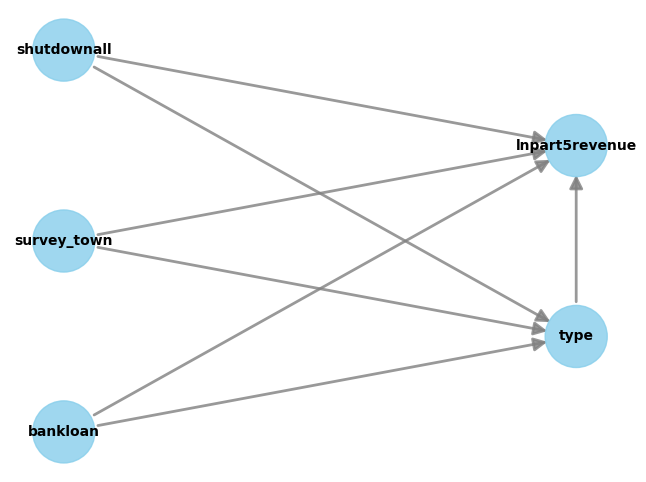

In [ ]:
model = CausalModel(data = df_fe, treatment='type', outcome='lnpart5revenue', common_causes = ['bankloan', 'shutdownall', 'survey_town'], instruments = None, effect_modifiers = None)
model.view_model()

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

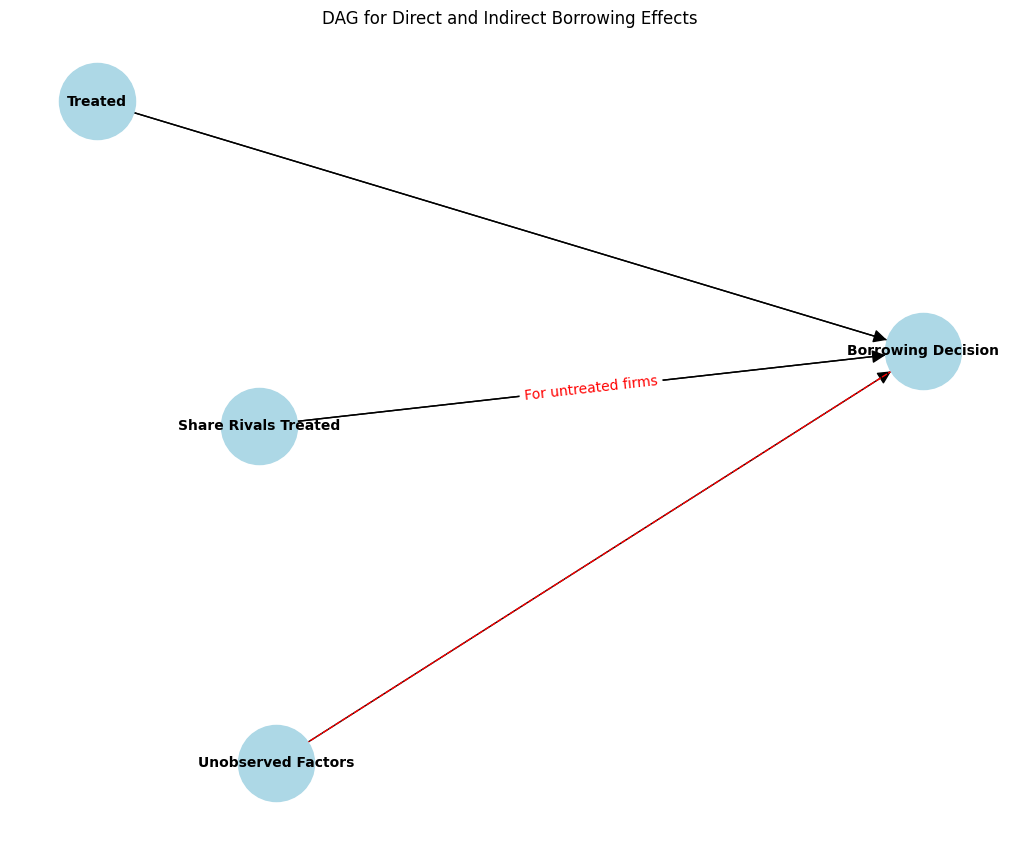

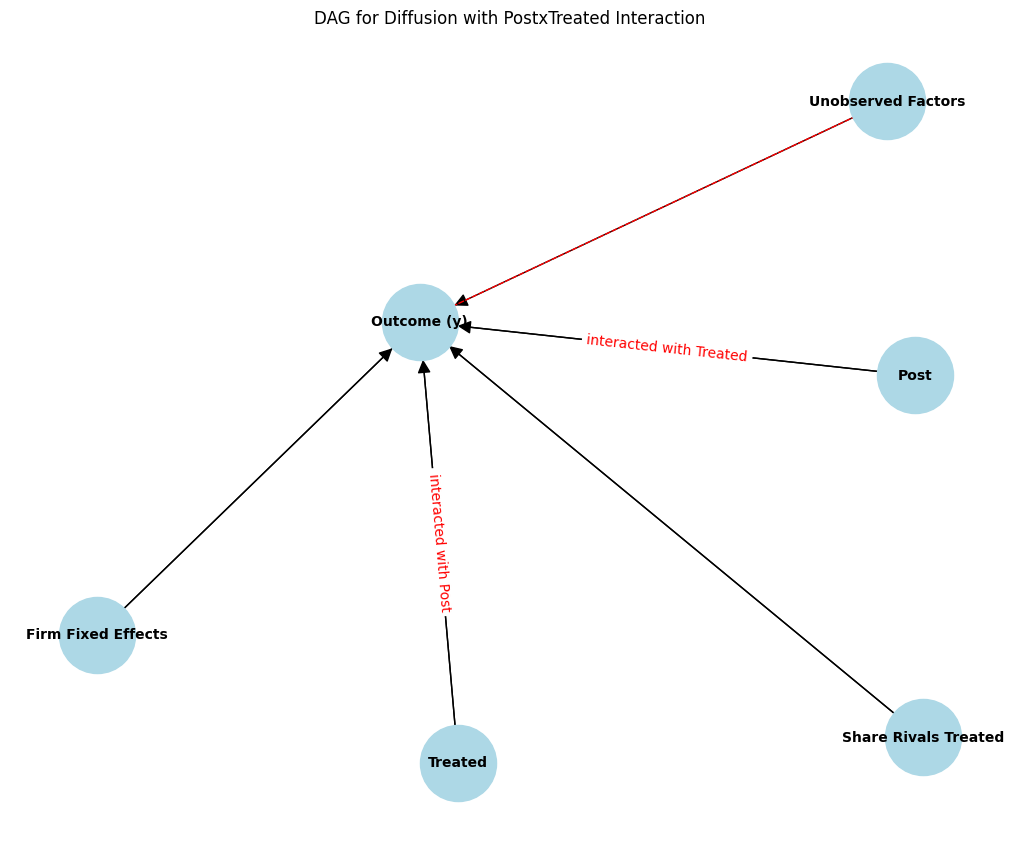

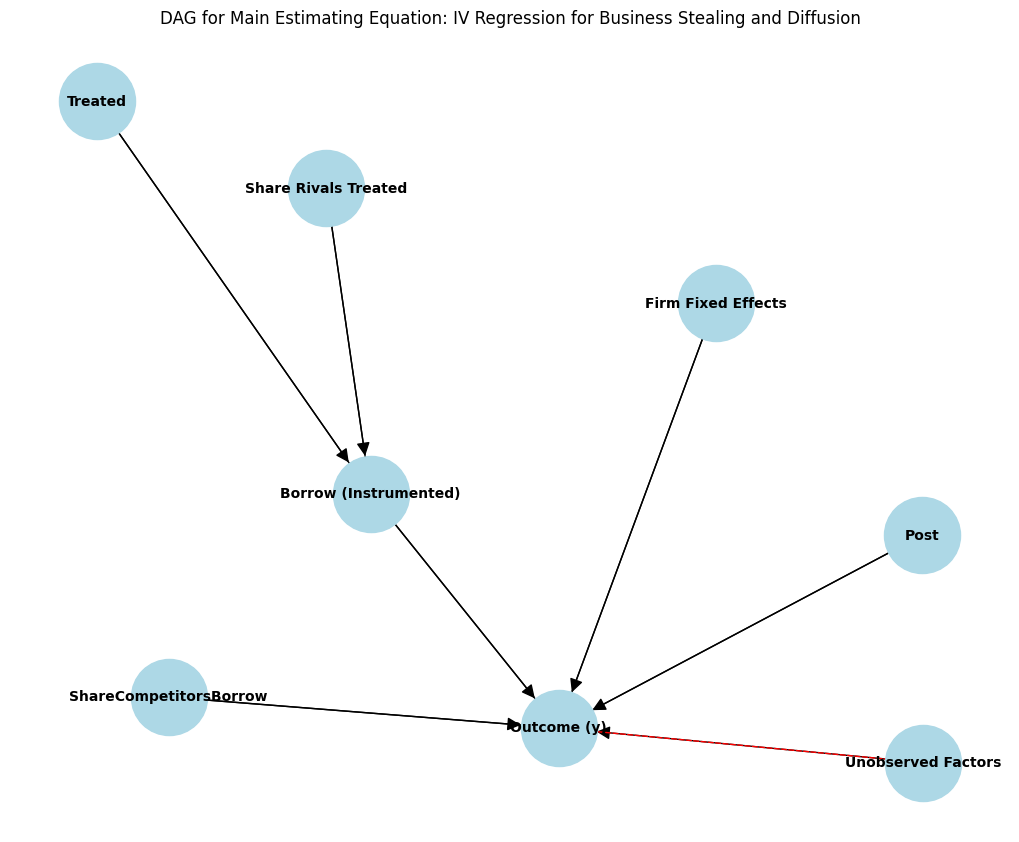

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Function to create a DAG for a given set of nodes and edges, allowing for dashed arrows
def create_dag(nodes, edges, title, filename):
    G = nx.DiGraph()
    G.add_nodes_from(nodes)

    # Add edges to the graph
    for edge in edges:
        u, v, label, is_dashed = edge
        if label:
            G.add_edge(u, v, label=label, style='dashed' if is_dashed else 'solid')
        else:
            G.add_edge(u, v, style='dashed' if is_dashed else 'solid')

    # Draw the graph
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=3000, font_size=10, font_weight='bold', arrowsize=20)

    # Draw dashed edges separately
    dashed_edges = [(u, v) for u, v, d in G.edges(data=True) if d['style'] == 'dashed']
    nx.draw_networkx_edges(G, pos, edgelist=dashed_edges, style='dashed', edge_color='red')

    # Draw solid edges separately
    solid_edges = [(u, v) for u, v, d in G.edges(data=True) if d['style'] == 'solid']
    nx.draw_networkx_edges(G, pos, edgelist=solid_edges, style='solid', edge_color='black')

    # Draw edge labels if they exist
    edge_labels = {(u, v): G[u][v].get('label', '') for u, v in G.edges if G[u][v].get('label', '')}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

    plt.title(title)

    # Save the plot as a PNG file
    plt.savefig(f"{filename}.png", format='png')
    plt.show()

# DAG for Equation (7)
nodes_eq7 = ['Treated', 'Share Rivals Treated', 'Borrowing Decision', 'Unobserved Factors']
edges_eq7 = [('Treated', 'Borrowing Decision', None, False),
             ('Share Rivals Treated', 'Borrowing Decision', 'For untreated firms', False),
             ('Unobserved Factors', 'Borrowing Decision', None, True)]  # Dashed arrow for unobserved factors
create_dag(nodes_eq7, edges_eq7, 'DAG for Direct and Indirect Borrowing Effects', 'dag_equation_7')

# DAG for Equation (8)
nodes_eq8 = ['Treated', 'Post', 'Share Rivals Treated', 'Firm Fixed Effects', 'Outcome (y)', 'Unobserved Factors']
edges_eq8 = [('Treated', 'Outcome (y)', 'interacted with Post', False),
             ('Post', 'Outcome (y)', 'interacted with Treated', False),
             ('Share Rivals Treated', 'Outcome (y)', None, False),
             ('Firm Fixed Effects', 'Outcome (y)', None, False),
             ('Unobserved Factors', 'Outcome (y)', None, True)]  # Dashed arrow for unobserved factors
create_dag(nodes_eq8, edges_eq8, 'DAG for Diffusion with PostxTreated Interaction', 'dag_equation_8')

# DAG for Equation (9)
nodes_eq9 = ['Share Rivals Treated', 'Treated', 'Borrow (Instrumented)', 'ShareCompetitorsBorrow', 'Post', 'Firm Fixed Effects', 'Outcome (y)', 'Unobserved Factors']
edges_eq9 = [('Share Rivals Treated', 'Borrow (Instrumented)', None, False),
             ('Treated', 'Borrow (Instrumented)', None, False),
             ('Borrow (Instrumented)', 'Outcome (y)', None, False),
             ('ShareCompetitorsBorrow', 'Outcome (y)', None, False),
             ('Post', 'Outcome (y)', None, False),
             ('Firm Fixed Effects', 'Outcome (y)', None, False),
             ('Unobserved Factors', 'Outcome (y)', None, True)]  # Dashed arrow for unobserved factors
create_dag(nodes_eq9, edges_eq9, 'DAG for Main Estimating Equation: IV Regression for Business Stealing and Diffusion', 'dag_equation_9')


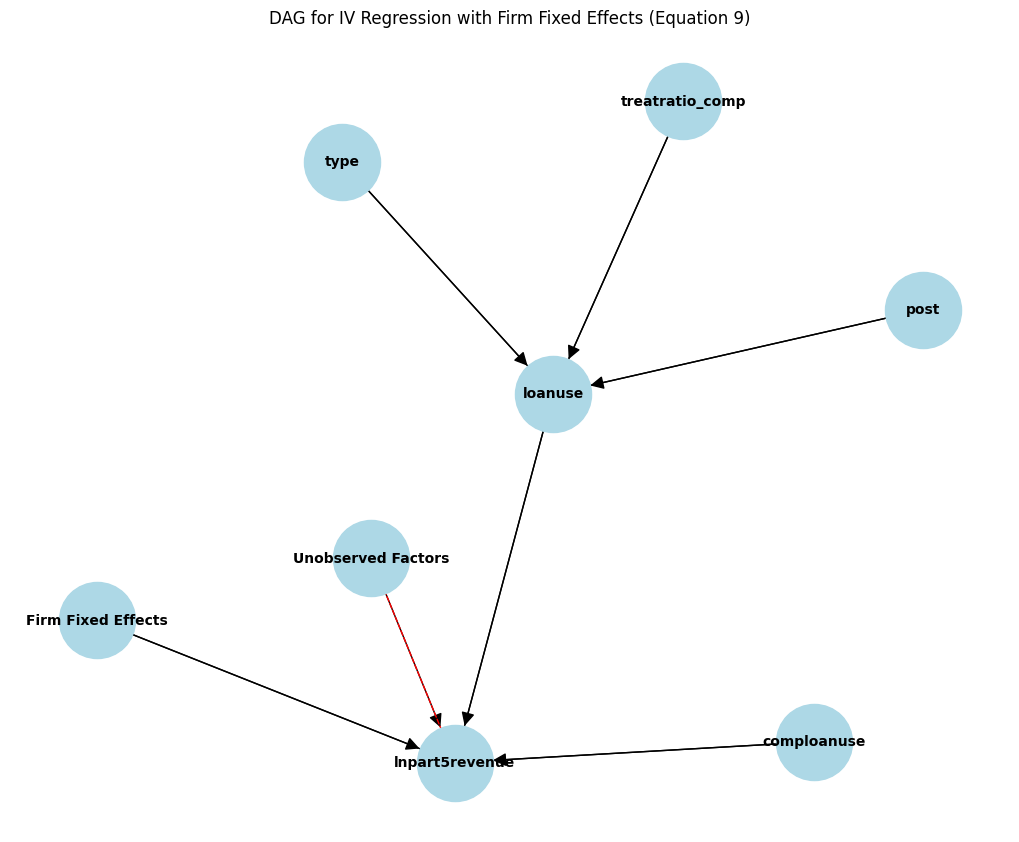

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Function to create and save a DAG in .dot format
def create_dag(nodes, edges, title, filename):
    G = nx.DiGraph()
    G.add_nodes_from(nodes)

    # Add edges to the graph
    for edge in edges:
        u, v, label, is_dashed = edge
        if label:
            G.add_edge(u, v, label=label, style='dashed' if is_dashed else 'solid')
        else:
            G.add_edge(u, v, style='dashed' if is_dashed else 'solid')

    # Draw the graph
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=3000, font_size=10, font_weight='bold', arrowsize=20)

    # Draw dashed edges separately
    dashed_edges = [(u, v) for u, v, d in G.edges(data=True) if d['style'] == 'dashed']
    nx.draw_networkx_edges(G, pos, edgelist=dashed_edges, style='dashed', edge_color='red')

    # Draw solid edges separately
    solid_edges = [(u, v) for u, v, d in G.edges(data=True) if d['style'] == 'solid']
    nx.draw_networkx_edges(G, pos, edgelist=solid_edges, style='solid', edge_color='black')

    # Draw edge labels if they exist
    edge_labels = {(u, v): G[u][v].get('label', '') for u, v in G.edges if G[u][v].get('label', '')}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

    plt.title(title)

    # Save the plot as a PNG file for visualization
    plt.savefig(f"{filename}.png", format='png')
    plt.show()

    # Save the DAG as a .dot file for causal inference
    nx.drawing.nx_pydot.write_dot(G, f"{filename}.dot")

# DAG for Equation (9) with correct variable names and Firm Fixed Effects
nodes_eq9 = ['type', 'post', 'treatratio_comp', 'loanuse', 'comploanuse', 'lnpart5revenue', 'Firm Fixed Effects', 'Unobserved Factors']
edges_eq9 = [
    ('type', 'loanuse', None, False),
    ('post', 'loanuse', None, False),
    ('treatratio_comp', 'loanuse', None, False),
    ('loanuse', 'lnpart5revenue', None, False),
    ('comploanuse', 'lnpart5revenue', None, False),
    ('Firm Fixed Effects', 'lnpart5revenue', None, False),  # Include Firm Fixed Effects
    ('Unobserved Factors', 'lnpart5revenue', None, True)  # Dashed arrow for unobserved factors
]

create_dag(nodes_eq9, edges_eq9, 'DAG for IV Regression with Firm Fixed Effects (Equation 9)', 'dag_equation_9_with_firm_fe')


In [ ]:
model = CausalModel(
    data=df_fe,  # Use your cleaned dataset
    treatment='loanuse',  # Treatment variable (taking a loan)
    outcome='lnpart5revenue',  # Outcome variable (log revenue)
    graph='dag_equation_9_with_firm_fe.dot'  # The updated DAG file
)

# Step 2: Identify the Estimand(s)
estimand = model.identify_effect()

# Step 3: Obtain Estimates
estimate = model.estimate_effect(
    identified_estimand=estimand,
    method_name='iv.instrumental_variable',
    control_value=0,
    treatment_value=1
)

ERROR:dowhy.causal_graph:Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot...


In [ ]:
refute = model.refute_estimate(
    estimand=estimand,
    estimate=estimate,
    method_name='random_common_cause'
)

In [ ]:
print(estimand)
print(estimate)
print(refute)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                        
──────────(E[lnpart5revenue])
d[loanuse]                   
Estimand assumption 1, Unconfoundedness: If U→{loanuse} and U→lnpart5revenue then P(lnpart5revenue|loanuse,,U) = P(lnpart5revenue|loanuse,)

### Estimand : 2
Estimand name: iv
Estimand expression:
 ⎡                                                                                          -1⎤
 ⎢              d                                ⎛              d                          ⎞  ⎥
E⎢──────────────────────────────(lnpart5revenue)⋅⎜──────────────────────────────([loanuse])⎟  ⎥
 ⎣d[post  treatratio_comp  type]                 ⎝d[post  treatratio_comp  type]           ⎠  ⎦
Estimand assumption 1, As-if-random: If U→→lnpart5revenue then ¬(U →→{post,treatratio_comp,type})
Estimand assumption 2, Exclusion: If we remove {post,treatratio_comp,type}→{loanuse}, then ¬({post,treatratio_comp,type}→l

##IV

In [28]:
df_fe = df_fe.reset_index()
df_fe['midline'] = 0
df_fe['midline'] = df_fe['midline'].mask(df_fe['round'] == 2, 1)  # Sets midline to 1 if round is 2

df_fe['endline'] = 0
df_fe['endline'] = df_fe['endline'].mask(df_fe['round'] == 3, 1)  # Sets endline to 1 if round is 3__fe

In [32]:
df_fe['retail'].isna().sum()

907

In [30]:
# First-stage regression for loanuse
X_first_stage_loanuse = df_fe[['interpost', 'inter4post', 'midline', 'endline']]
X_first_stage_loanuse = sm.add_constant(X_first_stage_loanuse)
y_first_stage_loanuse = df_fe['loanuse']
model_first_stage_loanuse = sm.OLS(y_first_stage_loanuse, X_first_stage_loanuse).fit(cov_type='cluster', cov_kwds={'groups': df_fe['survey_town']})

# First-stage regression for comploanuse
X_first_stage_comploanuse = df_fe[['interpost', 'inter4post', 'midline', 'endline']]
X_first_stage_comploanuse = sm.add_constant(X_first_stage_comploanuse)
y_first_stage_comploanuse = df_fe['comploanuse']
model_first_stage_comploanuse = sm.OLS(y_first_stage_comploanuse, X_first_stage_comploanuse).fit(cov_type='cluster', cov_kwds={'groups': df_fe['survey_town']})

# Print the results
print("First-Stage Regression for Loan Use:")
print(model_first_stage_loanuse.summary())
print("\nFirst-Stage Regression for Competitors Loan Use:")
print(model_first_stage_comploanuse.summary())


First-Stage Regression for Loan Use:
                            OLS Regression Results                            
Dep. Variable:                loanuse   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     31.99
Date:                Sun, 03 Nov 2024   Prob (F-statistic):           1.07e-15
Time:                        21:12:04   Log-Likelihood:                -1231.8
No. Observations:                9519   AIC:                             2474.
Df Residuals:                    9514   BIC:                             2509.
Df Model:                           4                                         
Covariance Type:              cluster                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.3

In [ ]:
# Extract F-statistics for interpost and inter4post
f_stat_loanuse = model_first_stage_loanuse.fvalue
f_stat_comploanuse = model_first_stage_comploanuse.fvalue

print(f"F-statistic for loanuse: {f_stat_loanuse}")
print(f"F-statistic for comploanuse: {f_stat_comploanuse}")


F-statistic for loanuse: 31.989088417415903
F-statistic for comploanuse: 32.66159362332833


In [ ]:
from linearmodels.iv import IV2SLS
outcome_variables = ['lnpart5revenue', 'total_profit', 'lnlabor']

# Iterate over each outcome variable and perform the IV regression
for outcome_var in outcome_variables:
# Define dependent, exogenous, endogenous, and instrumental variables
  y_second_stage = df_fe[outcome_var]  # Dependent variable
  X_exog = df_fe[['midline', 'endline']]    # Exogenous variables for second stage
  Z_instruments = df_fe[['interpost', 'inter4post']]  # Instruments for endogenous variables
  endog = df_fe[['loanuse', 'comploanuse']]  # Endogenous variables

# Add a constant to the exogenous variables
  X_exog = sm.add_constant(X_exog)

# Perform IV regression
  iv_model = IV2SLS(dependent=y_second_stage, exog=X_exog, endog=endog, instruments=Z_instruments).fit()

# Print the results
  print("Second-Stage IV Regression Results for lnpart5revenue:")
  print(iv_model.summary)


/usr/local/lib/python3.10/dist-packages/linearmodels/iv/model.py:557: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(
/usr/local/lib/python3.10/dist-packages/linearmodels/iv/model.py:557: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(


Second-Stage IV Regression Results for lnpart5revenue:
                          IV-2SLS Estimation Summary                          
Dep. Variable:         lnpart5revenue   R-squared:                     -0.0068
Estimator:                    IV-2SLS   Adj. R-squared:                -0.0073
No. Observations:                8612   F-statistic:                    17.801
Date:                Sun, Oct 20 2024   P-value (F-stat)                0.0013
Time:                        23:23:39   Distribution:                  chi2(4)
Cov. Estimator:                robust                                         
                                                                              
                              Parameter Estimates                              
             Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------
const           5.4580     0.0147     370.34     0.0000      5.4291      

/usr/local/lib/python3.10/dist-packages/linearmodels/iv/model.py:557: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(


In [33]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import linearmodels.iv.model as lm

In [ ]:
print(iv_model.wu_hausman())

Wu-Hausman test of exogeneity
H0: All endogenous variables are exogenous
Statistic: 3.9677
P-value: 0.0190
Distributed: F(2,8605)


In [ ]:
ols_model = sm.OLS.from_formula('lnpart5revenue ~ loanuse + comploanuse', data=df_fe).fit()


In [ ]:
df_fe_clean.head()

loanuse  comploanuse  interpost  inter4post  lnpart5revenue  post  \
0        0     0.000000        0.0    0.000000        6.111467   0.0   
1        0     0.200000        1.0    0.771429        6.427952   1.0   
2        0     0.285714        1.0    0.771429        4.010129   1.0   
3        0     0.000000        0.0    0.000000        4.382027   0.0   
4        0     0.200000        1.0    0.800000        4.342662   1.0   

   treatratio_comp  type  
0         0.771429   1.0  
1         0.771429   1.0  
2         0.771429   1.0  
3         0.800000   1.0  
4         0.800000   1.0

## Robustness check

In [155]:
df_fe['lnlabor'].isna().sum()
df_fe['retail'].describe()

count    8735.000000
mean        0.686205
std         0.464064
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: retail, dtype: float64

In [39]:
median_employees = df_fe['lnlabor'].median()
small_firms = df_fe[df_fe['lnlabor'] <= median_employees]
large_firms = df_fe[df_fe['lnlabor'] > median_employees]

retail_firms = df_fe[df_fe['retail'] == 1]
non_retail_firms = df_fe[df_fe['retail'] == 0]

retail_firms['lnpart5revenue'].describe()

count    5920.000000
mean        5.506883
std         0.801786
min         2.302585
25%         5.208922
50%         5.667746
75%         5.989394
max         9.159047
Name: lnpart5revenue, dtype: float64

In [ ]:
from linearmodels.iv import IV2SLS
outcome_variables = ['lnpart5revenue', 'total_profit', 'lnlabor']

for outcome_var in outcome_variables:
# Define dependent, exogenous, endogenous, and instrumental variables
  y_second_stage = small_firms[outcome_var]  # Dependent variable
  X_exog = small_firms[['midline', 'endline']]    # Exogenous variables for second stage
  Z_instruments = small_firms[['interpost', 'inter4post']]  # Instruments for endogenous variables
  endog = small_firms[['loanuse', 'comploanuse']]  # Endogenous variables

# Add a constant to the exogenous variables
  X_exog = sm.add_constant(X_exog)

# Perform IV regression
  iv_modelsmall = IV2SLS(dependent=y_second_stage, exog=X_exog, endog=endog, instruments=Z_instruments).fit()

  print(iv_modelsmall.summary)

                          IV-2SLS Estimation Summary                          
Dep. Variable:         lnpart5revenue   R-squared:                      0.0014
Estimator:                    IV-2SLS   Adj. R-squared:                 0.0005
No. Observations:                4412   F-statistic:                    12.751
Date:                Mon, Oct 21 2024   P-value (F-stat)                0.0126
Time:                        00:38:41   Distribution:                  chi2(4)
Cov. Estimator:                robust                                         
                                                                              
                              Parameter Estimates                              
             Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------
const           5.1133     0.0210     243.37     0.0000      5.0721      5.1544
midline        -0.0078     0.0356    -0.2188    

In [ ]:
for outcome_var in outcome_variables:
# Define dependent, exogenous, endogenous, and instrumental variables
  y_second_stage = large_firms[outcome_var]  # Dependent variable
  X_exog = large_firms[['midline', 'endline']]    # Exogenous variables for second stage
  Z_instruments = large_firms[['interpost', 'inter4post']]  # Instruments for endogenous variables
  endog = large_firms[['loanuse', 'comploanuse']]  # Endogenous variables

# Add a constant to the exogenous variables
  X_exog = sm.add_constant(X_exog)

# Perform IV regression
  iv_modelsmall = IV2SLS(dependent=y_second_stage, exog=X_exog, endog=endog, instruments=Z_instruments).fit()

  print(iv_modelsmall.summary)

                          IV-2SLS Estimation Summary                          
Dep. Variable:         lnpart5revenue   R-squared:                     -0.0164
Estimator:                    IV-2SLS   Adj. R-squared:                -0.0174
No. Observations:                4200   F-statistic:                    20.329
Date:                Mon, Oct 21 2024   P-value (F-stat)                0.0004
Time:                        00:39:09   Distribution:                  chi2(4)
Cov. Estimator:                robust                                         
                                                                              
                              Parameter Estimates                              
             Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------
const           5.8386     0.0155     376.57     0.0000      5.8082      5.8690
midline         0.0804     0.0301     2.6698    

In [ ]:
for outcome_var in outcome_variables:
# Define dependent, exogenous, endogenous, and instrumental variables
  y_second_stage = df_fe[df_fe['retail'] == 1.0][outcome_var]  # Dependent variable
  X_exog = df_fe[df_fe['retail'] == 1.0][['midline', 'endline']]    # Exogenous variables for second stage
  Z_instruments = df_fe[df_fe['retail'] == 1.0][['interpost', 'inter4post']]  # Instruments for endogenous variables
  endog = df_fe[df_fe['retail'] == 1.0][['loanuse', 'comploanuse']]  # Endogenous variables

# Add a constant to the exogenous variables
  X_exog = sm.add_constant(X_exog)

# Perform IV regression
  iv_modelsmall = IV2SLS(dependent=y_second_stage, exog=X_exog, endog=endog, instruments=Z_instruments).fit()

  print(iv_modelsmall.summary)

/usr/local/lib/python3.10/dist-packages/linearmodels/iv/model.py:557: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(


                          IV-2SLS Estimation Summary                          
Dep. Variable:         lnpart5revenue   R-squared:                     -0.0057
Estimator:                    IV-2SLS   Adj. R-squared:                -0.0063
No. Observations:                5920   F-statistic:                    9.2565
Date:                Mon, Oct 21 2024   P-value (F-stat)                0.0550
Time:                        01:10:36   Distribution:                  chi2(4)
Cov. Estimator:                robust                                         
                                                                              
                              Parameter Estimates                              
             Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------
const           5.4838     0.0153     357.47     0.0000      5.4537      5.5139
midline         0.0125     0.0276     0.4533    

/usr/local/lib/python3.10/dist-packages/linearmodels/iv/model.py:557: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(


                          IV-2SLS Estimation Summary                          
Dep. Variable:           total_profit   R-squared:                     -0.0223
Estimator:                    IV-2SLS   Adj. R-squared:                -0.0230
No. Observations:                5920   F-statistic:                    29.993
Date:                Mon, Oct 21 2024   P-value (F-stat)                0.0000
Time:                        01:10:36   Distribution:                  chi2(4)
Cov. Estimator:                robust                                         
                                                                              
                              Parameter Estimates                              
             Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------
const           46.959     0.9247     50.784     0.0000      45.146      48.771
midline         4.8716     1.7382     2.8027    

/usr/local/lib/python3.10/dist-packages/linearmodels/iv/model.py:557: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(


In [ ]:
for outcome_var in outcome_variables:
# Define dependent, exogenous, endogenous, and instrumental variables
  y_second_stage = df_fe[df_fe['retail'] == 0][outcome_var]  # Dependent variable
  X_exog = df_fe[df_fe['retail'] == 0][['midline', 'endline']]    # Exogenous variables for second stage
  Z_instruments = df_fe[df_fe['retail'] == 0][['interpost', 'inter4post']]  # Instruments for endogenous variables
  endog = df_fe[df_fe['retail'] == 0][['loanuse', 'comploanuse']]  # Endogenous variables

# Add a constant to the exogenous variables
  X_exog = sm.add_constant(X_exog)

# Perform IV regression
  iv_modelsmall = IV2SLS(dependent=y_second_stage, exog=X_exog, endog=endog, instruments=Z_instruments).fit()

  print(iv_modelsmall.summary)

                          IV-2SLS Estimation Summary                          
Dep. Variable:         lnpart5revenue   R-squared:                     -0.0095
Estimator:                    IV-2SLS   Adj. R-squared:                -0.0110
No. Observations:                2692   F-statistic:                    19.298
Date:                Mon, Oct 21 2024   P-value (F-stat)                0.0007
Time:                        01:10:57   Distribution:                  chi2(4)
Cov. Estimator:                robust                                         
                                                                              
                              Parameter Estimates                              
             Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------
const           5.4018     0.0327     164.98     0.0000      5.3376      5.4660
midline         0.1247     0.0564     2.2113    

/usr/local/lib/python3.10/dist-packages/linearmodels/iv/model.py:557: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(
/usr/local/lib/python3.10/dist-packages/linearmodels/iv/model.py:557: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(
/usr/local/lib/python3.10/dist-packages/linearmodels/iv/model.py:557: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(


## more DAG

In [ ]:
# Updated DAG for IV Regression
from graphviz import Digraph

dot = Digraph()

# Adding nodes (variables)
dot.node('Treated', 'type')
dot.node('Share Rivals Treated', 'treatratio_comp')
dot.node('Post', 'post')
dot.node('Borrow (loanuse)', 'loanuse')
dot.node('ShareCompetitorsBorrow', 'comploanuse')
dot.node('Outcome (lnpart5revenue, total_profit, lnlabor)', 'outcome')
dot.node('Firm Fixed Effects', 'Firm Fixed Effects')
dot.node('Unobserved Factors', 'Unobserved Factors')

# Adding edges (causal relationships)
dot.edge('Treated', 'loanuse')
dot.edge('Share Rivals Treated', 'loanuse')
dot.edge('Post', 'loanuse')
dot.edge('loanuse', 'outcome')
dot.edge('ShareCompetitorsBorrow', 'outcome')
dot.edge('Post', 'outcome')
dot.edge('Firm Fixed Effects', 'outcome')
dot.edge('Unobserved Factors', 'outcome', style='dashed')  # Dashed line for unobserved factors

# Save the DAG
dot.render('dag_iv_regression', format='png')


'dag_iv_regression.png'

In [ ]:
!apt-get install -y graphviz-dev
!pip install pygraphviz

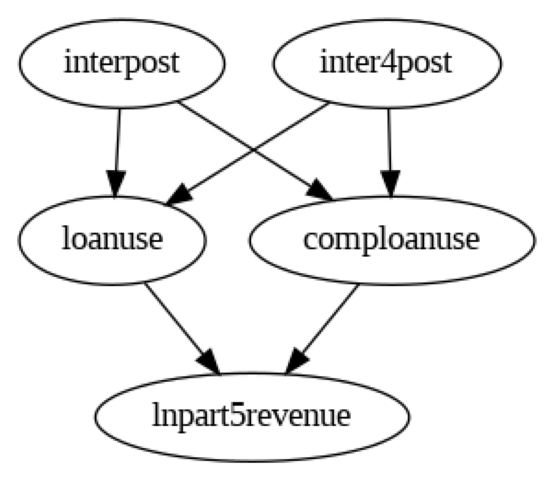

In [ ]:
from dowhy import CausalModel
import pandas as pd

# Use the dataset 'df_fe' which contains the variables you need
data = df_fe[['lnpart5revenue', 'loanuse', 'comploanuse', 'interpost', 'inter4post', 'treatratio_comp', 'type', 'post']]

# Step 1: Model the causal graph
# Create a CausalModel instance with the relevant variables
model = CausalModel(
    data=data,
    treatment=['loanuse', 'comploanuse'],
    outcome='lnpart5revenue',
    instruments=['interpost', 'inter4post']
)

# View the model structure (you may need to have graphviz installed to display the graph)
model.view_model()


In [ ]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
           d                              
───────────────────────(E[lnpart5revenue])
d[loanuse  comploanuse]                   
Estimand assumption 1, Unconfoundedness: If U→{loanuse,comploanuse} and U→lnpart5revenue then P(lnpart5revenue|loanuse,comploanuse,,U) = P(lnpart5revenue|loanuse,comploanuse,)

### Estimand : 2
Estimand name: iv
Estimand expression:
 ⎡                                                                                           -1⎤
 ⎢           d                             ⎛           ∂                                    ⎞  ⎥
E⎢────────────────────────(lnpart5revenue)⋅⎜────────────────────────([loanuse  comploanuse])⎟  ⎥
 ⎣d[inter4post  interpost]                 ⎝∂[inter4post  interpost]                        ⎠  ⎦
Estimand assumption 1, As-if-random: If U→→lnpart5revenue then ¬(U →→{inter4post,interpost})
Estimand assumption 2, Exclusion: If we remove {

In [ ]:
# Check for missing data in key variables
missing_data = df_fe[['loanuse', 'comploanuse', 'interpost', 'inter4post', 'lnpart5revenue', 'post', 'treatratio_comp', 'type']].isnull().sum()
print(missing_data)
# Drop rows with missing values in key variables
df_fe_clean = df_fe[['loanuse', 'comploanuse', 'interpost', 'inter4post', 'lnpart5revenue', 'post', 'treatratio_comp', 'type']].dropna()
df_fe_clean.head()

loanuse              0
comploanuse          0
interpost            0
inter4post           0
lnpart5revenue     907
post                 0
treatratio_comp      0
type                 0
dtype: int64


loanuse  comploanuse  interpost  inter4post  lnpart5revenue  post  \
0        0     0.000000        0.0    0.000000        6.111467   0.0   
1        0     0.200000        1.0    0.771429        6.427952   1.0   
2        0     0.285714        1.0    0.771429        4.010129   1.0   
3        0     0.000000        0.0    0.000000        4.382027   0.0   
4        0     0.200000        1.0    0.800000        4.342662   1.0   

   treatratio_comp  type  
0         0.771429   1.0  
1         0.771429   1.0  
2         0.771429   1.0  
3         0.800000   1.0  
4         0.800000   1.0

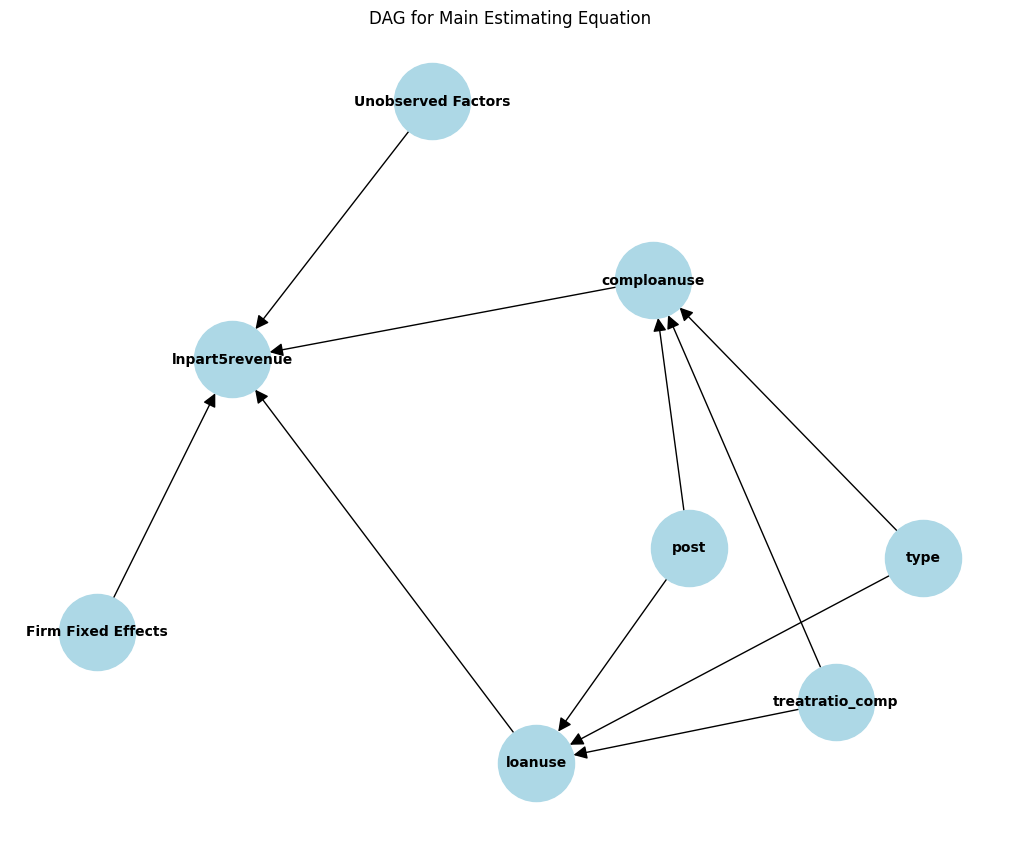

In [ ]:
import networkx as nx
from dowhy import CausalModel
import matplotlib.pyplot as plt

# Step 1: Create a DAG using networkx
G = nx.DiGraph()

# Add nodes (variables in the model)
nodes = [
    "post", "treatratio_comp", "type", "loanuse", "comploanuse",
    "lnpart5revenue", "Firm Fixed Effects", "Unobserved Factors"
]
G.add_nodes_from(nodes)

# Add directed edges (causal relationships)
edges = [
    ("post", "loanuse"),
    ("post", "comploanuse"),
    ("treatratio_comp", "loanuse"),
    ("treatratio_comp", "comploanuse"),
    ("type", "loanuse"),
    ("type", "comploanuse"),
    ("loanuse", "lnpart5revenue"),
    ("comploanuse", "lnpart5revenue"),
    ("Unobserved Factors", "lnpart5revenue"),  # Dotted line (Unobserved)
    ("Firm Fixed Effects", "lnpart5revenue")
]
G.add_edges_from(edges)

# Visualize the DAG (optional)
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=3000, font_size=10, font_weight='bold', arrowsize=20)
plt.title("DAG for Main Estimating Equation")
plt.show()

In [ ]:
model = CausalModel(
    data=df_fe_clean,
    treatment=['loanuse', 'comploanuse'],
    outcome='lnpart5revenue',
    graph=G
)

/usr/local/lib/python3.10/dist-packages/dowhy/causal_model.py:582: UserWarning: 2 variables are assumed unobserved because they are not in the dataset. Configure the logging level to `logging.WARNING` or higher for additional details.
  warnings.warn(


In [ ]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)


Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
           d                              
───────────────────────(E[lnpart5revenue])
d[loanuse  comploanuse]                   
Estimand assumption 1, Unconfoundedness: If U→{loanuse,comploanuse} and U→lnpart5revenue then P(lnpart5revenue|loanuse,comploanuse,,U) = P(lnpart5revenue|loanuse,comploanuse,)

### Estimand : 2
Estimand name: iv
Estimand expression:
 ⎡                                                                                                 ↪
 ⎢              d                                ⎛              ∂                                  ↪
E⎢──────────────────────────────(lnpart5revenue)⋅⎜──────────────────────────────([loanuse  comploa ↪
 ⎣d[post  treatratio_comp  type]                 ⎝∂[post  treatratio_comp  type]                   ↪

↪        -1⎤
↪       ⎞  ⎥
↪ nuse])⎟  ⎥
↪       ⎠  ⎦
Estimand assumption 1, As-if-random: If U→→lnpart5revenue then ¬(U →→{po

In [ ]:
estimate = model.estimate_effect(
    identified_estimand=identified_estimand,
    method_name="iv.instrumental_variable"
)
print(estimate)

# Step 5: Refutation test (optional)
refutation = model.refute_estimate(
    identified_estimand, estimate, method_name="random_common_cause"
)
print(refutation)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: iv
Estimand expression:
 ⎡                                                                                                 ↪
 ⎢              d                                ⎛              ∂                                  ↪
E⎢──────────────────────────────(lnpart5revenue)⋅⎜──────────────────────────────([loanuse  comploa ↪
 ⎣d[post  treatratio_comp  type]                 ⎝∂[post  treatratio_comp  type]                   ↪

↪        -1⎤
↪       ⎞  ⎥
↪ nuse])⎟  ⎥
↪       ⎠  ⎦
Estimand assumption 1, As-if-random: If U→→lnpart5revenue then ¬(U →→{post,treatratio_comp,type})
Estimand assumption 2, Exclusion: If we remove {post,treatratio_comp,type}→{loanuse,comploanuse}, then ¬({post,treatratio_comp,type}→lnpart5revenue)

## Realized estimand
Realized estimand: Wald Estimator
Realized estimand type: EstimandType.NONPARAMETRIC_ATE
Estimand expression:
   ⎡         

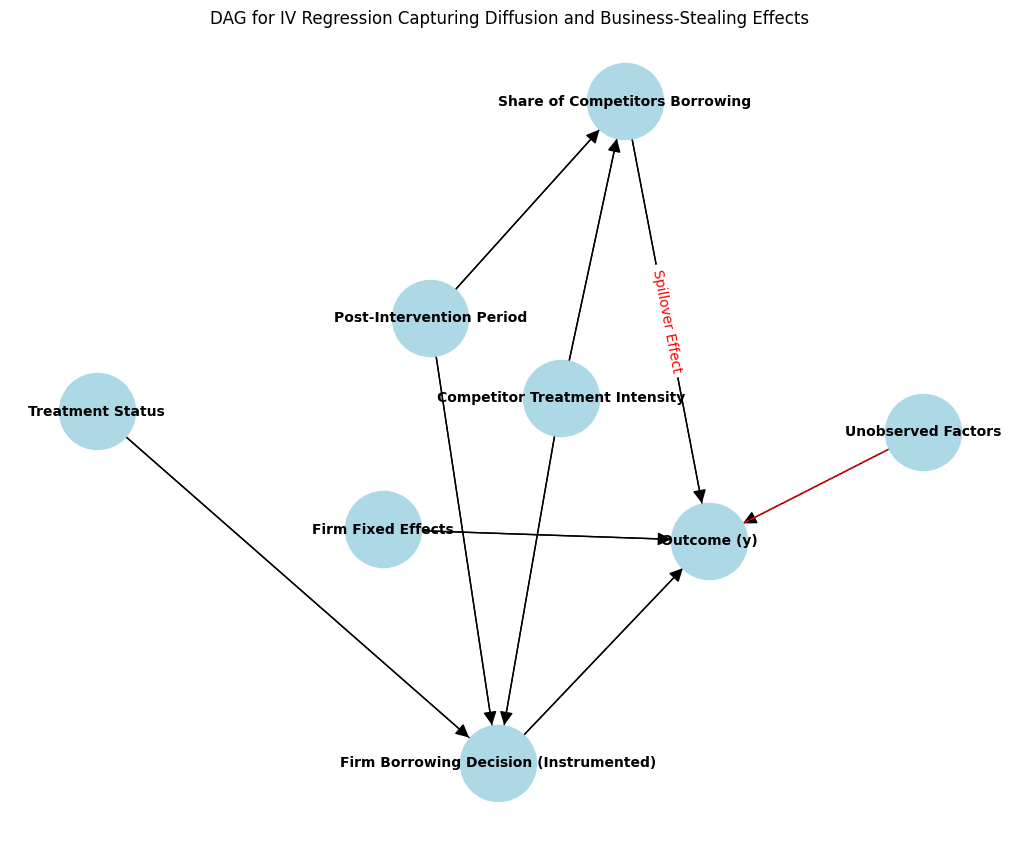

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Function to create a DAG for a given set of nodes and edges, allowing for dashed arrows
def create_dag(nodes, edges, title, filename):
    G = nx.DiGraph()
    G.add_nodes_from(nodes)

    # Add edges to the graph
    for edge in edges:
        u, v, label, is_dashed = edge
        if label:
            G.add_edge(u, v, label=label, style='dashed' if is_dashed else 'solid')
        else:
            G.add_edge(u, v, style='dashed' if is_dashed else 'solid')

    # Draw the graph
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=3000, font_size=10, font_weight='bold', arrowsize=20)

    # Draw dashed edges separately
    dashed_edges = [(u, v) for u, v, d in G.edges(data=True) if d['style'] == 'dashed']
    nx.draw_networkx_edges(G, pos, edgelist=dashed_edges, style='dashed', edge_color='red')

    # Draw solid edges separately
    solid_edges = [(u, v) for u, v, d in G.edges(data=True) if d['style'] == 'solid']
    nx.draw_networkx_edges(G, pos, edgelist=solid_edges, style='solid', edge_color='black')

    # Draw edge labels if they exist
    edge_labels = {(u, v): G[u][v].get('label', '') for u, v in G.edges if G[u][v].get('label', '')}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

    plt.title(title)

    # Save the plot as a PNG file
    plt.savefig(f"{filename}.png", format='png')
    plt.show()

# Updated DAG for IV Model Capturing Both Diffusion and Business-Stealing Effects
nodes_eq9 = ['Firm Borrowing Decision (Instrumented)', 'Share of Competitors Borrowing', 'Competitor Treatment Intensity',
             'Post-Intervention Period', 'Firm Fixed Effects', 'Outcome (y)', 'Unobserved Factors', 'Treatment Status']
edges_eq9 = [
    ('Competitor Treatment Intensity', 'Firm Borrowing Decision (Instrumented)', None, False),
    ('Post-Intervention Period', 'Firm Borrowing Decision (Instrumented)', None, False),
    ('Treatment Status', 'Firm Borrowing Decision (Instrumented)', None, False),
    ('Firm Borrowing Decision (Instrumented)', 'Outcome (y)', None, False),  # Business-stealing effect
    ('Share of Competitors Borrowing', 'Outcome (y)', 'Spillover Effect', False),  # Diffusion effect
    ('Competitor Treatment Intensity', 'Share of Competitors Borrowing', None, False),  # Instrument affects Share Competitors Borrowing
    ('Post-Intervention Period', 'Share of Competitors Borrowing', None, False),  # Instrument affects Share Competitors Borrowing
    ('Firm Fixed Effects', 'Outcome (y)', None, False),  # Firm fixed effect controls
    ('Unobserved Factors', 'Outcome (y)', None, True)  # Dashed arrow for unobserved factors
]
create_dag(nodes_eq9, edges_eq9, 'DAG for IV Regression Capturing Diffusion and Business-Stealing Effects', 'dag_iv_diffusion_business_stealing')


## Ridge (again?)

In [ ]:
df_fe_clean2 = df_fe_clean.copy()
df_fe_clean2.head()

loanuse  comploanuse  interpost  inter4post  lnpart5revenue  post  \
0        0     0.000000        0.0    0.000000        6.111467   0.0   
1        0     0.200000        1.0    0.771429        6.427952   1.0   
2        0     0.285714        1.0    0.771429        4.010129   1.0   
3        0     0.000000        0.0    0.000000        4.382027   0.0   
4        0     0.200000        1.0    0.800000        4.342662   1.0   

   treatratio_comp  type  
0         0.771429   1.0  
1         0.771429   1.0  
2         0.771429   1.0  
3         0.800000   1.0  
4         0.800000   1.0

In [ ]:
design = MS(df_fe_clean2.columns.drop('lnpart5revenue')).fit(df_fe_clean2)
Y = np.array(df_fe_clean2['lnpart5revenue'])

In [ ]:
D = design.fit_transform(df_fe_clean2)
D = D.drop('intercept', axis=1)
X = np.asarray(D)

In [ ]:
Xs = X - X.mean(0)[None,:]
X_scale = X.std(0)
Xs = Xs / X_scale[None,:]

lambdas = 10**np.linspace(8, -2, 100) / Y.std()
soln_array = skl.ElasticNet.path(Xs,
                                 Y,
                                 l1_ratio=0.,
                                 alphas=lambdas)[1]
soln_array.shape
#alpha means lamba in package


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 133430.35686754237, tolerance: 26.686071373527597
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: UserWarning: Coordinate descent 

(7, 100)

In [ ]:
soln_path = pd.DataFrame(soln_array.T,
                         columns=D.columns,
                         index=-np.log(lambdas))
soln_path.index.name = 'negative log(lambda)'
soln_path



loanuse   comploanuse     interpost    inter4post  \
negative log(lambda)                                                           
-18.541618            1.489451e-10  6.812540e-12  2.745493e-10  1.361573e-10   
-18.309033            1.879474e-10  8.596449e-12  3.464419e-10  1.718110e-10   
-18.076449            2.371627e-10  1.084749e-11  4.371601e-10  2.168008e-10   
-17.843865            2.992654e-10  1.368797e-11  5.516335e-10  2.735716e-10   
-17.611280            3.776301e-10  1.727225e-11  6.960825e-10  3.452082e-10   
...                            ...           ...           ...           ...   
 3.553896             6.297905e-03 -2.985038e-02  4.074925e-02 -7.427157e-03   
 3.786480             6.276951e-03 -3.024629e-02  4.206902e-02 -8.405818e-03   
 4.019065             6.255171e-03 -3.055705e-02  4.324910e-02 -9.321881e-03   
 4.251649             6.233880e-03 -3.079950e-02  4.428735e-02 -1.015769e-02   
 4.484233             6.213973e-03 -3.098793e-02  4.518696e-02 -1.090304e-02   

                              post  treatratio_comp          type  
negative log(lambda)                                               
-18.541618            2.547240e-10    -1.909435e-11  1.238516e-10  
-18.309033            3.214252e-10    -2.409434e-11  1.562830e-10  
-18.076449            4.055926e-10    -3.040360e-11  1.972067e-10  
-17.843865            5.117998e-10    -3.836500e-11  2.488466e-10  
-17.611280            6.458181e-10    -4.841114e-11  3.140089e-10  
...                            ...              ...           ...  
 3.553896             2.432697e-02    -5.411343e-03  1.535383e-03  
 3.786480             2.457271e-02    -4.714568e-03  7.550318e-04  
 4.019065             2.478474e-02    -4.056856e-03  2.950921e-05  
 4.251649             2.496635e-02    -3.453571e-03 -6.281640e-04  
 4.484233             2.512057e-02    -2.913739e-03 -1.211250e-03  

[100 rows x 7 columns]

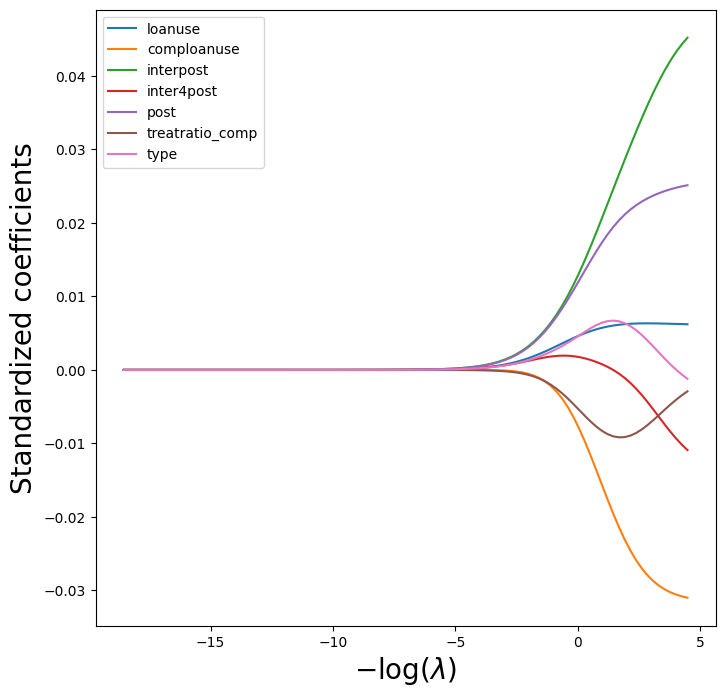

In [ ]:
path_fig, ax = subplots(figsize=(8,8))
soln_path.plot(ax=ax, legend=False)
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Standardized coefficients', fontsize=20)
ax.legend(loc='upper left');

In [ ]:
path_fig.savefig('ridge_plotIV.png', bbox_inches='tight')

In [ ]:
beta_hat = soln_path.loc[soln_path.index[39]]
lambdas[39], beta_hat

(12975.624348635654,
 loanuse            1.295131e-06
 comploanuse        5.891369e-08
 interpost          2.387444e-06
 inter4post         1.183812e-06
 post               2.215116e-06
 treatratio_comp   -1.663022e-07
 type               1.076915e-06
 Name: -9.470827826231739, dtype: float64)

In [ ]:
np.linalg.norm(beta_hat)

3.856977506653789e-06

In [ ]:
beta_hat = soln_path.loc[soln_path.index[59]]
lambdas[59], np.linalg.norm(beta_hat)

(123.85862196213888, 0.0003958411400431686)

In [ ]:
ridge = skl.ElasticNet(alpha=lambdas[59], l1_ratio=0)
scaler = StandardScaler(with_mean=True,  with_std=True)
pipe = Pipeline(steps=[('scaler', scaler), ('ridge', ridge)])
pipe.fit(X, Y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.381e+03, tolerance: 6.762e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge', ElasticNet(alpha=123.85862196213888, l1_ratio=0))])

In [ ]:
np.linalg.norm(ridge.coef_)

0.00039584114004317266

In [ ]:
validation = skm.ShuffleSplit(n_splits=1,
                              test_size=0.5,
                              random_state=0)
ridge.alpha = 0.01
results = skm.cross_validate(ridge,
                             X,
                             Y,
                             scoring='neg_mean_squared_error',
                             cv=validation)
-results['test_score']


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.654e+03, tolerance: 3.319e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


array([0.79947557])

In [ ]:
ridge.alpha = 1e10
results = skm.cross_validate(ridge,
                             X,
                             Y,
                             scoring='neg_mean_squared_error',
                             cv=validation)
-results['test_score']


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.660e+03, tolerance: 3.319e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


array([0.79941])

In [ ]:
param_grid = {'ridge__alpha': lambdas}
grid = skm.GridSearchCV(pipe,
                        param_grid,
                        cv=validation,
                        scoring='neg_mean_squared_error')
grid.fit(X, Y)
grid.best_params_['ridge__alpha']
grid.best_estimator_


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.660e+03, tolerance: 3.319e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.660e+03, tolerance: 3.319e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge', ElasticNet(alpha=0.36955043560263323, l1_ratio=0))])

In [ ]:
K = 5
kfold = skm.KFold(K,
                  random_state=0,
                  shuffle=True)

In [ ]:
grid = skm.GridSearchCV(pipe,
                        param_grid,
                        cv=kfold,
                        scoring='neg_mean_squared_error')
grid.fit(X, Y)
grid.best_params_['ridge__alpha']
grid.best_estimator_


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.705e+03, tolerance: 5.409e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.707e+03, tolerance: 5.413e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge', ElasticNet(alpha=0.2928624002943267, l1_ratio=0))])

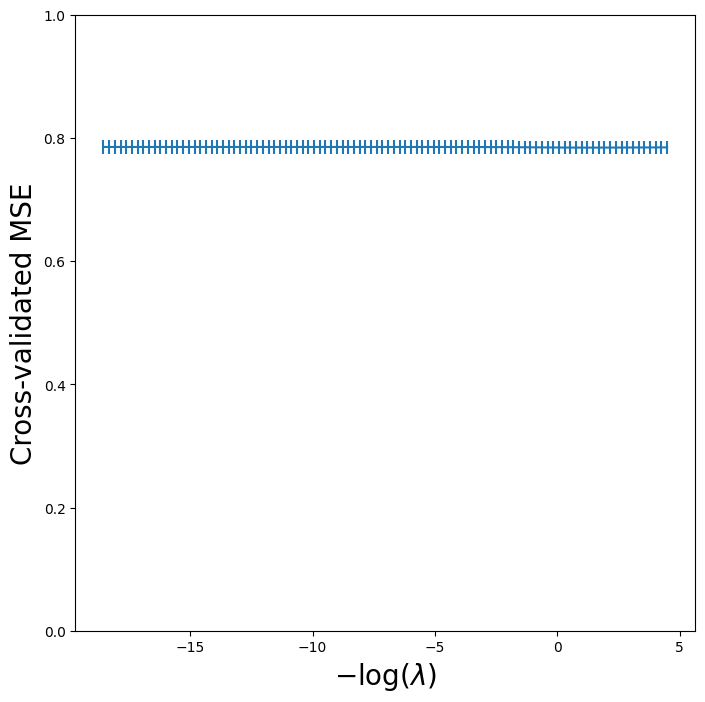

In [ ]:
ridge_fig, ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(lambdas),
            -grid.cv_results_['mean_test_score'],
            yerr=grid.cv_results_['std_test_score'] / np.sqrt(K))
ax.set_ylim([0,1])
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated MSE', fontsize=20);


In [ ]:
grid_r2 = skm.GridSearchCV(pipe,
                           param_grid,
                           cv=kfold)
grid_r2.fit(X, Y)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.705e+03, tolerance: 5.409e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.707e+03, tolerance: 5.413e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('ridge',
                                        ElasticNet(alpha=10000000000.0,
                                                   l1_ratio=0))]),
             param_grid={'ridge__alpha': array([1.12855363e+08, 8.94359454e+07, 7.08764573e+07, 5.61683803e+07,
       4.45124808e+07, 3.52753798e+07, 2.79551352e+07, 2.21539666e+07,
       1.75566396e+07, 1.39133367...
       2.37549722e+00, 1.88254092e+00, 1.49188149e+00, 1.18229056e+00,
       9.36945053e-01, 7.42512931e-01, 5.88428800e-01, 4.66319761e-01,
       3.69550436e-01, 2.92862400e-01, 2.32088444e-01, 1.83926123e-01,
       1.45758307e-01, 1.15510965e-01, 9.15404646e-02, 7.25442527e-02,
       5.74900797e-02, 4.55599050e-02, 3.61054455e-02, 2.86129481e-02,
       2.26752721e-02, 1.79697653e-02, 1.42407317e-02, 1.12855363e-02])})

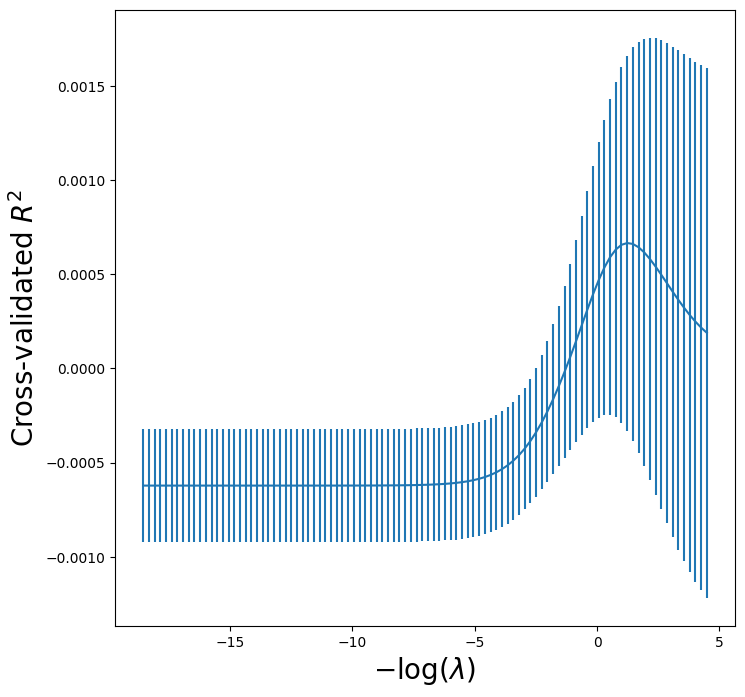

In [ ]:
r2_fig, ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(lambdas),
            grid_r2.cv_results_['mean_test_score'],
            yerr=grid_r2.cv_results_['std_test_score'] / np.sqrt(K))
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated $R^2$', fontsize=20);


In [ ]:
ridgeCV = skl.ElasticNetCV(alphas=lambdas,
                           l1_ratio=0,
                           cv=kfold)
pipeCV = Pipeline(steps=[('scaler', scaler),
                         ('ridge', ridgeCV)])
pipeCV.fit(X, Y)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2704.517829756761, tolerance: 0.5409035659764707
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did

Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge',
                 ElasticNetCV(alphas=array([1.12855363e+08, 8.94359454e+07, 7.08764573e+07, 5.61683803e+07,
       4.45124808e+07, 3.52753798e+07, 2.79551352e+07, 2.21539666e+07,
       1.75566396e+07, 1.39133367e+07, 1.10260814e+07, 8.73798092e+06,
       6.92470045e+06, 5.48770668e+06, 4.34891370e+06, 3.44643973e+06,
       2.73124455e+06, 2.16446459e+06,...
       9.36945053e-01, 7.42512931e-01, 5.88428800e-01, 4.66319761e-01,
       3.69550436e-01, 2.92862400e-01, 2.32088444e-01, 1.83926123e-01,
       1.45758307e-01, 1.15510965e-01, 9.15404646e-02, 7.25442527e-02,
       5.74900797e-02, 4.55599050e-02, 3.61054455e-02, 2.86129481e-02,
       2.26752721e-02, 1.79697653e-02, 1.42407317e-02, 1.12855363e-02]),
                              cv=KFold(n_splits=5, random_state=0, shuffle=True),
                              l1_ratio=0))])

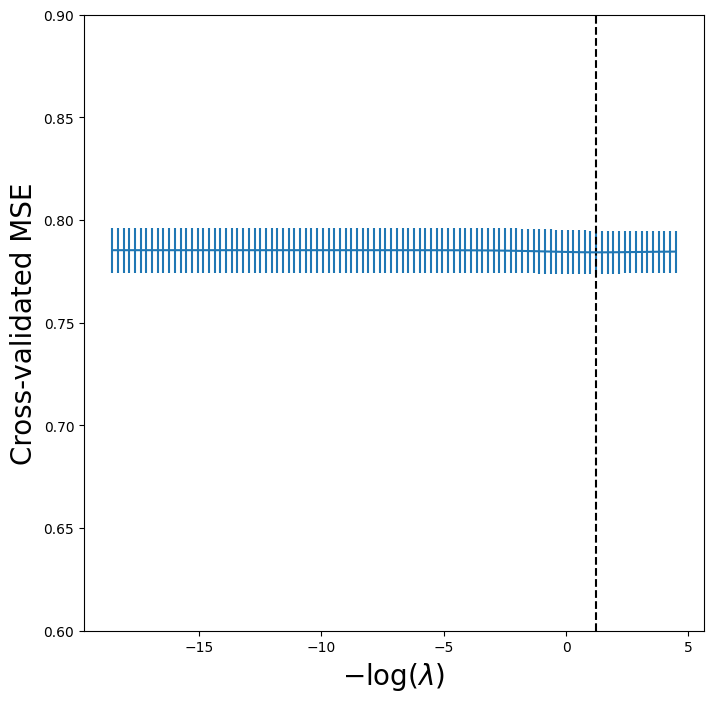

In [ ]:
tuned_ridge = pipeCV.named_steps['ridge']
ridgeCV_fig, ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(lambdas),
            tuned_ridge.mse_path_.mean(1),
            yerr=tuned_ridge.mse_path_.std(1) / np.sqrt(K))
ax.axvline(-np.log(tuned_ridge.alpha_), c='k', ls='--')
ax.set_ylim([0.6,0.9])
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated MSE', fontsize=20);


In [ ]:
ridgeCV_fig.savefig('RidgeCV_plot.png', bbox_inches='tight')

In [ ]:
np.min(tuned_ridge.mse_path_.mean(1))


In [ ]:
tuned_ridge.coef_


array([ 0.00590481, -0.01769435,  0.02267528,  0.00040344,  0.01847179,
       -0.00875001,  0.00663988])

##Lasso again

In [ ]:
lassoCV = skl.ElasticNetCV(n_alphas=100,
                           l1_ratio=1,
                           cv=kfold)
pipeCV = Pipeline(steps=[('scaler', scaler),
                         ('lasso', lassoCV)])
pipeCV.fit(X, Y)
tuned_lasso = pipeCV.named_steps['lasso']
tuned_lasso.alpha_


0.0035624487093022564

In [ ]:
lambdas, soln_array = skl.Lasso.path(Xs,
                                    Y,
                                    l1_ratio=1,
                                    n_alphas=100)[:2]
soln_path = pd.DataFrame(soln_array.T,
                         columns=D.columns,
                         index=-np.log(lambdas))


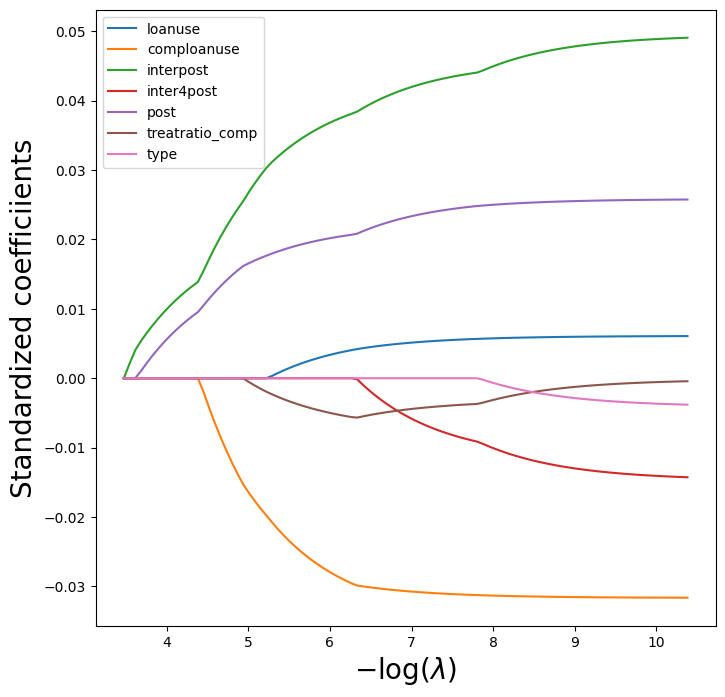

In [ ]:
path_fig, ax = subplots(figsize=(8,8))
soln_path.plot(ax=ax, legend=False)
ax.legend(loc='upper left')
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Standardized coefficiients', fontsize=20);


In [ ]:
path_fig.savefig('lassoCV_IVplot.png', bbox_inches='tight')

In [ ]:
np.min(tuned_lasso.mse_path_.mean(1))


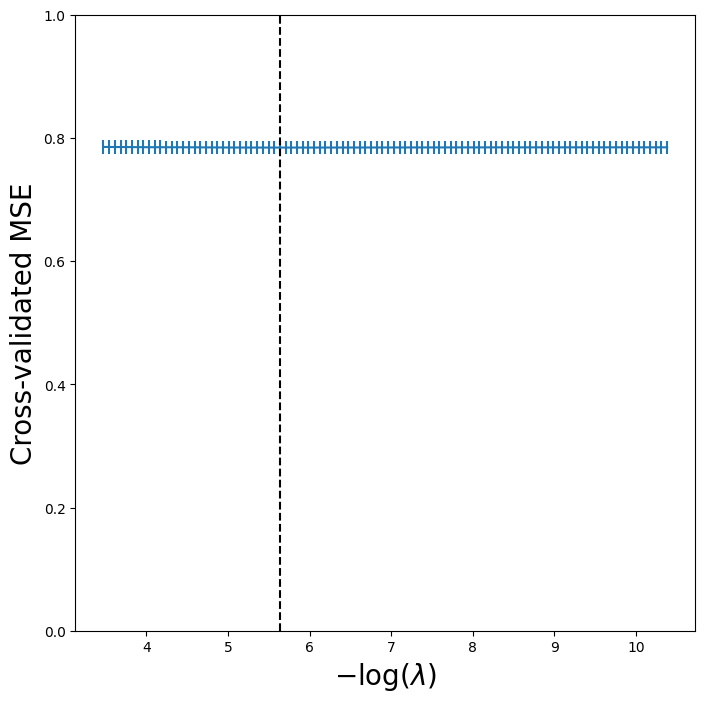

In [ ]:
lassoCV_fig, ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(tuned_lasso.alphas_),
            tuned_lasso.mse_path_.mean(1),
            yerr=tuned_lasso.mse_path_.std(1) / np.sqrt(K))
ax.axvline(-np.log(tuned_lasso.alpha_), c='k', ls='--')
ax.set_ylim([0,1])
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated MSE', fontsize=20);

In [ ]:
lassoCV_fig.savefig('lassoCVIV_plot.png', bbox_inches='tight')

In [ ]:
tuned_lasso.coef_


## Regression Trees

In [ ]:
model = MS(df_fe_clean2.columns.drop('lnpart5revenue'), intercept=False)
D = model.fit_transform(df_fe_clean2)
feature_names = list(D.columns)
X = np.asarray(D) #array of all X's, keep all feature names


In [ ]:
(X_train,
 X_test,
 y_train,
 y_test) = skm.train_test_split(X,
                                df_fe_clean2['lnpart5revenue'],
                                test_size=0.3,
                                random_state=0)


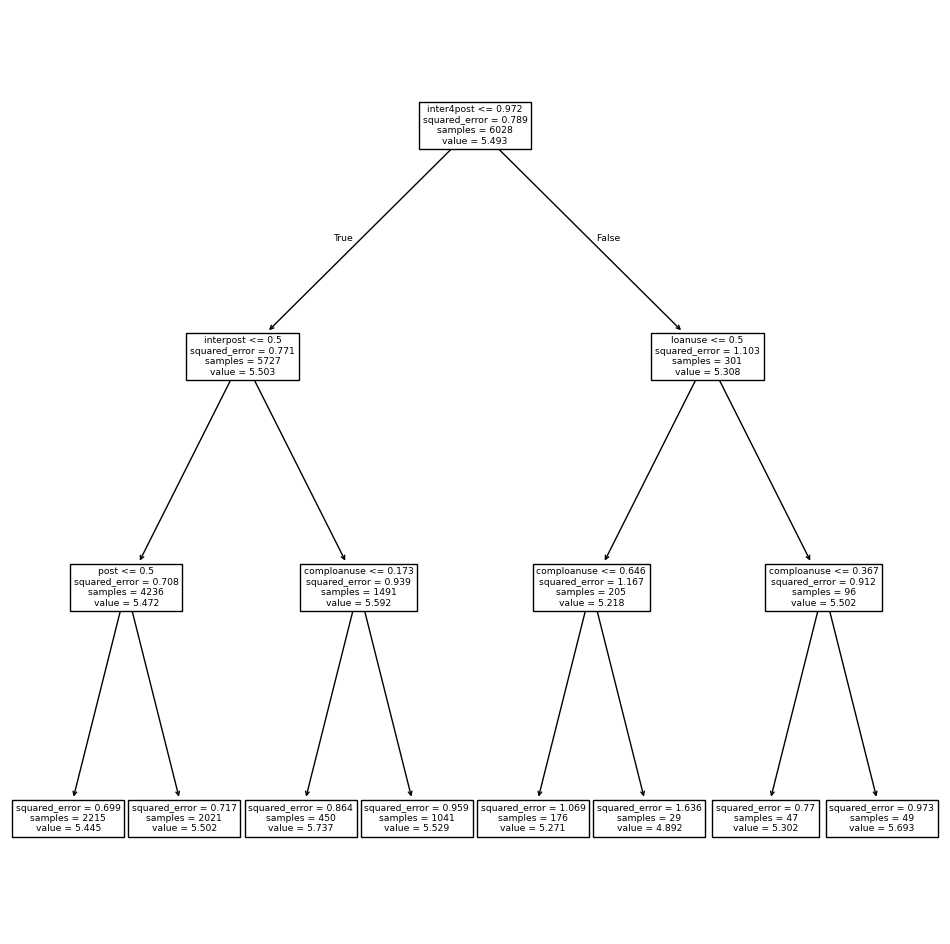

In [ ]:
reg = DTR(max_depth=3)
reg.fit(X_train, y_train)
ax = subplots(figsize=(12,12))[1]
plot_tree(reg,
          feature_names=feature_names,
          ax=ax);
#inter4post is share of competitors treated
#post is indicator for post treatment period
#comploanuse is the share of competitiors who are loaning
#loanuse is the treated firm's borrowing decision, which we use in second stage 2sls

Cross Validation & Pruning

In [ ]:
ccp_path = reg.cost_complexity_pruning_path(X_train, y_train)
kfold = skm.KFold(5,
                  shuffle=True,
                  random_state=10)
grid = skm.GridSearchCV(reg,
                        {'ccp_alpha': ccp_path.ccp_alphas},
                        refit=True,
                        cv=kfold,
                        scoring='neg_mean_squared_error')
G = grid.fit(X_train, y_train)


In [ ]:
best_ = grid.best_estimator_
RTreeMSE= np.mean((y_test - best_.predict(X_test))**2)
RTreeMSE


0.7802888448753289

In [ ]:
(np.mean((y_test - best_.predict(X_test))**2))**0.5

0.8833395977059609

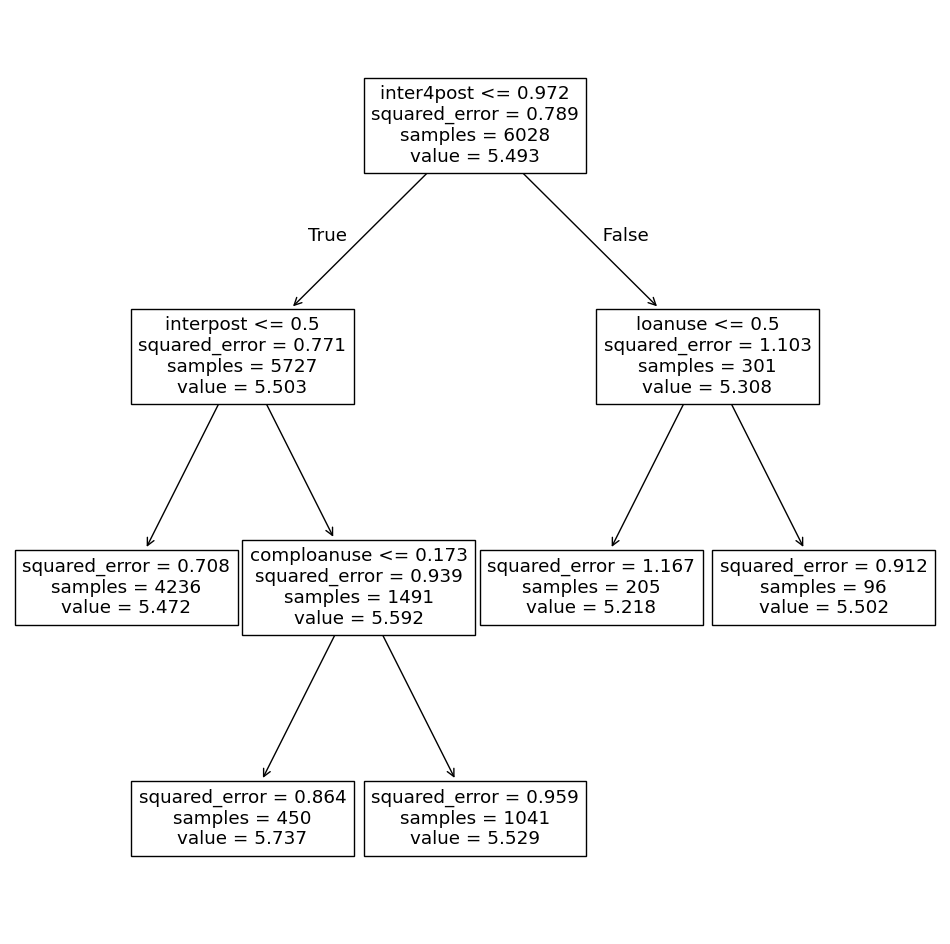

In [ ]:
ax = subplots(figsize=(12,12))[1]
plot_tree(G.best_estimator_,
          feature_names=feature_names,
          ax=ax);


In [ ]:
fig = ax.get_figure()
fig.savefig('tree_plotIV.png', format='png', dpi=300)

##Bagging + RF's

In [ ]:
bag_chIV = RF(max_features=X_train.shape[1], random_state=0)
bag_chIV.fit(X_train, y_train)
#using all features and X's; RF uses subset

RandomForestRegressor(max_features=7, random_state=0)

0.7825181970341009

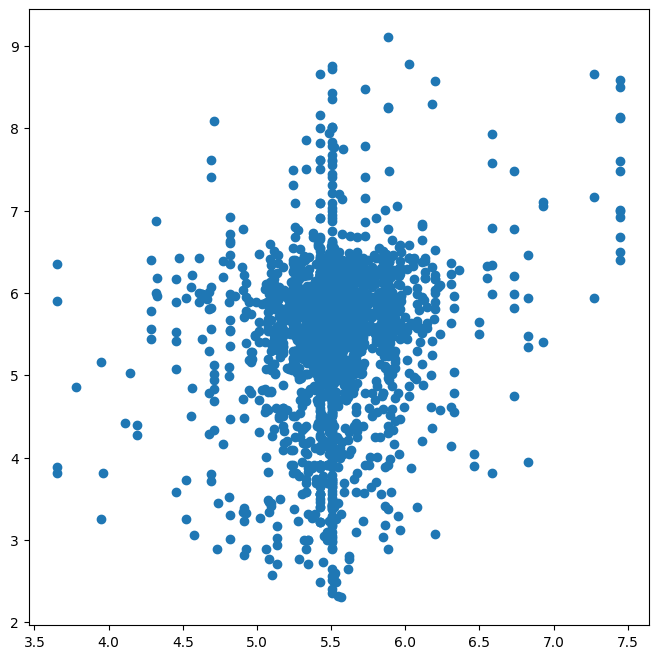

In [ ]:
ax = subplots(figsize=(8,8))[1]
y_hat_bag = bag_chIV.predict(X_test)
ax.scatter(y_hat_bag, y_test)
np.mean((y_test - y_hat_bag)**2)


In [ ]:
fig = ax.get_figure()
fig.savefig('baggingIV.png', format='png', dpi=300)

In [ ]:
bag_chIV = RF(max_features=X_train.shape[1],
                n_estimators=500, #default is 100
                random_state=0).fit(X_train, y_train)
y_hat_bag = bag_chIV.predict(X_test)
np.mean((y_test - y_hat_bag)**2)

0.782011157031227

In [ ]:
RF_IVch = RF(max_features=6, #random forest as only choose 6 - subset
               random_state=0).fit(X_train, y_train)
y_hat_RFIV = RF_IVch.predict(X_test)
np.mean((y_test - y_hat_RFIV)**2)


0.7820924534648436

In [ ]:
feature_imp = pd.DataFrame(
    {'importance':RF_IVch.feature_importances_}, #include in rep
    index=feature_names)
feature_imp.sort_values(by='importance', ascending=False)

importance
treatratio_comp    0.345891
comploanuse        0.343329
inter4post         0.174980
loanuse            0.078379
interpost          0.025766
type               0.024648
post               0.007007

In [ ]:
feature_imp.sort_values(by='importance', ascending=False).to_latex(caption='Feature Importances of IV Random Forest', label='tab:feature_importances', float_format="%.6f")


'\\begin{table}\n\\caption{Feature Importances of IV Random Forest}\n\\label{tab:feature_importances}\n\\begin{tabular}{lr}\n\\toprule\n & importance \\\\\n\\midrule\ntreatratio_comp & 0.345891 \\\\\ncomploanuse & 0.343329 \\\\\ninter4post & 0.174980 \\\\\nloanuse & 0.078379 \\\\\ninterpost & 0.025766 \\\\\ntype & 0.024648 \\\\\npost & 0.007007 \\\\\n\\bottomrule\n\\end{tabular}\n\\end{table}\n'